In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams[u'font.sans-serif'] = ['simhei']
matplotlib.rcParams['axes.unicode_minus'] = False
#导入数据，因为SK_ID_CURR没有含义，先删除
data = pd.read_csv('../Data/app_merged_train.csv')
data = data.drop(columns=['SK_ID_CURR'])
data.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,bureau_merged_bureau_balance_STATUS_2_mean,bureau_merged_bureau_balance_STATUS_2_std,bureau_merged_bureau_balance_MONTHS_BALANCE_min_min,bureau_merged_bureau_balance_MONTHS_BALANCE_min_max,bureau_merged_bureau_balance_MONTHS_BALANCE_min_mean,bureau_merged_bureau_balance_MONTHS_BALANCE_min_std,bureau_merged_bureau_balance_MONTHS_BALANCE_max_min,bureau_merged_bureau_balance_MONTHS_BALANCE_max_max,bureau_merged_bureau_balance_MONTHS_BALANCE_max_mean,bureau_merged_bureau_balance_MONTHS_BALANCE_max_std
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-47.0,-3.0,-28.25,14.159802,-32.0,0.0,-15.5,10.783585
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
list(data.columns)

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT

In [3]:
#查看目标变量为空的行数
data['TARGET'].isnull().sum()
#data = data.dropna(axis=0, thresh=None, subset=["loan_status"])

0

In [4]:
data.shape

(307511, 943)

In [5]:
data = data.loc[:,~data.columns.duplicated()]
data.shape

(307511, 943)

In [6]:
instance_number = data.shape[0]
deleted_feature = []
data_columns = data.columns
#清洗缺省值高于50%的特征
i = 0
for col in data_columns:
    i += 1
    print(i)
    if data[col].isnull().sum()/instance_number > 0.50:
        deleted_feature.append(col)
        
print(deleted_feature)
data = data.drop(columns = deleted_feature)
data.head()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,bureau_merged_AMT_CREDIT_SUM_DEBT_mean,bureau_merged_AMT_CREDIT_SUM_DEBT_std,bureau_merged_AMT_CREDIT_SUM_LIMIT_min,bureau_merged_AMT_CREDIT_SUM_LIMIT_max,bureau_merged_AMT_CREDIT_SUM_LIMIT_mean,bureau_merged_AMT_CREDIT_SUM_LIMIT_std,bureau_merged_AMT_CREDIT_SUM_OVERDUE_min,bureau_merged_AMT_CREDIT_SUM_OVERDUE_max,bureau_merged_AMT_CREDIT_SUM_OVERDUE_mean,bureau_merged_AMT_CREDIT_SUM_OVERDUE_std
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,49156.2,109916.604716,0.0,31988.565,7997.14125,15994.2825,0.0,0.0,0.0,0.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,810000.000,202500.00000,405000.0000,0.0,0.0,0.0,0.0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000,0.00000,0.0000,0.0,0.0,0.0,0.0
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.000,0.00000,NaN,0.0,0.0,0.0,NaN


In [7]:
deleted_feature

['APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'OWN_CAR_AGE',
 'WALLSMATERIAL_MODE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'pre_app_merged_RATE_INTEREST_PRIMARY_min',
 'pre_app_merged_RATE_INTEREST_PRIMARY_max',
 'pre_app_merged_RATE_INTEREST_PRIMARY_mean',
 'pre_app_

In [8]:
data.shape

(307511, 533)

In [9]:
#分离X和Y
X = data.drop(columns=['TARGET'])
Y = data['TARGET']

In [10]:
float_feature = []
int_feature = []
object_feature = []

for col in X.columns:
    if X[col].ftype == 'float64:dense':
        float_feature.append(col)
    elif X[col].ftype == 'int64:dense':
        int_feature.append(col)
    else:
        object_feature.append(col)
    
print(float_feature)
print(len(float_feature))
print()
print(int_feature)
print(len(int_feature))
print()
print(object_feature)
print(len(object_feature))

['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'REGION_POPULATION_RELATIVE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'pre_app_merged_count', 'pre_app_merged_NAME_CONTRACT_TYPE_Consumer loans', 'pre_app_merged_NAME_CONTRACT_TYPE_Cash loans', 'pre_app_merged_NAME_CONTRACT_TYPE_Revolving loans', 'pre_app_merged_NAME_CONTRACT_TYPE_XNA', 'pre_app_merged_WEEKDAY_APPR_PROCESS_START_THURSDAY', 'pre_app_merged_WEEKDAY_APPR_PROCESS_START_SUNDAY', 'pre_app_merged_WEEKDAY_

In [11]:
con_feature = float_feature
tmp = ['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START']

con_feature.extend(tmp)

dis_feature = object_feature
dis_feature.extend(list(set(int_feature).difference(set(tmp))))

In [12]:
con_data = X[con_feature]
dis_data = X[dis_feature]

In [13]:
dis_feature

['CODE_GENDER',
 'EMERGENCYSTATE_MODE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_9',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_CONT_MOBILE',
 'FLAG_EMP_PHONE',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_15',
 'FLAG_MOBIL',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_8',
 'REGION_RATING_CLIENT',
 'FLAG_DOCUMENT_14',
 'FLAG_WORK_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_7',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_20',
 'FLAG_EMAIL',
 'FLAG_DO

In [14]:
print('连续特征：', con_feature)
print('连续特征数目', con_data.shape[1])
print()
print('离散特征：', dis_feature)
print('离散特征数目', dis_data.shape[1])

连续特征： ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'REGION_POPULATION_RELATIVE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'pre_app_merged_count', 'pre_app_merged_NAME_CONTRACT_TYPE_Consumer loans', 'pre_app_merged_NAME_CONTRACT_TYPE_Cash loans', 'pre_app_merged_NAME_CONTRACT_TYPE_Revolving loans', 'pre_app_merged_NAME_CONTRACT_TYPE_XNA', 'pre_app_merged_WEEKDAY_APPR_PROCESS_START_THURSDAY', 'pre_app_merged_WEEKDAY_APPR_PROCESS_START_SUNDAY', 'pre_app_merged_WE

In [15]:
del_con_fea = []
for col in con_data.columns:
    if con_data[col].std() == 0:
        del_con_fea.append(col)

del_con_fea

['pre_app_merged_NAME_TYPE_SUITE_nan',
 'pre_app_merged_NAME_GOODS_CATEGORY_House Construction',
 'pre_app_merged_PRODUCT_COMBINATION_nan',
 'pre_app_merged_installments_NUM_INSTALMENT_NUMBER_min_min',
 'pre_app_merged_cash_NAME_CONTRACT_STATUS_XNA_min',
 'pre_app_merged_cash_SK_DPD_min_min',
 'pre_app_merged_cash_SK_DPD_DEF_min_min']

In [16]:
del_dis_fea = []
for col in dis_data.columns:
    if len(dis_data[col].unique()) == 1:
        del_dis_fea.append(col)
        
del_dis_fea

[]

In [17]:
con_data = con_data.drop(columns=del_con_fea)
con_feature = con_data.columns

dis_data = dis_data.drop(columns=del_dis_fea)
dis_feature = dis_data.columns

X = pd.concat([con_data, dis_data], axis=1)

In [18]:
X.shape

(307511, 525)

In [19]:
len_uni_dis = []
for col in dis_data.columns:
    len_uni_dis.append(len(dis_data[col].unique()))

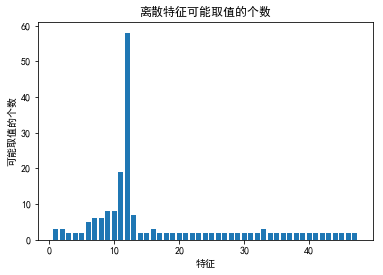

In [20]:
plt.bar(range(1, len(dis_feature)+1), len_uni_dis)
plt.xlabel('特征')
plt.ylabel('可能取值的个数')
plt.title('离散特征可能取值的个数')
plt.show()

In [21]:
list(dis_data.columns)

['CODE_GENDER',
 'EMERGENCYSTATE_MODE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_9',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_CONT_MOBILE',
 'FLAG_EMP_PHONE',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_15',
 'FLAG_MOBIL',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_8',
 'REGION_RATING_CLIENT',
 'FLAG_DOCUMENT_14',
 'FLAG_WORK_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_7',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_20',
 'FLAG_EMAIL',
 'FLAG_DO

In [22]:
instance_number = con_data.shape[0]
for col in con_feature:
    max_ = con_data[col].max()
    min_ = con_data[col].min()
    diff = max_ - min_
    print(col, type(diff))
    if diff != 0:
        tmp = list(con_data[col])
        for j in range(instance_number):
            tmp[j] = (tmp[j]-min_)/diff
        con_data[col] = tmp

AMT_ANNUITY <class 'numpy.float64'>
AMT_CREDIT <class 'numpy.float64'>
AMT_GOODS_PRICE <class 'numpy.float64'>
AMT_INCOME_TOTAL <class 'numpy.float64'>
AMT_REQ_CREDIT_BUREAU_DAY <class 'numpy.float64'>
AMT_REQ_CREDIT_BUREAU_HOUR <class 'numpy.float64'>
AMT_REQ_CREDIT_BUREAU_MON <class 'numpy.float64'>
AMT_REQ_CREDIT_BUREAU_QRT <class 'numpy.float64'>
AMT_REQ_CREDIT_BUREAU_WEEK <class 'numpy.float64'>
AMT_REQ_CREDIT_BUREAU_YEAR <class 'numpy.float64'>
CNT_FAM_MEMBERS <class 'numpy.float64'>
DAYS_LAST_PHONE_CHANGE <class 'numpy.float64'>
DAYS_REGISTRATION <class 'numpy.float64'>
DEF_30_CNT_SOCIAL_CIRCLE <class 'numpy.float64'>
DEF_60_CNT_SOCIAL_CIRCLE <class 'numpy.float64'>
EXT_SOURCE_2 <class 'numpy.float64'>
EXT_SOURCE_3 <class 'numpy.float64'>
FLOORSMAX_AVG <class 'numpy.float64'>
FLOORSMAX_MEDI <class 'numpy.float64'>
FLOORSMAX_MODE <class 'numpy.float64'>
OBS_30_CNT_SOCIAL_CIRCLE <class 'numpy.float64'>
OBS_60_CNT_SOCIAL_CIRCLE <class 'numpy.float64'>
REGION_POPULATION_RELATIVE <cl

pre_app_merged_NAME_PRODUCT_TYPE_XNA <class 'numpy.float64'>
pre_app_merged_NAME_PRODUCT_TYPE_x-sell <class 'numpy.float64'>
pre_app_merged_NAME_PRODUCT_TYPE_walk-in <class 'numpy.float64'>
pre_app_merged_CHANNEL_TYPE_Stone <class 'numpy.float64'>
pre_app_merged_CHANNEL_TYPE_Country-wide <class 'numpy.float64'>
pre_app_merged_CHANNEL_TYPE_Regional / Local <class 'numpy.float64'>
pre_app_merged_CHANNEL_TYPE_AP+ (Cash loan) <class 'numpy.float64'>
pre_app_merged_CHANNEL_TYPE_Credit and cash offices <class 'numpy.float64'>
pre_app_merged_CHANNEL_TYPE_Channel of corporate sales <class 'numpy.float64'>
pre_app_merged_CHANNEL_TYPE_Contact center <class 'numpy.float64'>
pre_app_merged_CHANNEL_TYPE_Car dealer <class 'numpy.float64'>
pre_app_merged_NAME_SELLER_INDUSTRY_Furniture <class 'numpy.float64'>
pre_app_merged_NAME_SELLER_INDUSTRY_Consumer electronics <class 'numpy.float64'>
pre_app_merged_NAME_SELLER_INDUSTRY_Construction <class 'numpy.float64'>
pre_app_merged_NAME_SELLER_INDUSTRY_Conne

pre_app_merged_installments_NUM_INSTALMENT_VERSION_max_std <class 'numpy.float64'>
pre_app_merged_installments_NUM_INSTALMENT_VERSION_mean_min <class 'numpy.float64'>
pre_app_merged_installments_NUM_INSTALMENT_VERSION_mean_max <class 'numpy.float64'>
pre_app_merged_installments_NUM_INSTALMENT_VERSION_mean_mean <class 'numpy.float64'>
pre_app_merged_installments_NUM_INSTALMENT_VERSION_mean_std <class 'numpy.float64'>
pre_app_merged_installments_NUM_INSTALMENT_VERSION_std_min <class 'numpy.float64'>
pre_app_merged_installments_NUM_INSTALMENT_VERSION_std_max <class 'numpy.float64'>
pre_app_merged_installments_NUM_INSTALMENT_VERSION_std_mean <class 'numpy.float64'>
pre_app_merged_installments_NUM_INSTALMENT_VERSION_std_std <class 'numpy.float64'>
pre_app_merged_installments_DAYS_INSTALMENT_min_min <class 'numpy.float64'>
pre_app_merged_installments_DAYS_INSTALMENT_min_max <class 'numpy.float64'>
pre_app_merged_installments_DAYS_INSTALMENT_min_mean <class 'numpy.float64'>
pre_app_merged_ins

pre_app_merged_cash_NAME_CONTRACT_STATUS_Canceled_std <class 'numpy.float64'>
pre_app_merged_cash_NAME_CONTRACT_STATUS_XNA_max <class 'numpy.float64'>
pre_app_merged_cash_NAME_CONTRACT_STATUS_XNA_mean <class 'numpy.float64'>
pre_app_merged_cash_NAME_CONTRACT_STATUS_XNA_std <class 'numpy.float64'>
pre_app_merged_cash_MONTHS_BALANCE_min_min <class 'numpy.float64'>
pre_app_merged_cash_MONTHS_BALANCE_min_max <class 'numpy.float64'>
pre_app_merged_cash_MONTHS_BALANCE_min_mean <class 'numpy.float64'>
pre_app_merged_cash_MONTHS_BALANCE_min_std <class 'numpy.float64'>
pre_app_merged_cash_MONTHS_BALANCE_max_min <class 'numpy.float64'>
pre_app_merged_cash_MONTHS_BALANCE_max_max <class 'numpy.float64'>
pre_app_merged_cash_MONTHS_BALANCE_max_mean <class 'numpy.float64'>
pre_app_merged_cash_MONTHS_BALANCE_max_std <class 'numpy.float64'>
pre_app_merged_cash_SK_DPD_min_max <class 'numpy.float64'>
pre_app_merged_cash_SK_DPD_min_mean <class 'numpy.float64'>
pre_app_merged_cash_SK_DPD_min_std <class 'nu

In [23]:
for col in con_data.columns:
    con_data[col] = con_data[col].fillna(con_data[col].mean())
#con_data = con_data.fillna(-1)
con_data.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,bureau_merged_AMT_CREDIT_SUM_LIMIT_std,bureau_merged_AMT_CREDIT_SUM_OVERDUE_min,bureau_merged_AMT_CREDIT_SUM_OVERDUE_max,bureau_merged_AMT_CREDIT_SUM_OVERDUE_mean,bureau_merged_AMT_CREDIT_SUM_OVERDUE_std,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START
0,0.090032,0.090287,0.077441,0.001512,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.006156,0.000000,0.000000,0.000000,0.000000,0.0,0.888839,0.045086,0.705433,0.434783
1,0.132924,0.311736,0.271605,0.002089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.155885,0.000000,0.000000,0.000000,0.000000,0.0,0.477114,0.043648,0.959566,0.478261
2,0.020025,0.022472,0.023569,0.000358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.348534,0.046161,0.648326,0.391304
3,0.109477,0.066837,0.063973,0.000935,0.000778,0.001601,0.009904,0.001017,0.004295,0.075999,...,0.004535,0.000008,0.000049,0.000031,0.000045,0.0,0.350846,0.038817,0.661387,0.739130
4,0.078975,0.116854,0.117845,0.000819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004535,0.000000,0.000000,0.000000,0.000045,0.0,0.298591,0.038820,0.519522,0.478261


In [24]:
for col in dis_feature:
    dis_data[col] = dis_data[col].fillna(dis_data[col].mode()[0])
    map_dict = dict(zip(dis_data[col].unique(), range(len(dis_data[col].unique()))))
    dis_data[col] = dis_data[col].map(map_dict)
    print(col, map_dict)
    print()


CODE_GENDER {'M': 0, 'F': 1, 'XNA': 2}

EMERGENCYSTATE_MODE {'No': 0, 'Yes': 1}

FLAG_OWN_CAR {'N': 0, 'Y': 1}

FLAG_OWN_REALTY {'Y': 0, 'N': 1}

NAME_CONTRACT_TYPE {'Cash loans': 0, 'Revolving loans': 1}

NAME_EDUCATION_TYPE {'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4}

NAME_FAMILY_STATUS {'Single / not married': 0, 'Married': 1, 'Civil marriage': 2, 'Widow': 3, 'Separated': 4, 'Unknown': 5}

NAME_HOUSING_TYPE {'House / apartment': 0, 'Rented apartment': 1, 'With parents': 2, 'Municipal apartment': 3, 'Office apartment': 4, 'Co-op apartment': 5}

NAME_INCOME_TYPE {'Working': 0, 'State servant': 1, 'Commercial associate': 2, 'Pensioner': 3, 'Unemployed': 4, 'Student': 5, 'Businessman': 6, 'Maternity leave': 7}

NAME_TYPE_SUITE {'Unaccompanied': 0, 'Family': 1, 'Spouse, partner': 2, 'Children': 3, 'Other_A': 4, 'Other_B': 5, 'Group of people': 6}

OCCUPATION_TYPE {'Laborers': 0, 'Core staff': 1, 'Accounta

In [25]:
dis_data.head()

,CODE_GENDER,EMERGENCYSTATE_MODE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_2,FLAG_DOCUMENT_10,FLAG_DOCUMENT_7,REG_REGION_NOT_WORK_REGION,FLAG_DOCUMENT_20,FLAG_EMAIL,FLAG_DOCUMENT_11,FLAG_DOCUMENT_21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X = pd.concat([con_data, dis_data], axis=1)
X.shape

(307511, 525)

In [27]:
for col in X.columns:
    print(X[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [28]:
con_data['bureau_merged_count'].head()

0    0.060870
1    0.026087
2    0.008696
3    0.039663
4    0.000000
Name: bureau_merged_count, dtype: float64

In [29]:
result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_0_merged.csv', encoding='utf-8_sig', index=False)

In [30]:
X.dtypes.value_counts()

float64    478
int64       47
dtype: int64

dummpy_data = pd.DataFrame()
for col in X.columns:
    if X[col].ftype == 'int64:dense' and len(X[col].unique()) > 2:
        dummpy = pd.get_dummies(X[col])
        col_name = [col+'_'+str(i) for i in dummpy.columns]
        dummpy.columns = col_name
        for col_ in dummpy.columns:
            dummpy_data[col_] = dummpy[col_]
            
    else:
        dummpy_data[col] = X[col]
        
dummpy_data.shape

X = dummpy_data

for col in X.columns:
    if X[col].ftype == 'uint8:dense':
        X[col] = X[col].astype('int64')
        
con_feature = []
dis_feature = []
for col in X.columns:
    if X[col].ftype == 'int64:dense':
        dis_feature.append(col)
    else:
        con_feature.append(col)

con_data = X[con_feature]
dis_data = X[dis_feature]

print(con_data.shape)
print(dis_data.shape)

# 特征生成，主要问题内存不足，因此仅考虑对连续特征进行特征生成
from sklearn.preprocessing import PolynomialFeatures

tmp = PolynomialFeatures().fit_transform(con_data)
tmp = pd.DataFrame(tmp)
tmp.shape

col_name = ['1']
names = con_data.columns
types = []
for col in con_data.columns:
    col_name.append(col)
    if col in dis_feature:
        types.append('int')
    else:
        types.append('float')
        
for i in range(len(names)):
    for j in range(i, len(names)):
        col_name.append('{0}*{1}'.format(names[i], names[j]))
        if names[i] in dis_feature and names[j] in dis_feature:
            types.append('int')
        else:
            types.append('float')
        
len(col_name)

tmp.columns=col_name
con_data = tmp.drop('1', axis=1)

con_data = tmp
con_feature = con_data.columns

instance_number = con_data.shape[0]
for col in con_feature:
    max_ = con_data[col].max()
    min_ = con_data[col].min()
    diff = max_ - min_
    if diff:
        tmp = list(con_data[col])
        for j in range(instance_number):
            tmp[j] = (tmp[j]-min_)/diff
        con_data[col] = tmp

X = pd.concat([con_data, dis_data], axis=1)
X.shape

In [31]:
threshold = 0.9

corr_matrix = con_data.corr().abs()
corr_matrix.to_csv('../Data/corr_matrix.csv', encoding='utf-8_sig')

corr_matrix.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,bureau_merged_AMT_CREDIT_SUM_LIMIT_std,bureau_merged_AMT_CREDIT_SUM_OVERDUE_min,bureau_merged_AMT_CREDIT_SUM_OVERDUE_max,bureau_merged_AMT_CREDIT_SUM_OVERDUE_mean,bureau_merged_AMT_CREDIT_SUM_OVERDUE_std,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START
AMT_ANNUITY,1.000000,0.770127,0.774661,0.191657,0.002018,0.003565,0.036148,0.009348,0.012815,0.010452,...,0.046331,0.002739,0.001870,0.002698,0.001023,0.021374,0.009445,0.104331,0.011268,0.052269
AMT_CREDIT,0.770127,1.000000,0.986588,0.156870,0.003964,0.003654,0.050934,0.014896,0.001192,0.045318,...,0.048592,0.002582,0.003293,0.003308,0.002330,0.002145,0.055436,0.066838,0.006575,0.052738
AMT_GOODS_PRICE,0.774661,0.986588,1.000000,0.159600,0.004374,0.003025,0.052755,0.015364,0.000940,0.047669,...,0.050560,0.002689,0.003659,0.003608,0.002679,0.001826,0.053416,0.064826,0.009262,0.062294
AMT_INCOME_TOTAL,0.191657,0.156870,0.159600,1.000000,0.002868,0.000691,0.024063,0.004734,0.002326,0.011388,...,0.032995,0.000889,0.000337,0.001102,0.000477,0.012882,0.027261,0.064223,0.008506,0.036459
AMT_REQ_CREDIT_BUREAU_DAY,0.002018,0.003964,0.004374,0.002868,1.000000,0.230374,0.005258,0.004416,0.217412,0.003355,...,0.001966,0.000198,0.000632,0.000219,0.000240,0.000342,0.002071,0.000439,0.000917,0.002107


In [32]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,bureau_merged_AMT_CREDIT_SUM_LIMIT_std,bureau_merged_AMT_CREDIT_SUM_OVERDUE_min,bureau_merged_AMT_CREDIT_SUM_OVERDUE_max,bureau_merged_AMT_CREDIT_SUM_OVERDUE_mean,bureau_merged_AMT_CREDIT_SUM_OVERDUE_std,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START
AMT_ANNUITY,NaN,0.770127,0.774661,0.191657,0.002018,0.003565,0.036148,0.009348,0.012815,0.010452,...,0.046331,0.002739,0.001870,0.002698,0.001023,0.021374,0.009445,0.104331,0.011268,0.052269
AMT_CREDIT,NaN,NaN,0.986588,0.156870,0.003964,0.003654,0.050934,0.014896,0.001192,0.045318,...,0.048592,0.002582,0.003293,0.003308,0.002330,0.002145,0.055436,0.066838,0.006575,0.052738
AMT_GOODS_PRICE,NaN,NaN,NaN,0.159600,0.004374,0.003025,0.052755,0.015364,0.000940,0.047669,...,0.050560,0.002689,0.003659,0.003608,0.002679,0.001826,0.053416,0.064826,0.009262,0.062294
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.002868,0.000691,0.024063,0.004734,0.002326,0.011388,...,0.032995,0.000889,0.000337,0.001102,0.000477,0.012882,0.027261,0.064223,0.008506,0.036459
AMT_REQ_CREDIT_BUREAU_DAY,NaN,NaN,NaN,NaN,NaN,0.230374,0.005258,0.004416,0.217412,0.003355,...,0.001966,0.000198,0.000632,0.000219,0.000240,0.000342,0.002071,0.000439,0.000917,0.002107


In [33]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop

['AMT_GOODS_PRICE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'pre_app_merged_FLAG_LAST_APPL_PER_CONTRACT_N',
 'pre_app_merged_NAME_CASH_LOAN_PURPOSE_XAP',
 'pre_app_merged_NAME_CASH_LOAN_PURPOSE_XNA',
 'pre_app_merged_NAME_PAYMENT_TYPE_XNA',
 'pre_app_merged_CODE_REJECT_REASON_XAP',
 'pre_app_merged_CODE_REJECT_REASON_CLIENT',
 'pre_app_merged_NAME_GOODS_CATEGORY_XNA',
 'pre_app_merged_NAME_PORTFOLIO_POS',
 'pre_app_merged_NAME_PORTFOLIO_Cards',
 'pre_app_merged_CHANNEL_TYPE_Car dealer',
 'pre_app_merged_NAME_SELLER_INDUSTRY_XNA',
 'pre_app_merged_NAME_SELLER_INDUSTRY_Clothing',
 'pre_app_merged_AMT_APPLICATION_std',
 'pre_app_merged_AMT_CREDIT_min',
 'pre_app_merged_AMT_CREDIT_max',
 'pre_app_merged_AMT_CREDIT_mean',
 'pre_app_merged_AMT_CREDIT_std',
 'pre_app_merged_AMT_GOODS_PRICE_max',
 'pre_app_merged_AMT_GOODS_PRICE_mean',
 'pre_app_merged_AMT_GOODS_PRICE_std',
 'pre_app_merged_DAYS_FIRST

In [34]:
len(to_drop)

132

In [35]:
print(len(list(set(con_feature).difference(set(to_drop)))))
list(set(con_feature).difference(set(to_drop)))

346


['pre_app_merged_cash_NAME_CONTRACT_STATUS_Approved_max',
 'bureau_merged_count',
 'pre_app_merged_NAME_CASH_LOAN_PURPOSE_Buying a home',
 'pre_app_merged_cash_CNT_INSTALMENT_max_max',
 'pre_app_merged_NAME_CASH_LOAN_PURPOSE_Buying a garage',
 'pre_app_merged_PRODUCT_COMBINATION_Cash X-Sell: low',
 'pre_app_merged_cash_NAME_CONTRACT_STATUS_Signed_min',
 'pre_app_merged_installments_count_mean',
 'pre_app_merged_cash_CNT_INSTALMENT_min_min',
 'pre_app_merged_NAME_YIELD_GROUP_XNA',
 'pre_app_merged_AMT_ANNUITY_std',
 'pre_app_merged_NAME_CASH_LOAN_PURPOSE_Money for a third person',
 'pre_app_merged_NAME_YIELD_GROUP_middle',
 'pre_app_merged_installments_count_std',
 'pre_app_merged_WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'pre_app_merged_NAME_CONTRACT_TYPE_XNA',
 'pre_app_merged_NAME_TYPE_SUITE_Group of people',
 'pre_app_merged_installments_NUM_INSTALMENT_VERSION_max_max',
 'pre_app_merged_NAME_TYPE_SUITE_Family',
 'bureau_merged_CREDIT_TYPE_Loan for purchase of shares (margin lending)',


In [36]:
con_data = con_data.drop(columns=to_drop)
con_feature = con_data.columns
X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_1_merged.csv', encoding='utf-8_sig', index=False)

X.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_FAM_MEMBERS,...,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_2,FLAG_DOCUMENT_10,FLAG_DOCUMENT_7,REG_REGION_NOT_WORK_REGION,FLAG_DOCUMENT_20,FLAG_EMAIL,FLAG_DOCUMENT_11,FLAG_DOCUMENT_21
0,0.090032,0.090287,0.001512,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.132924,0.311736,0.002089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,...,0,0,0,0,0,0,0,0,0,0
2,0.020025,0.022472,0.000358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.109477,0.066837,0.000935,0.000778,0.001601,0.009904,0.001017,0.004295,0.075999,0.052632,...,0,0,0,0,0,0,0,0,0,0
4,0.078975,0.116854,0.000819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


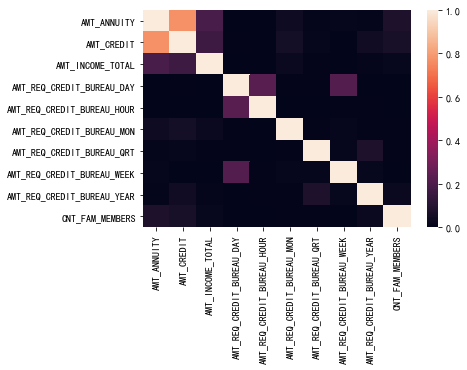

In [37]:
import seaborn as sns

sns.heatmap(con_data.corr().abs().iloc[:10, :10])

In [38]:
con_data.dtypes.value_counts()

float64    346
dtype: int64

In [39]:
print(len(con_feature))
print(len(dis_feature))

346
47


In [40]:
import scipy.stats

In [41]:
class Dis_chi2(object):
    def __init__(self, x1, x2):
        tmp_df = pd.concat([x1, x2], axis=1)
        result = []
        for i in tmp_df.iloc[:, 0].unique():
            tmp = []
            for j in tmp_df.iloc[:, 1].unique():
                tmp.append(tmp_df[(tmp_df.iloc[:, 0] == i) & (tmp_df.iloc[:, 1] == j)].shape[0])
            result.append(tmp)
        chi2, p, dof, ex = scipy.stats.chi2_contingency(result)
        self.chi2 = chi2
        self.result = result
        self.p = p

import copy

dis_data_mid = copy.deepcopy(dis_data)
dis_data_mid

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
for col in dis_data_mid.columns:
    ser = dis_data_mid[col].value_counts()
    x = ser.index
    y = list(ser)
    fig, ax = plt.subplots()
    img = ax.bar(x, y)
    ax.set_title(col)
    autolabel(img)
    plt.show()
    


while True:
    replace_list = []
    for col in dis_feature:
        tmp = dis_data_mid[col].value_counts()
        #print('{0:^30} {1:10} {2:10}'.format(col, list(tmp.index)[-1], list(tmp)[-1]))
        if list(tmp)[-1] < 3000:
            replace_list.append([col, list(tmp.index)[-1]])
            #print('{0:^30} {1:10} {2:10}'.format(col, list(tmp.index)[-1], list(tmp)[-1]))

    print(len(replace_list), '\n\n')
    for i in range(len(replace_list)):
        col = replace_list[i][0]
        for_rep = dis_data_mid[col].mode()[0]
        dis_data_mid[col].replace(replace_list[i][1], for_rep, inplace=True)
    
    if not replace_list:
        break

col_list = dis_data_mid.columns
for col in col_list:
    if len(dis_data_mid[col].unique()) == 1:
        dis_data_mid = dis_data_mid.drop(columns=[col])

dis_data_mid.head()

class Dis_bin(object):
    def __init__(self):
        pass
        
    def cal_rate(self, value, y):
        df = self.df[self.df.iloc[:, 0] == value]
        rate_list = []
        ins_num = len(y)
        for y_val in y.unique():
            rate_list.append(df[df.iloc[:, 1] == y_val].shape[0] / ins_num)
            
        self.rate_list = rate_list
    
    def cal_same(self, x_0, x_1, y):
        self.cal_rate(x_0, y)
        rate_list_0 = self.rate_list
        self.cal_rate(x_1, y)
        rate_list_1 = self.rate_list
        same_ = 0
        for i in range(len(y.unique())):
            same_ += (rate_list_0[i] - rate_list_1[i]) ** 2
        
        self.same_ = same_
        
    def bining(self, x, y, threshold):
        df = pd.concat([x, y], axis=1)
        self.df = df
        while True:
            length = len(x.unique())
            x_list = list(x.unique())
            i_ = 0
            j_ = 0
            diff = 2
            for i in range(length):
                for j in range(i+1, length):
                    self.cal_same(x_list[i], x_list[j], y)
                    same_ = self.same_
                    if same_ < diff:
                        i_ = i
                        j_ = j
                        diff = same_
                
            if diff < threshold:
                x = x.replace(x_list[i_], x_list[j_])
                print(len(x.unique()))
            else:
                self.x = x
                break
        


db = Dis_bin()
for col in dis_data_mid.columns:
    print(col)
    db.bining(dis_data_mid[col], Y, 0.000002)
    dis_data_mid[col] = db.x

for col in dis_data_mid.columns:
    ser = dis_data_mid[col].value_counts()
    x = ser.index
    y = list(ser)
    fig, ax = plt.subplots()
    img = ax.bar(x, y)
    ax.set_title(col)
    autolabel(img)
    plt.show()

dis_p_matrix = pd.DataFrame()

for col in dis_data_mid.columns:
    print('col', col)
    tmp = []
    for col_ in dis_data_mid.columns:
        dis_chi2 = Dis_chi2(dis_data_mid[col], dis_data_mid[col_])
        p = dis_chi2.p
        tmp.append(p)
    print('hello world!')
    dis_p_matrix[col] = tmp
  

dis_p_matrix.index = dis_data_mid.columns

dis_p_matrix.to_csv('../Data/dis_p_matrix_merged.csv', encoding='utf-8_sig')
dis_p_matrix

upper = dis_p_matrix.where(np.triu(np.ones(dis_p_matrix.shape), k=1).astype(np.bool))
upper

threshold = 0.001
to_drop = [column for column in upper.columns if any(upper[column] < threshold)]
len(to_drop)

list(set(dis_data_mid.columns).difference(set(to_drop)))

dis_data = dis_data.drop(columns=to_drop)
dis_feature = dis_data.columns
X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_2.csv', encoding='utf-8_sig', index=False)

In [42]:
print(len(con_feature))
print(len(dis_feature))
print(X.shape)
X.head()

346
47
(307511, 393)


,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_FAM_MEMBERS,...,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,FLAG_DOCUMENT_2,FLAG_DOCUMENT_10,FLAG_DOCUMENT_7,REG_REGION_NOT_WORK_REGION,FLAG_DOCUMENT_20,FLAG_EMAIL,FLAG_DOCUMENT_11,FLAG_DOCUMENT_21
0,0.090032,0.090287,0.001512,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.132924,0.311736,0.002089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,...,0,0,0,0,0,0,0,0,0,0
2,0.020025,0.022472,0.000358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.109477,0.066837,0.000935,0.000778,0.001601,0.009904,0.001017,0.004295,0.075999,0.052632,...,0,0,0,0,0,0,0,0,0,0
4,0.078975,0.116854,0.000819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [43]:
list(dis_feature)

['CODE_GENDER',
 'EMERGENCYSTATE_MODE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_9',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_CONT_MOBILE',
 'FLAG_EMP_PHONE',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_15',
 'FLAG_MOBIL',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_8',
 'REGION_RATING_CLIENT',
 'FLAG_DOCUMENT_14',
 'FLAG_WORK_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_7',
 'REG_REGION_NOT_WORK_REGION',
 'FLAG_DOCUMENT_20',
 'FLAG_EMAIL',
 'FLAG_DO

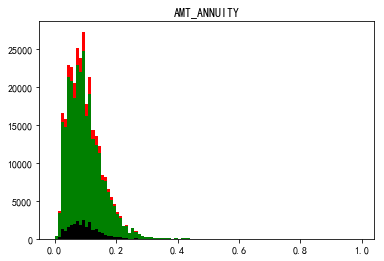

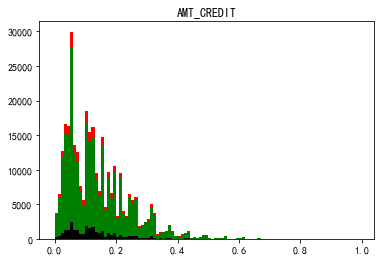

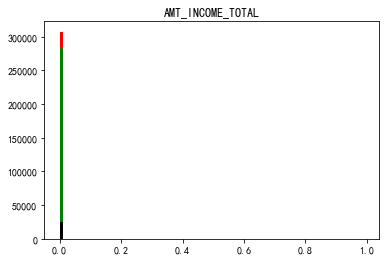

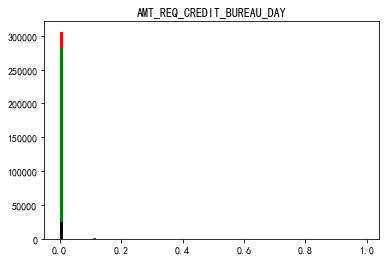

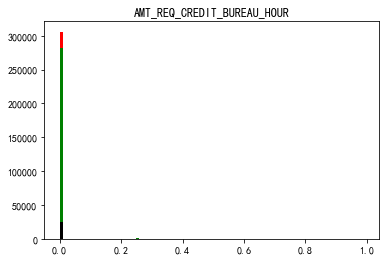

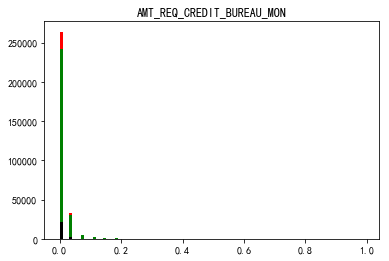

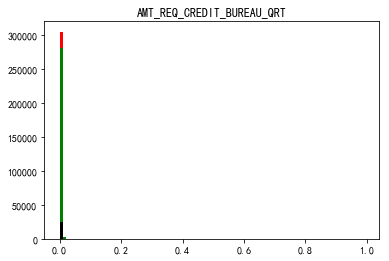

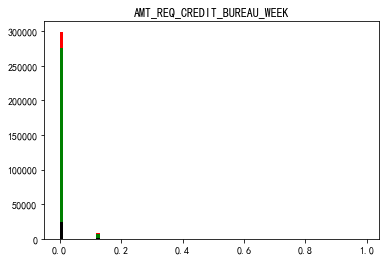

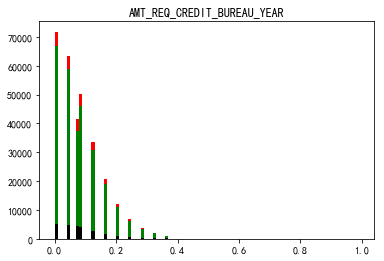

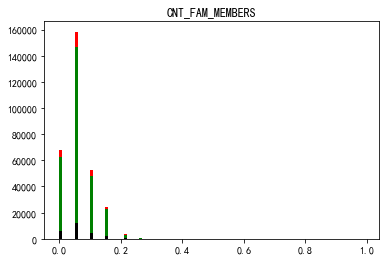

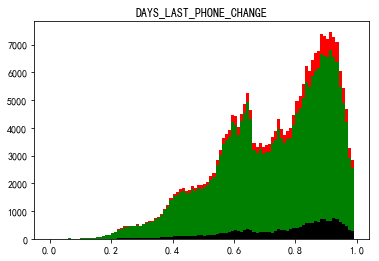

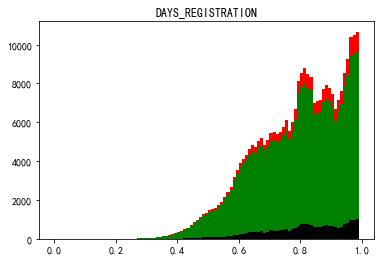

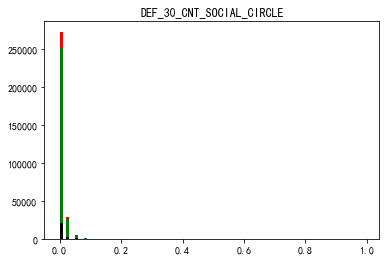

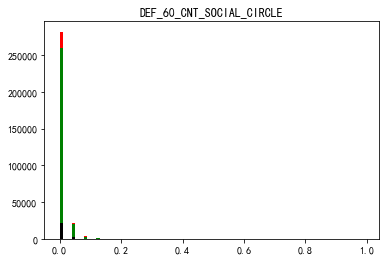

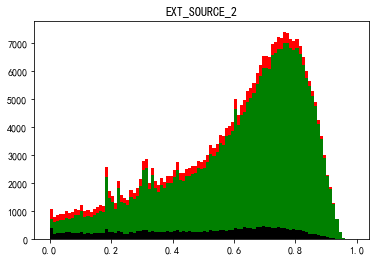

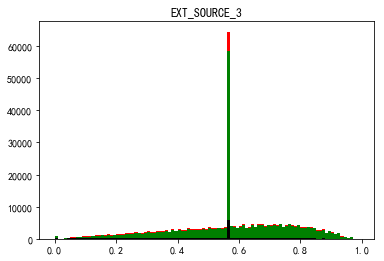

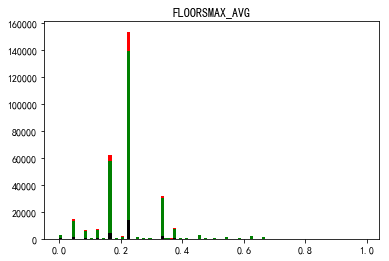

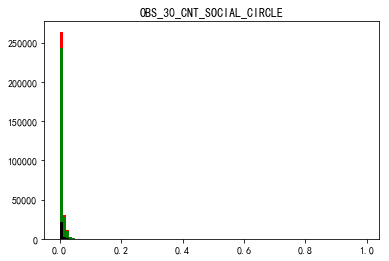

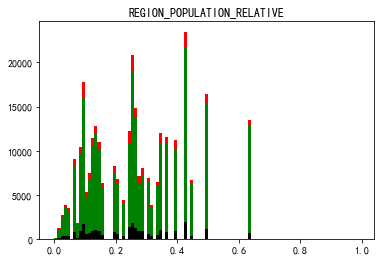

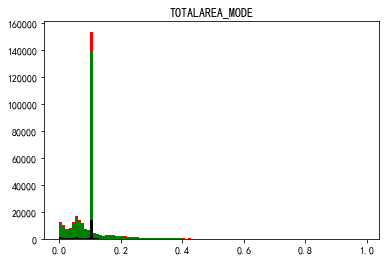

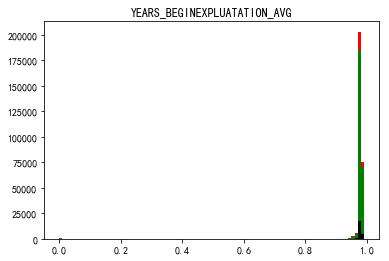

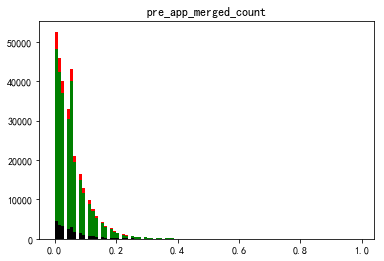

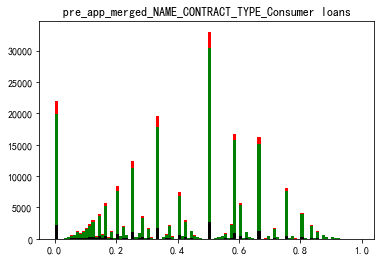

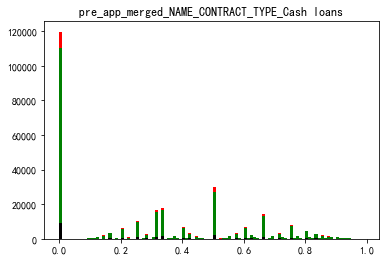

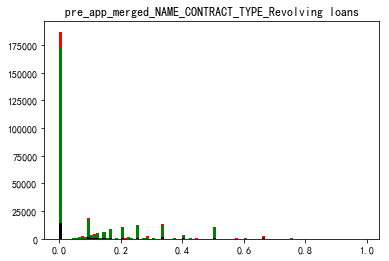

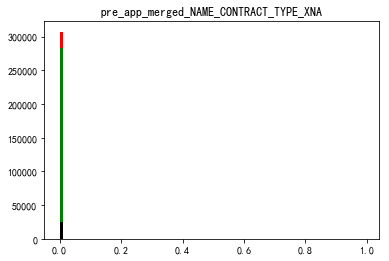

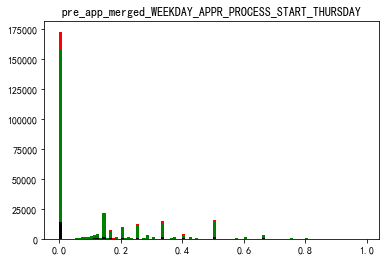

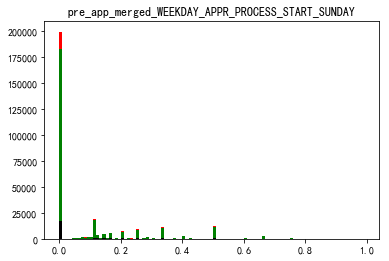

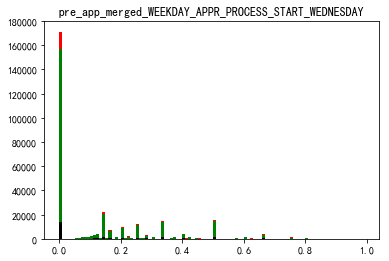

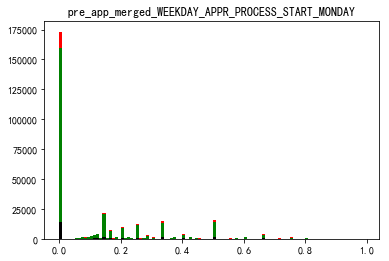

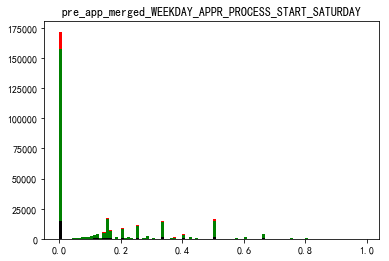

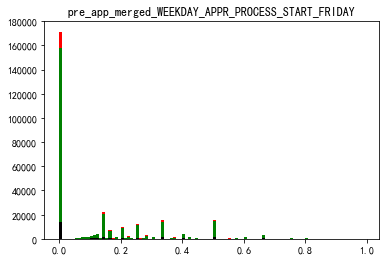

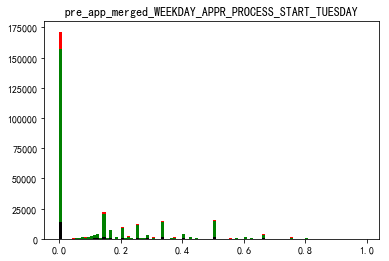

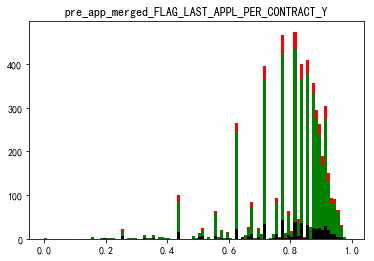

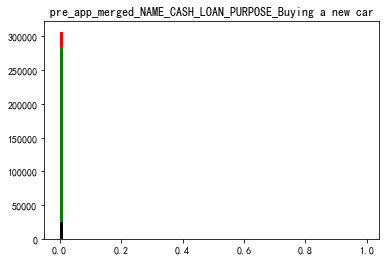

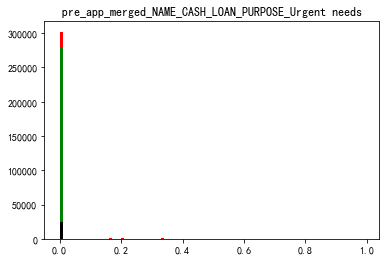

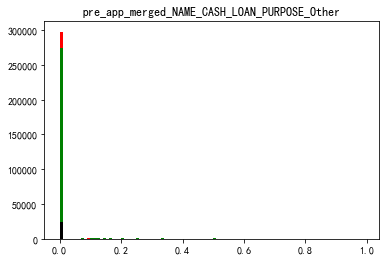

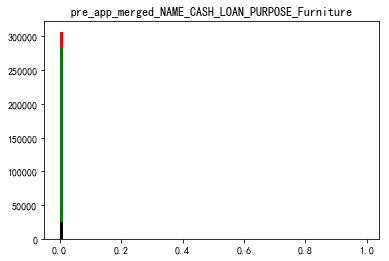

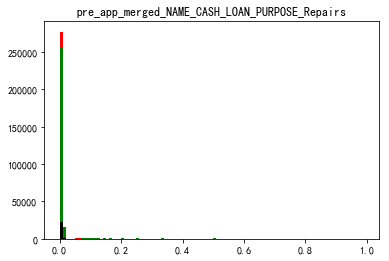

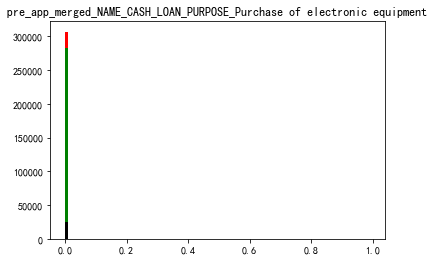

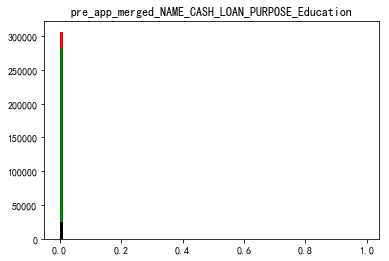

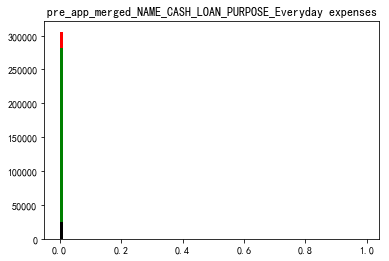

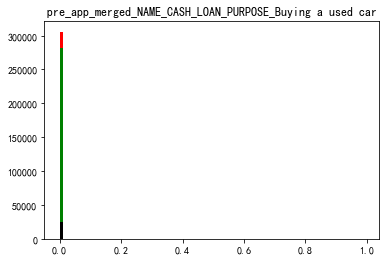

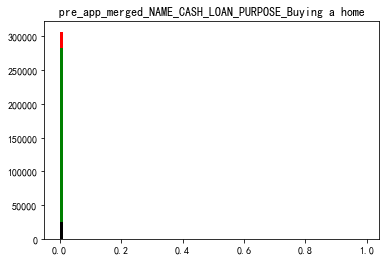

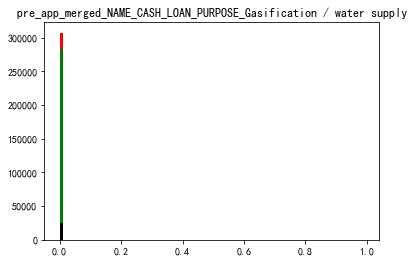

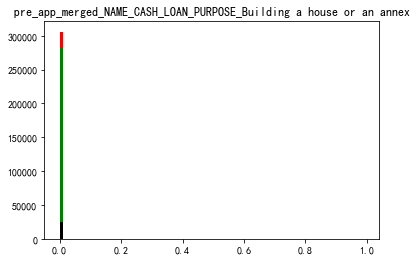

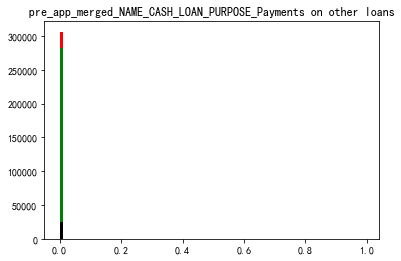

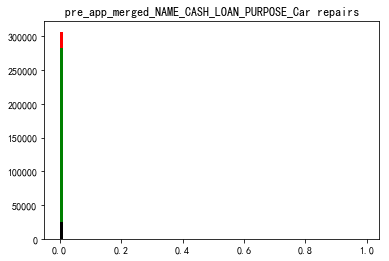

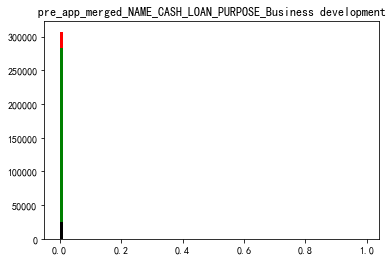

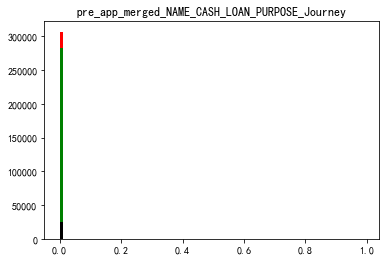

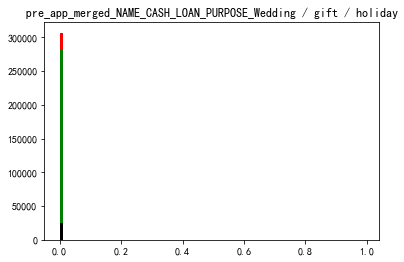

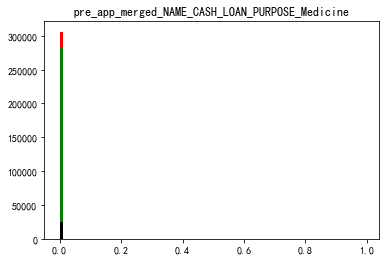

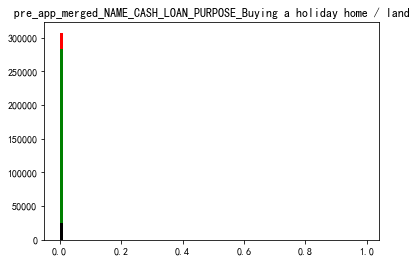

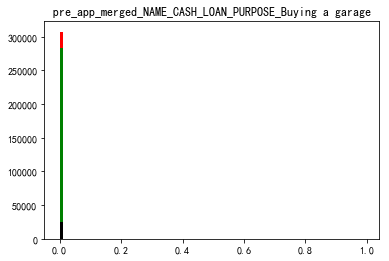

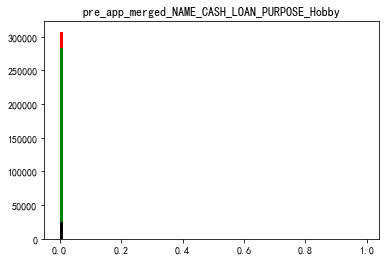

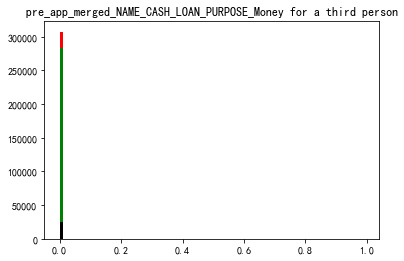

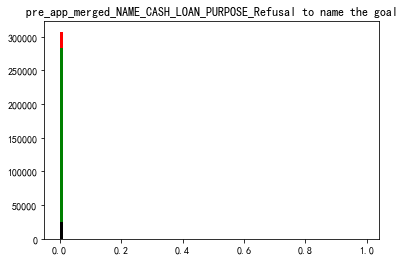

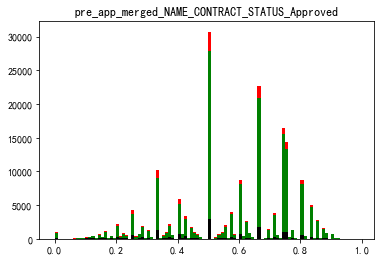

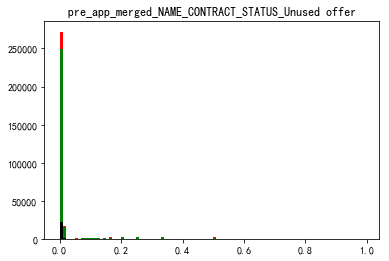

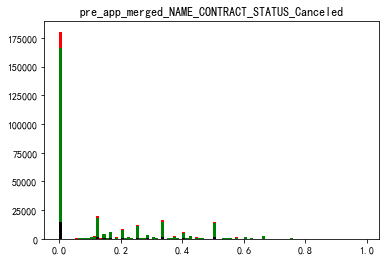

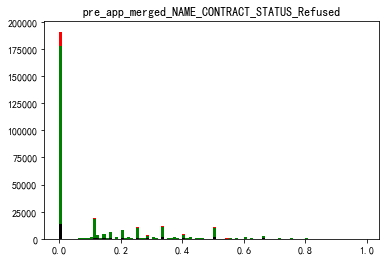

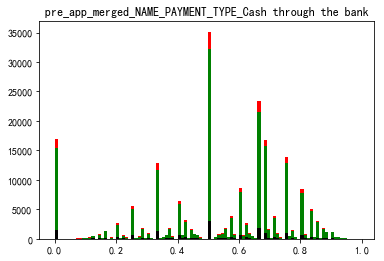

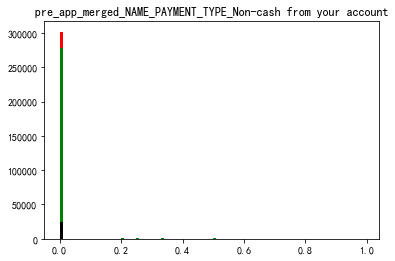

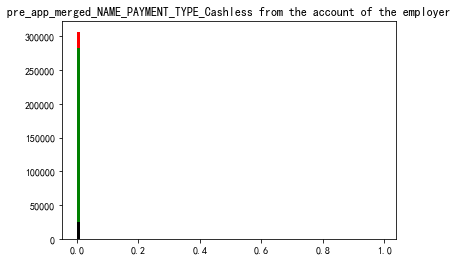

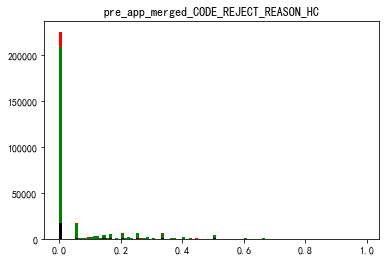

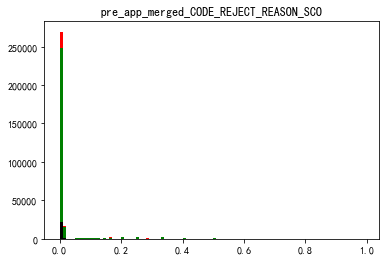

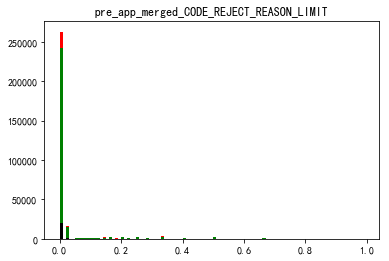

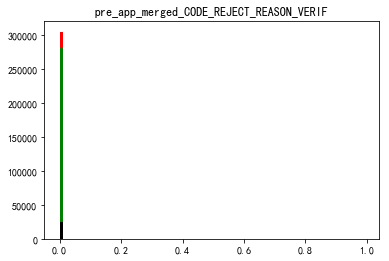

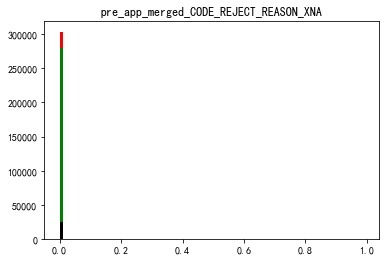

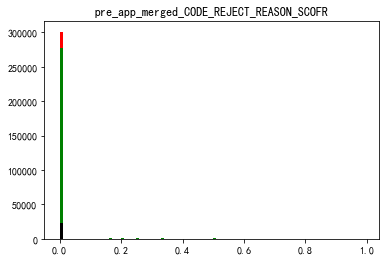

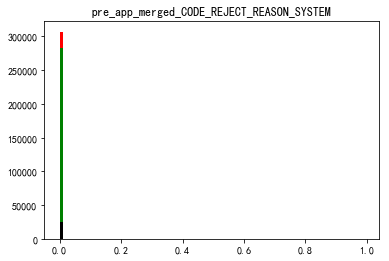

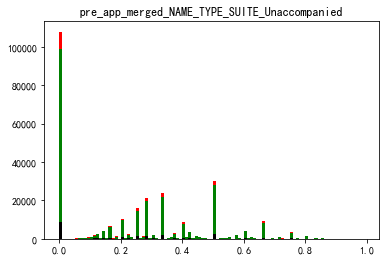

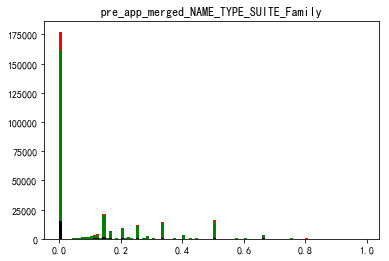

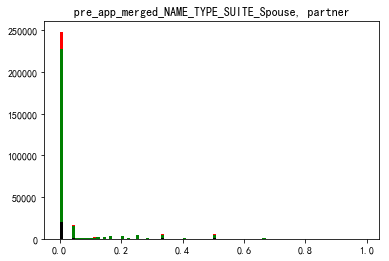

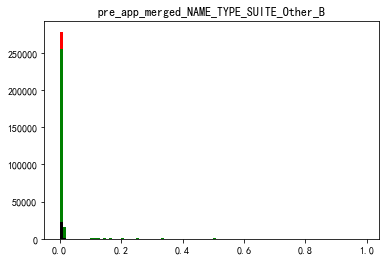

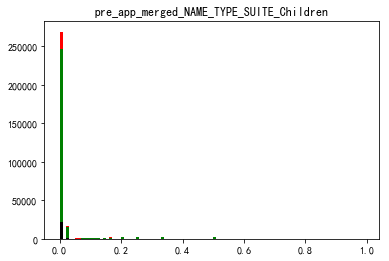

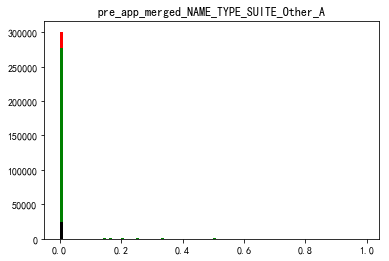

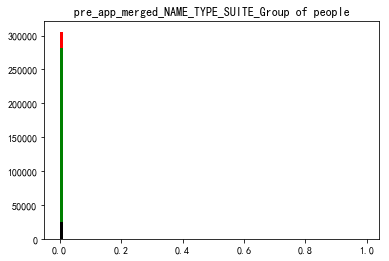

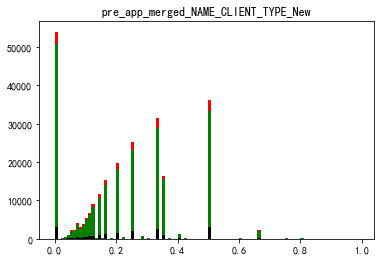

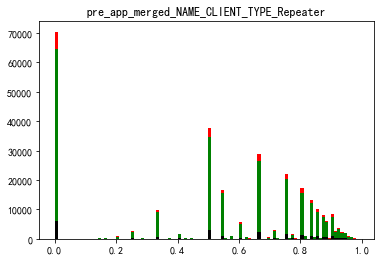

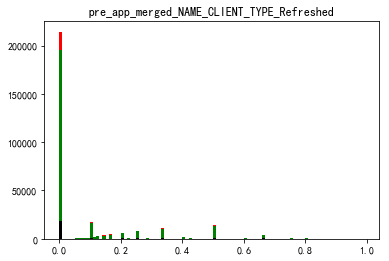

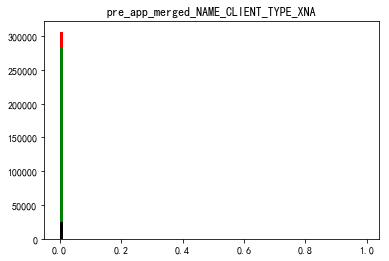

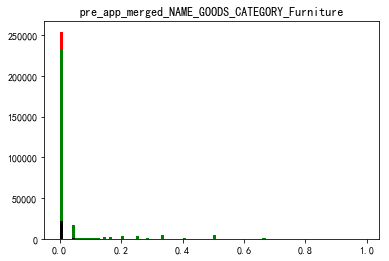

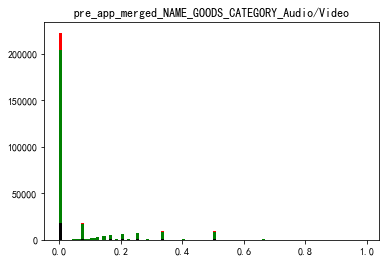

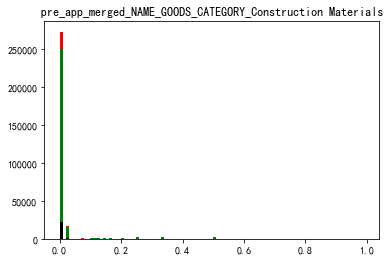

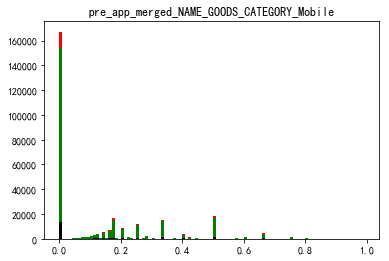

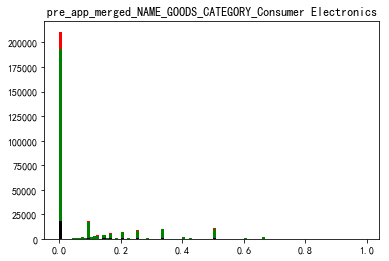

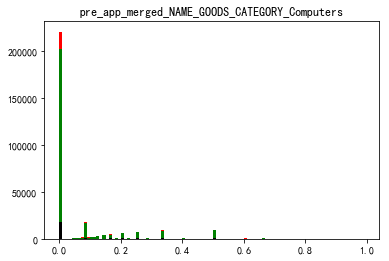

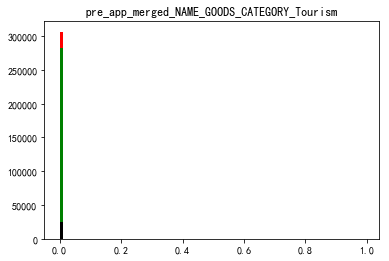

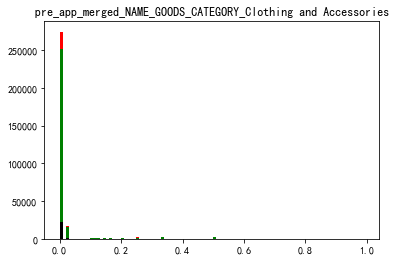

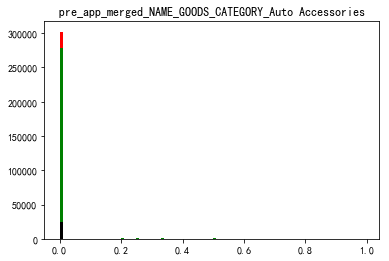

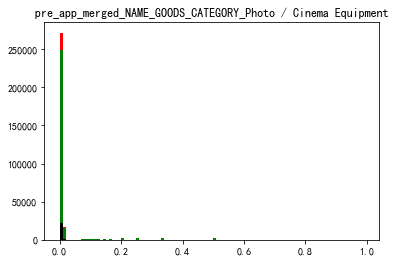

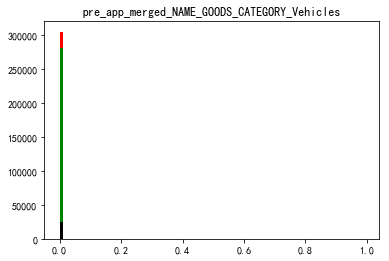

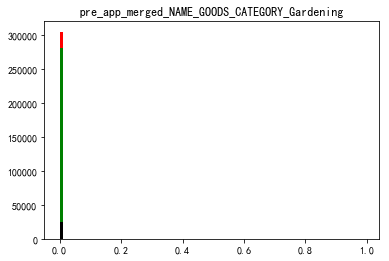

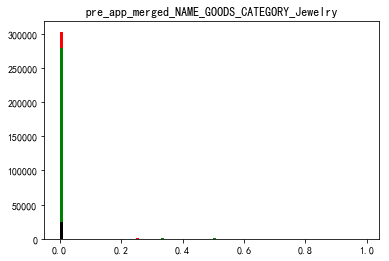

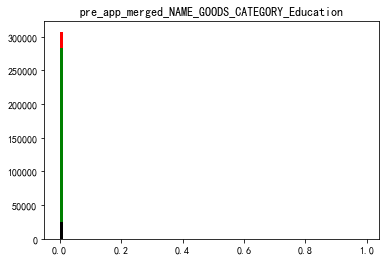

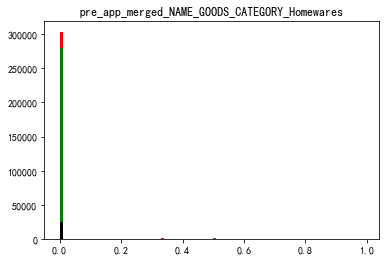

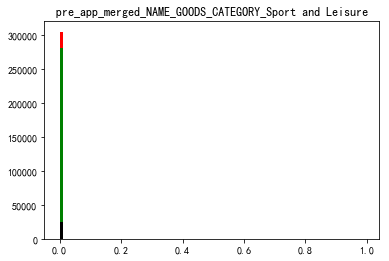

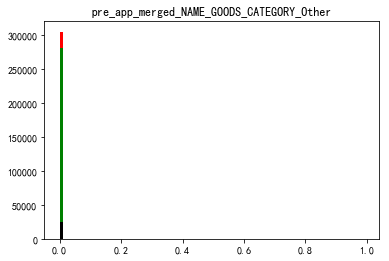

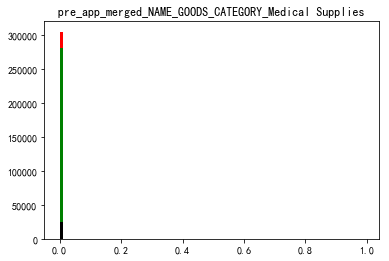

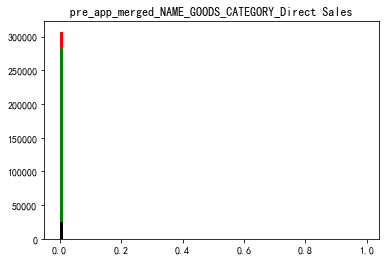

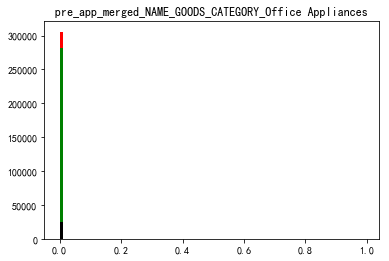

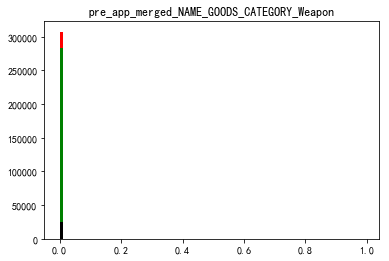

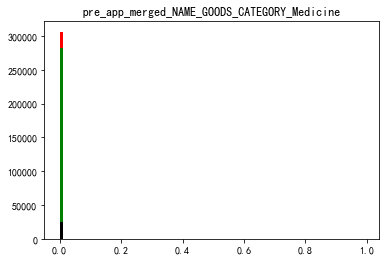

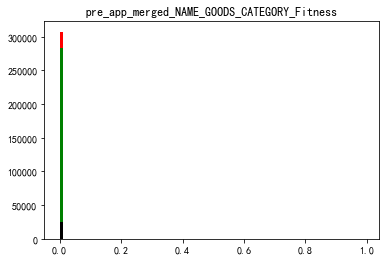

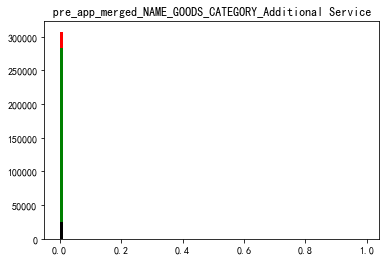

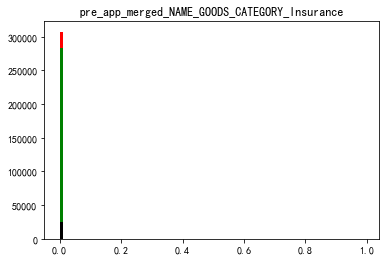

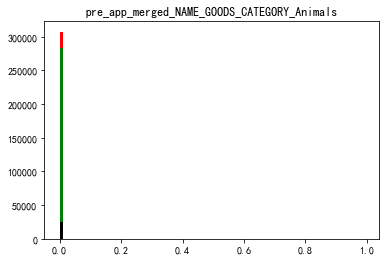

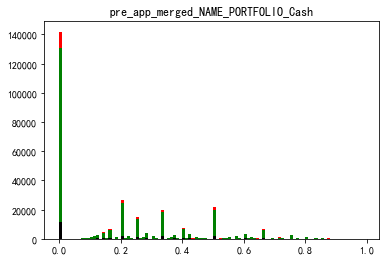

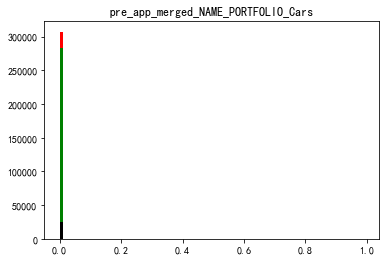

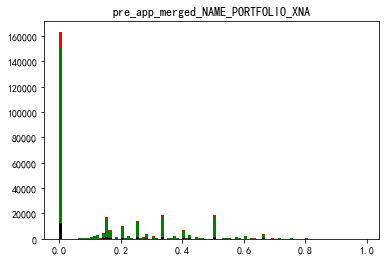

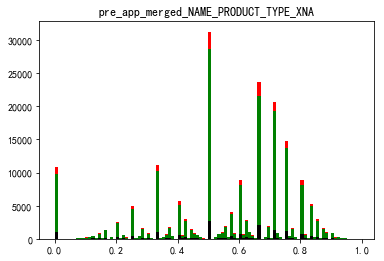

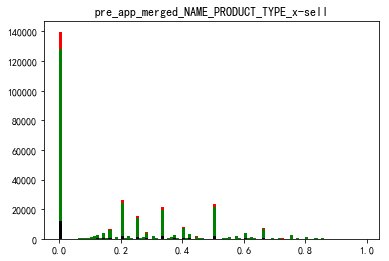

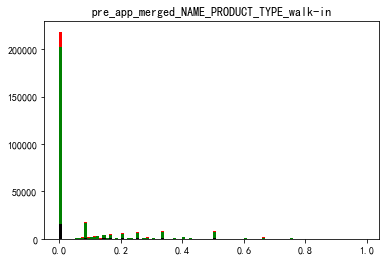

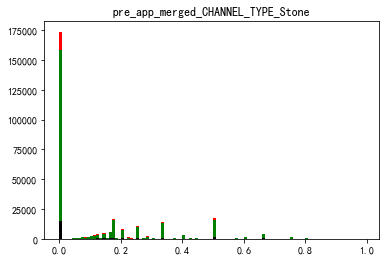

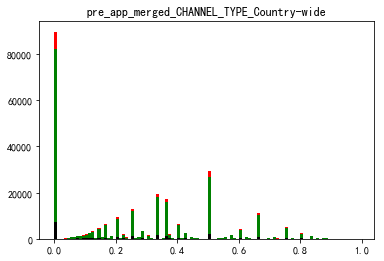

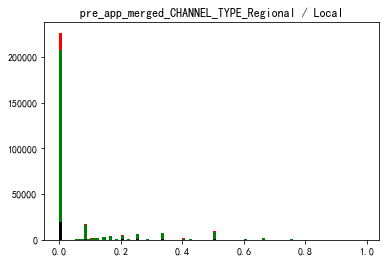

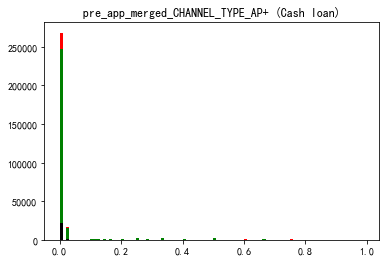

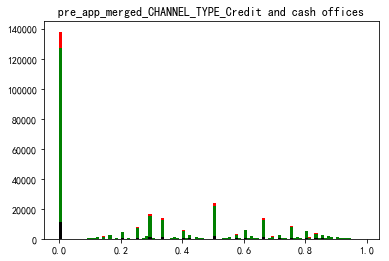

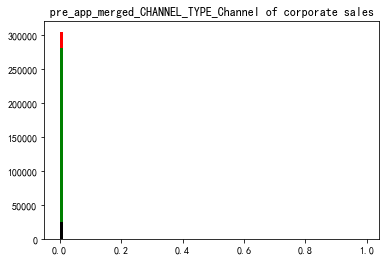

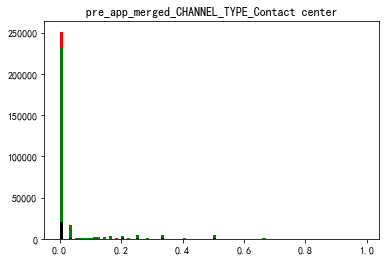

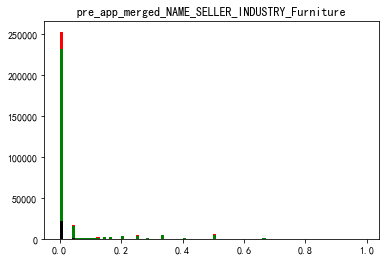

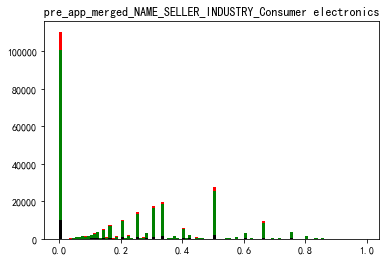

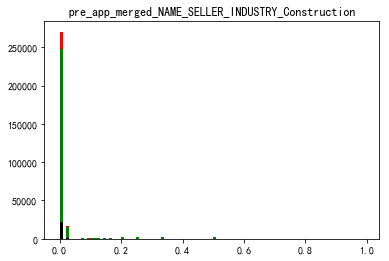

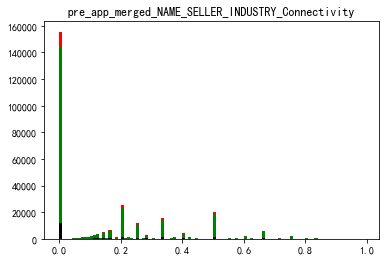

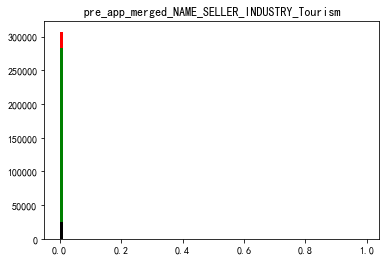

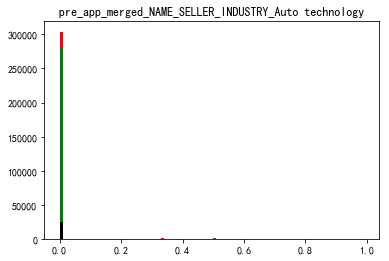

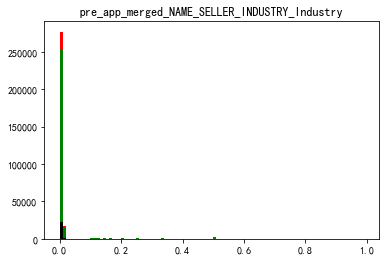

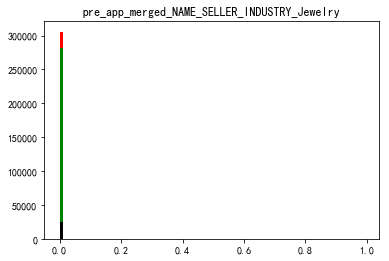

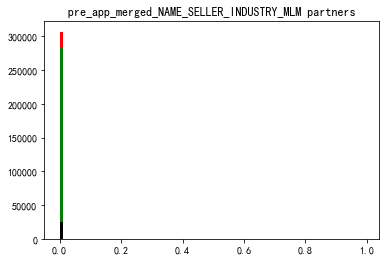

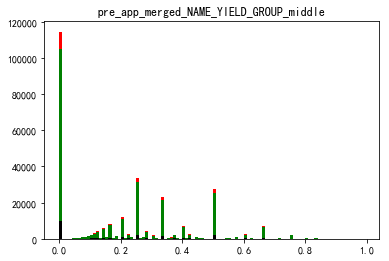

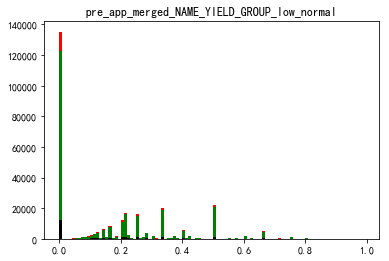

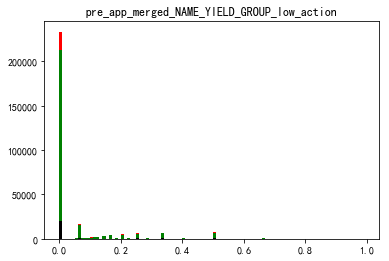

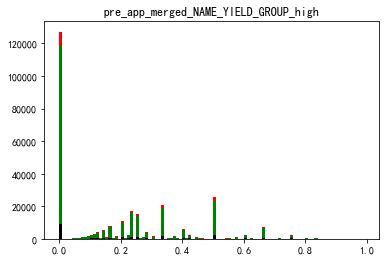

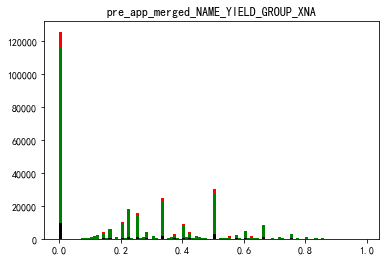

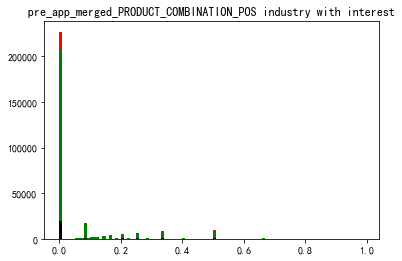

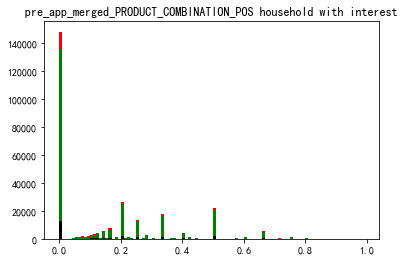

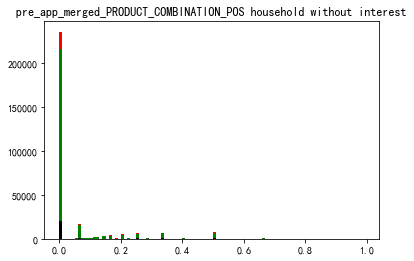

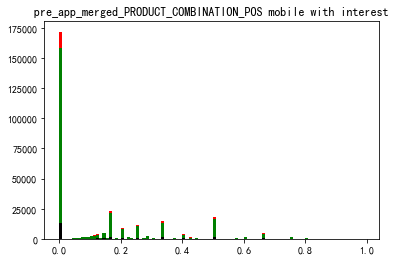

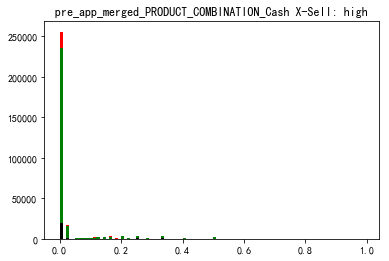

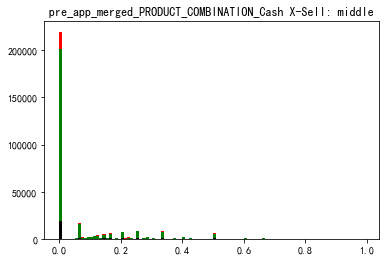

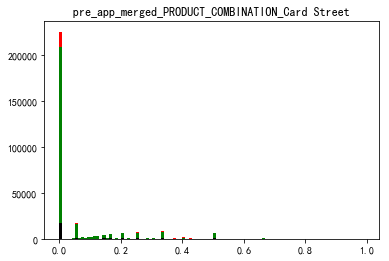

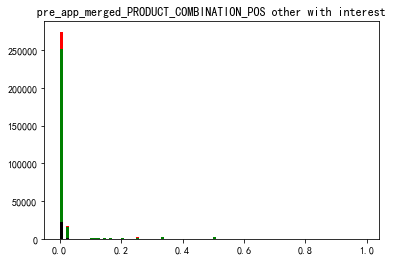

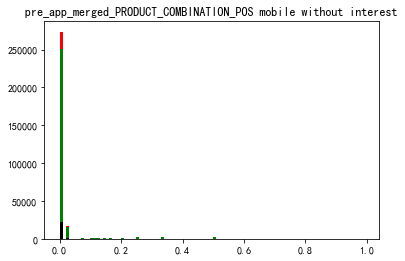

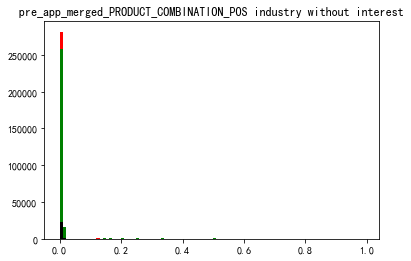

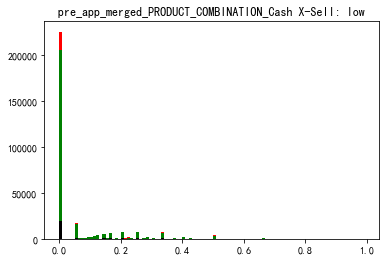

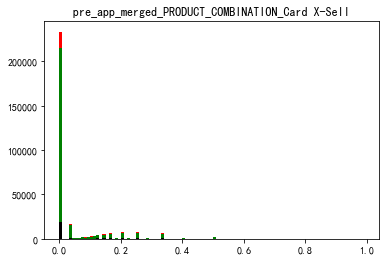

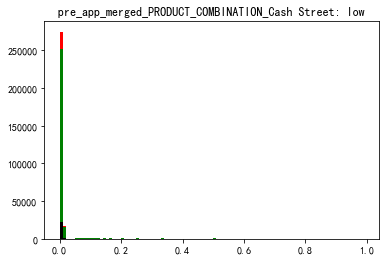

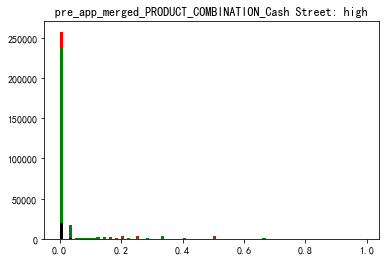

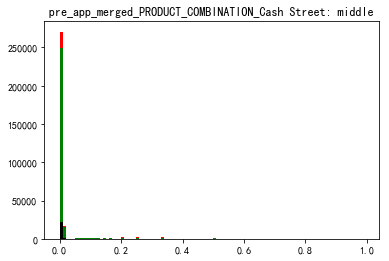

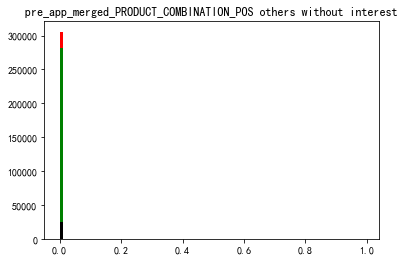

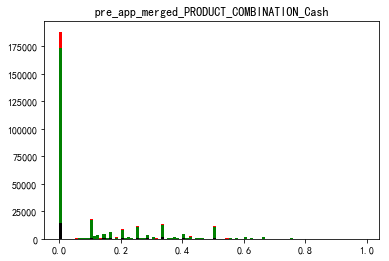

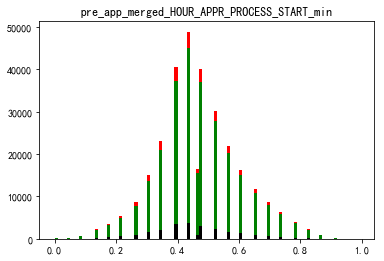

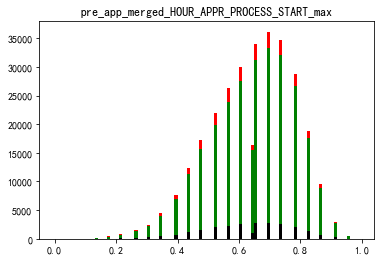

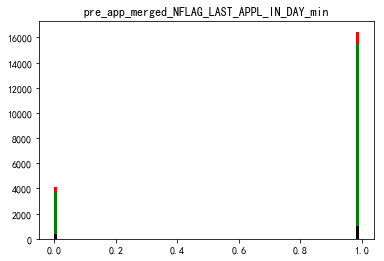

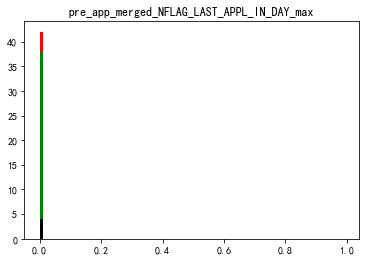

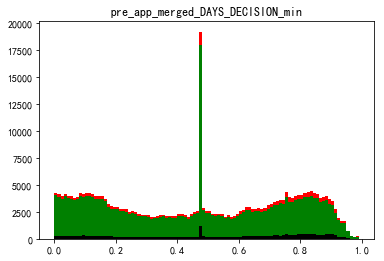

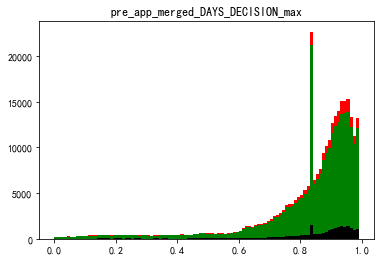

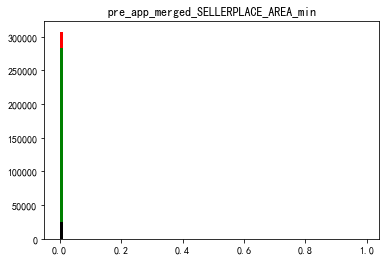

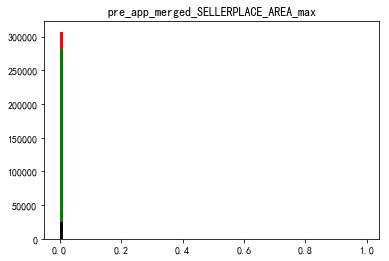

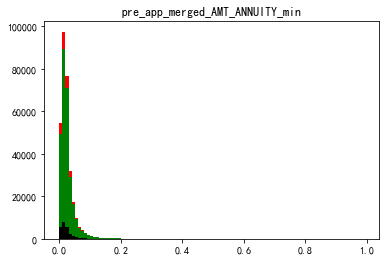

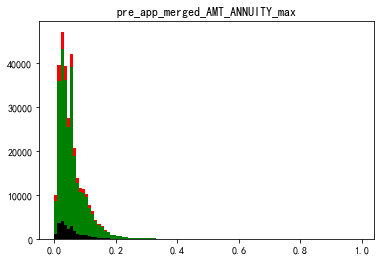

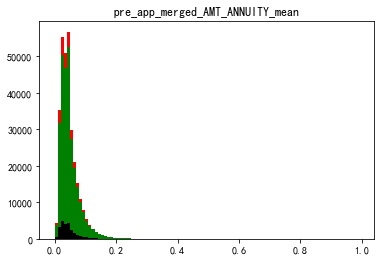

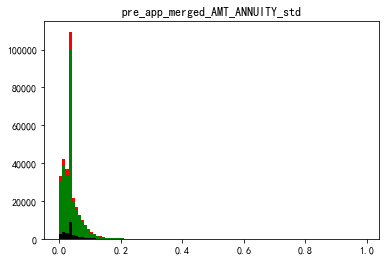

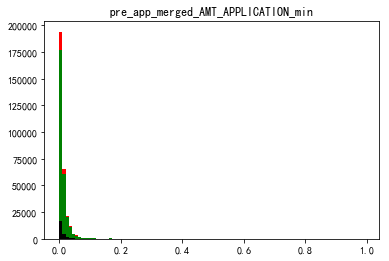

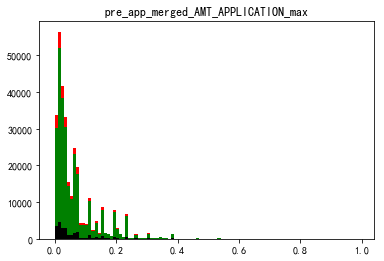

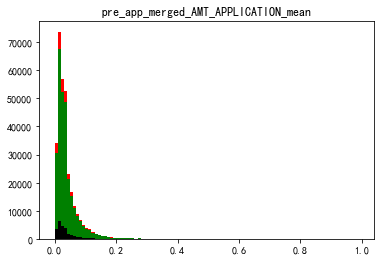

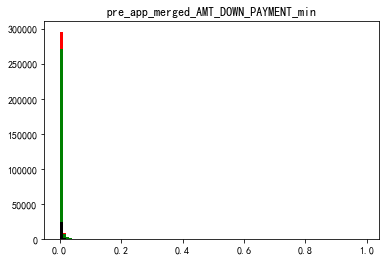

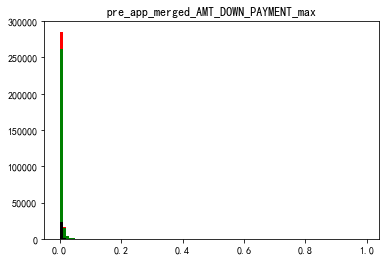

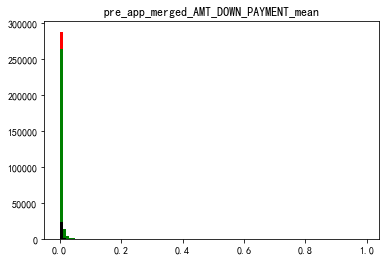

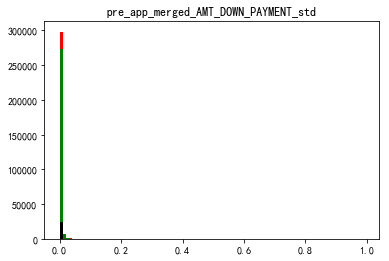

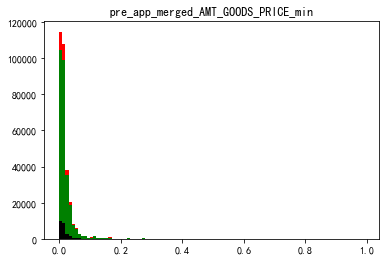

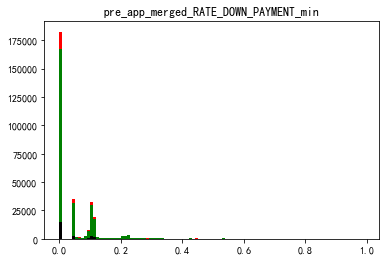

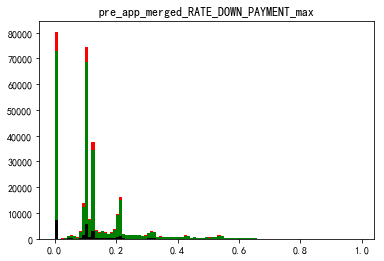

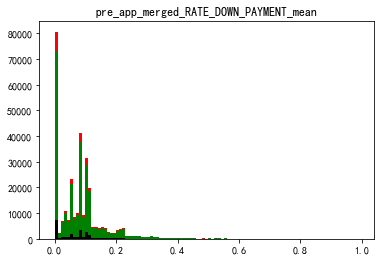

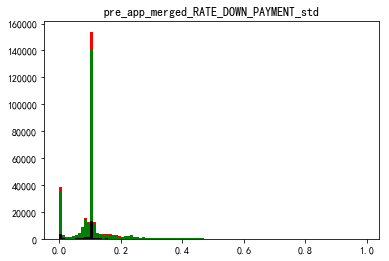

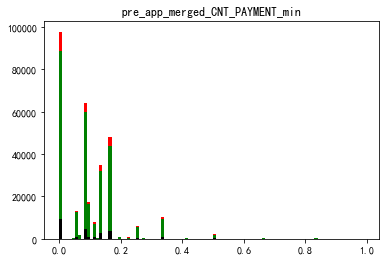

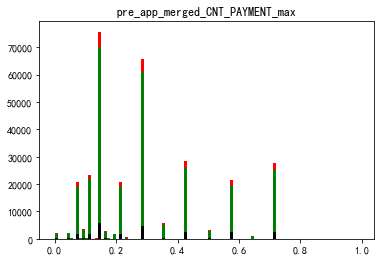

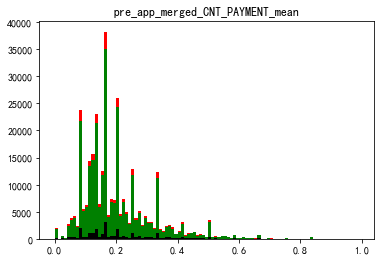

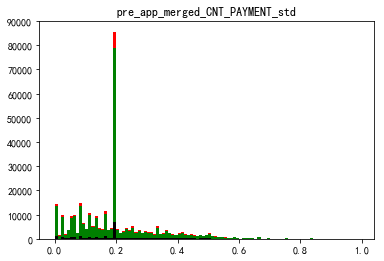

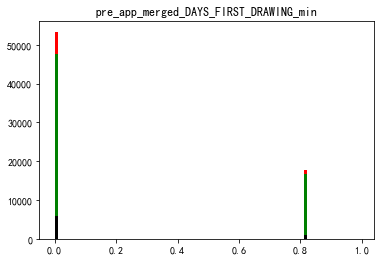

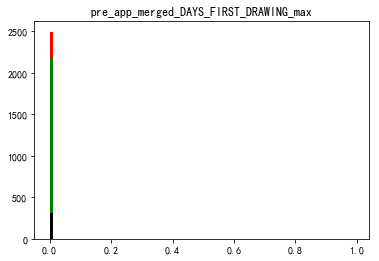

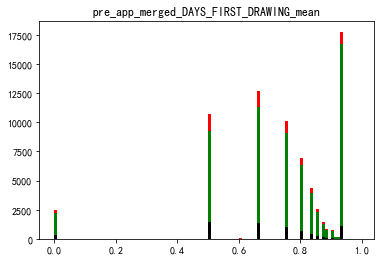

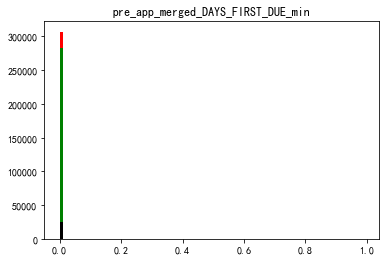

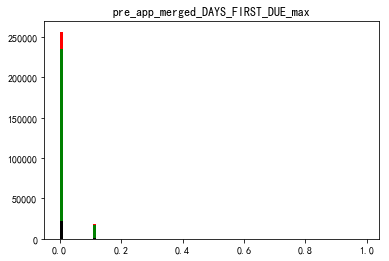

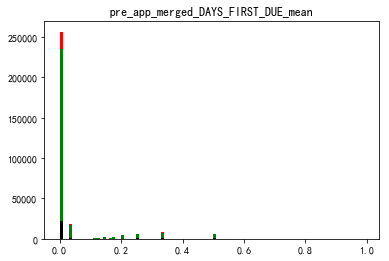

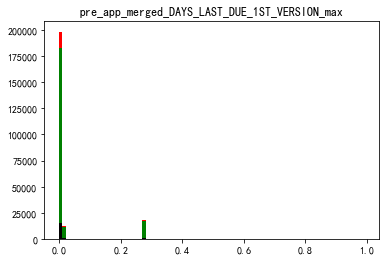

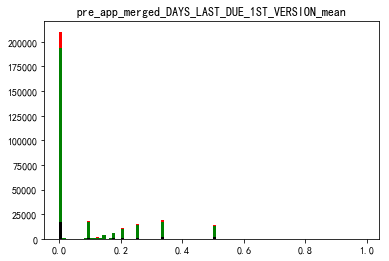

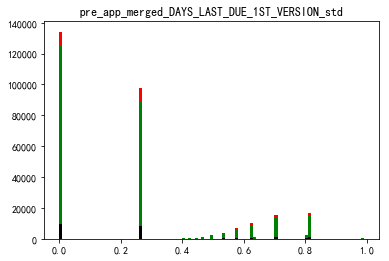

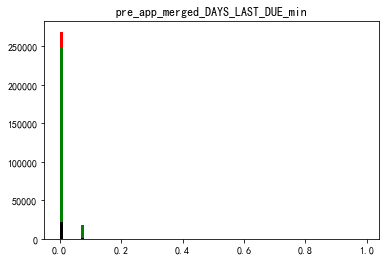

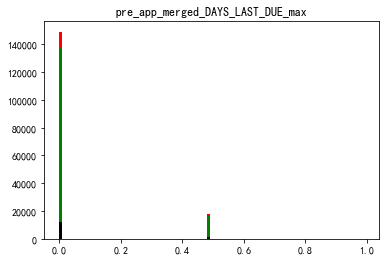

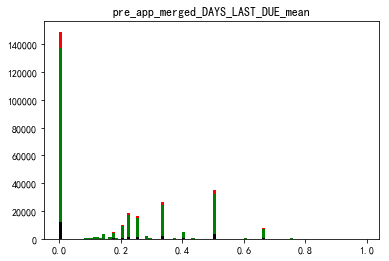

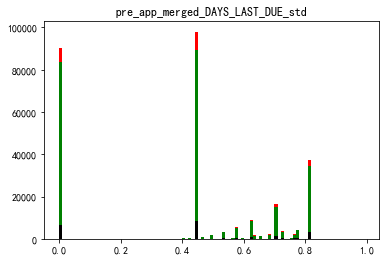

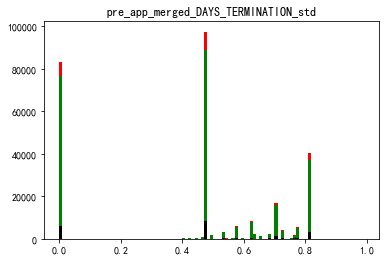

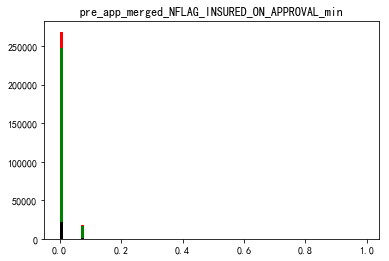

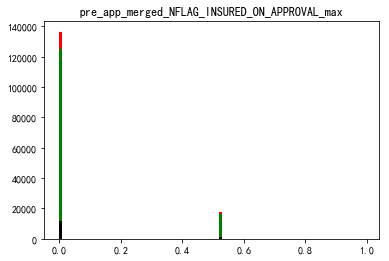

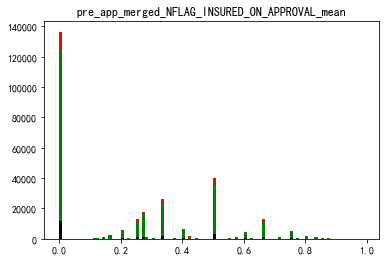

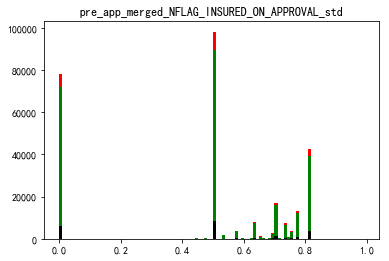

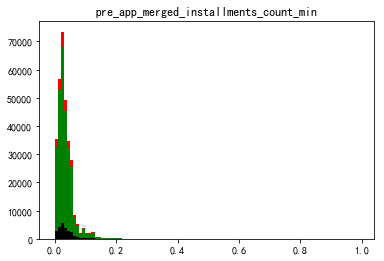

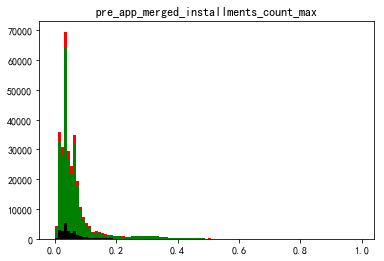

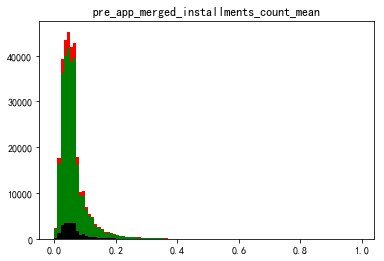

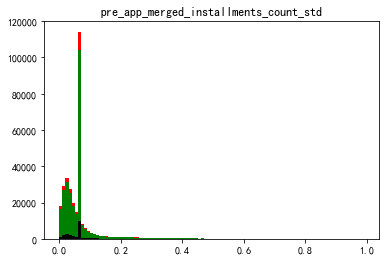

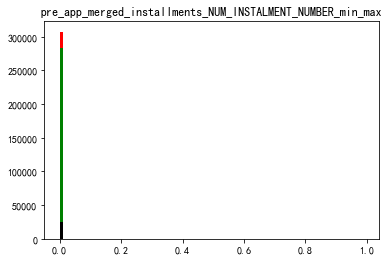

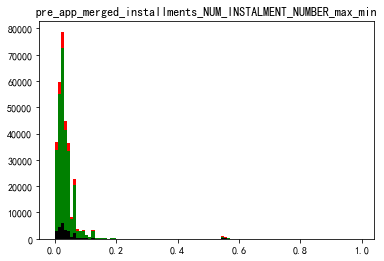

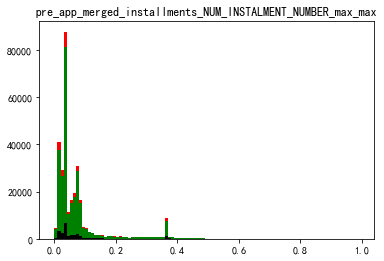

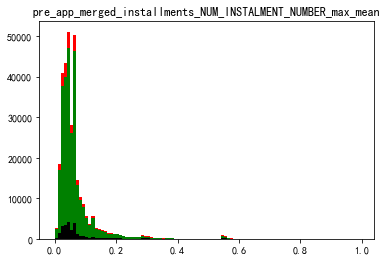

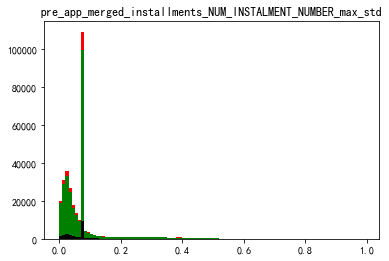

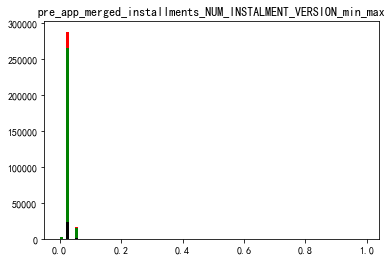

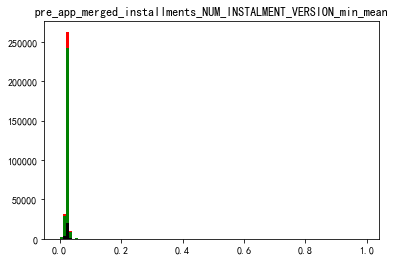

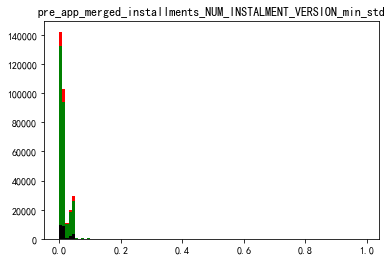

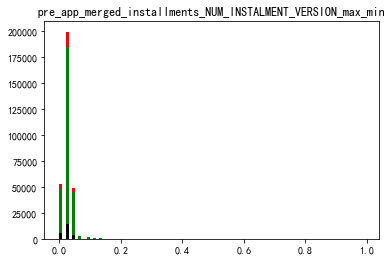

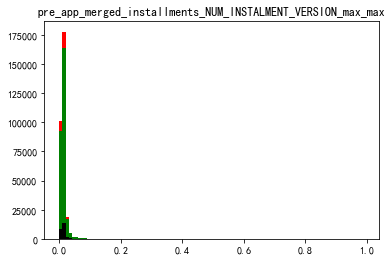

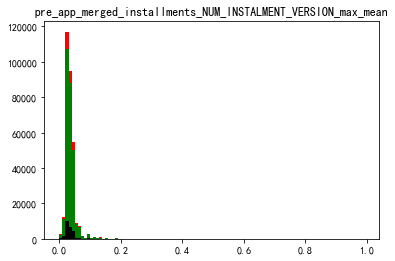

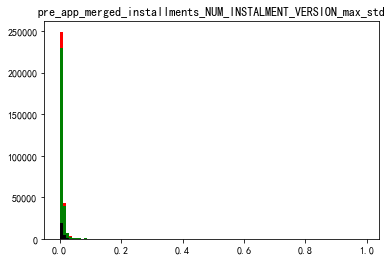

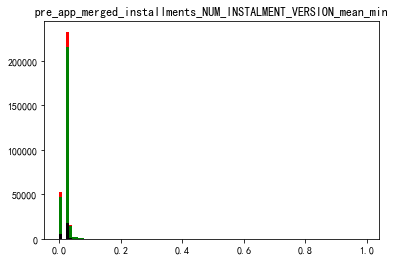

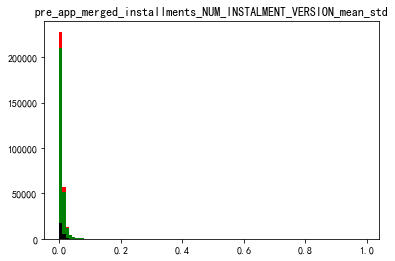

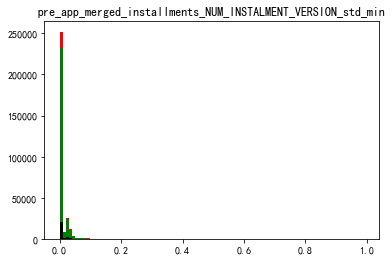

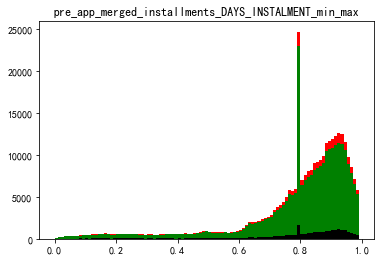

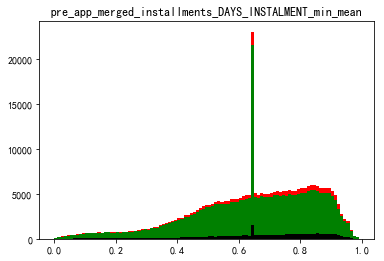

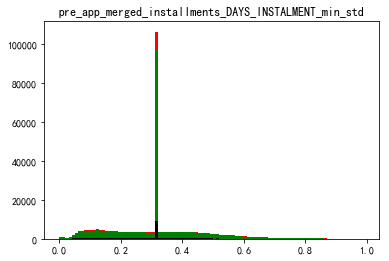

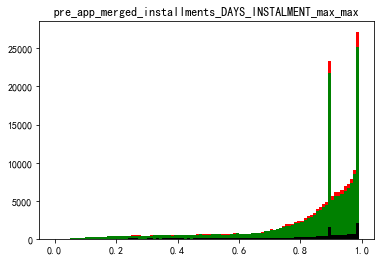

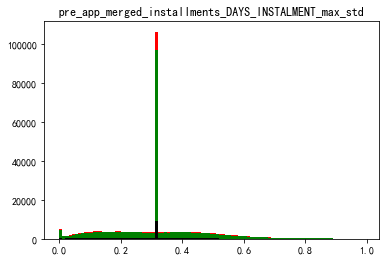

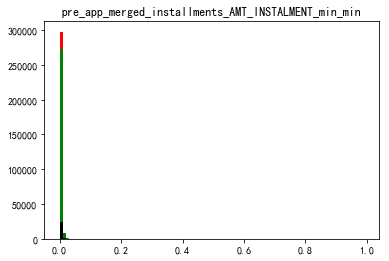

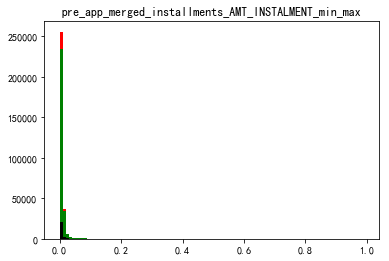

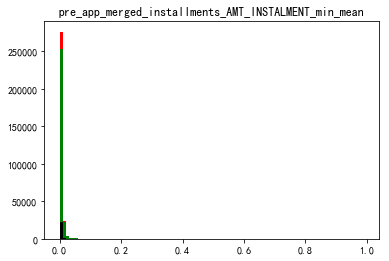

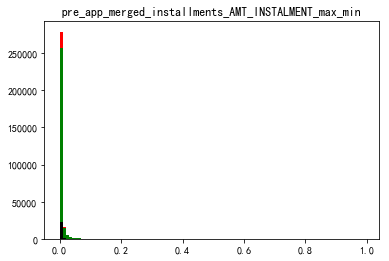

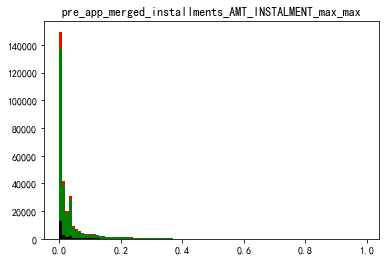

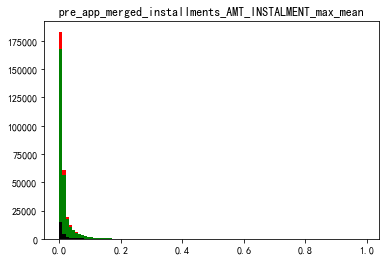

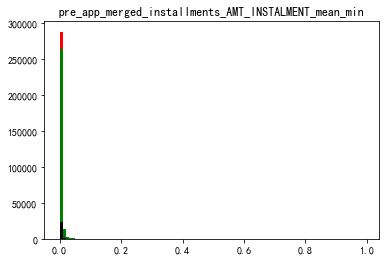

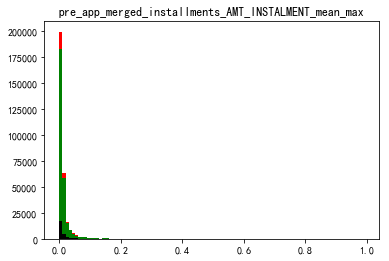

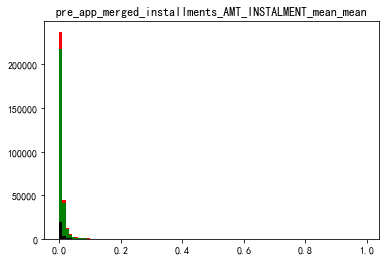

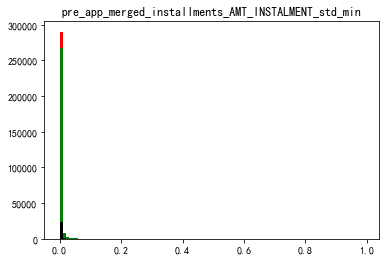

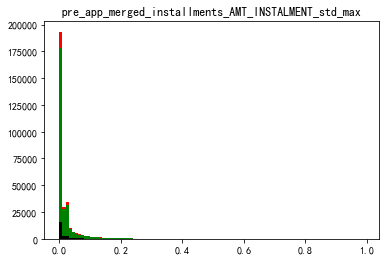

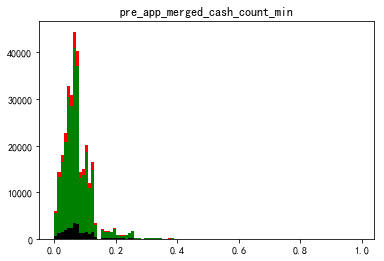

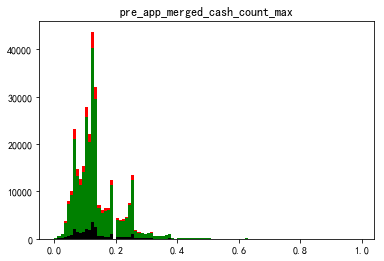

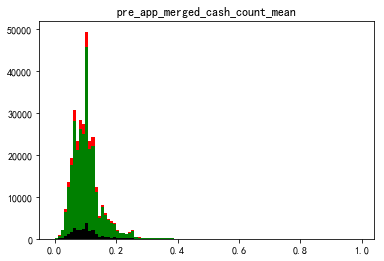

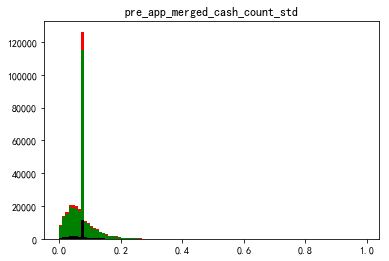

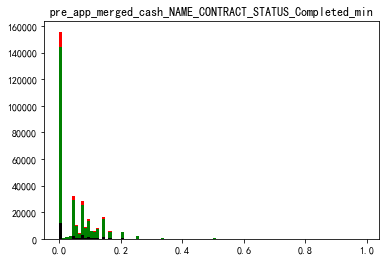

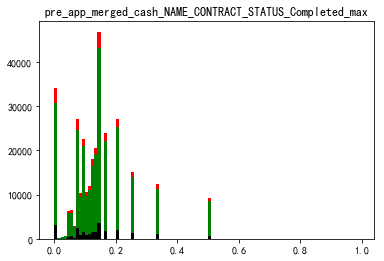

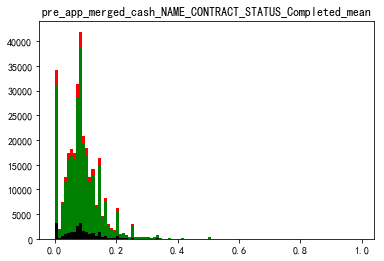

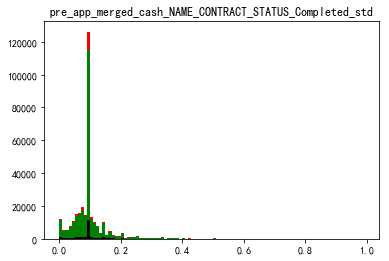

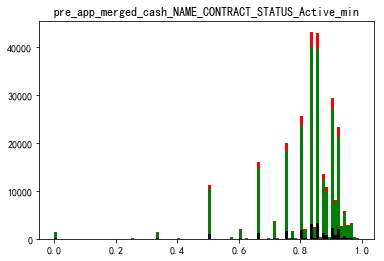

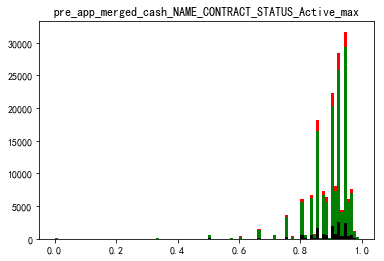

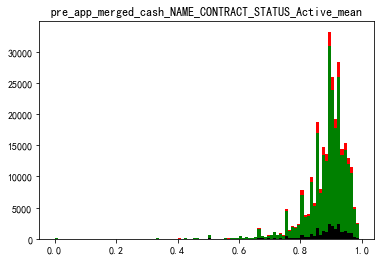

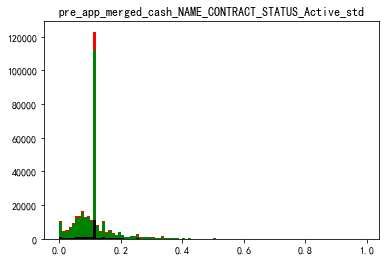

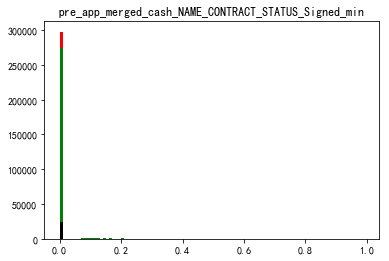

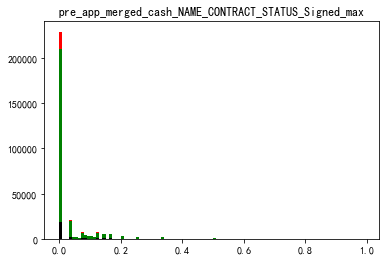

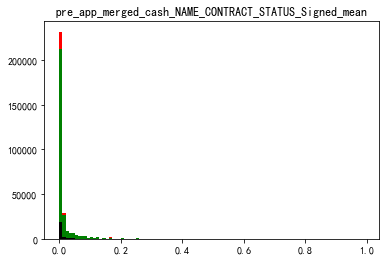

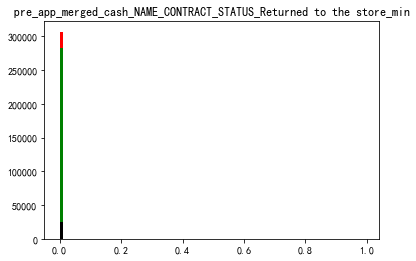

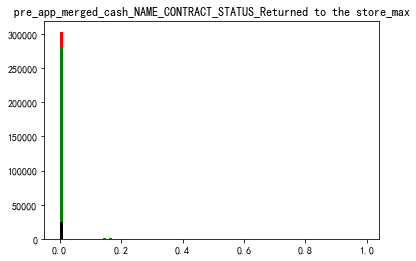

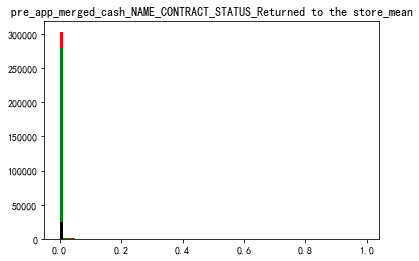

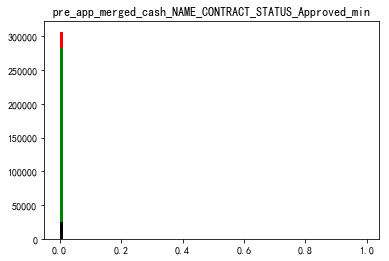

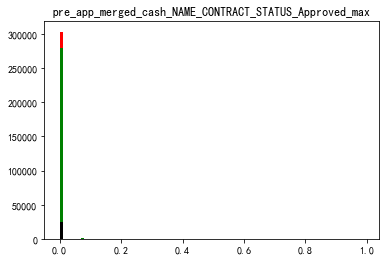

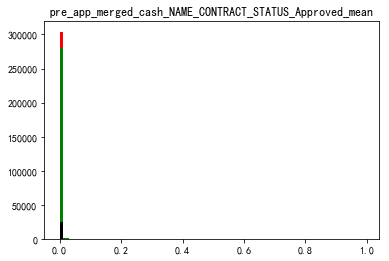

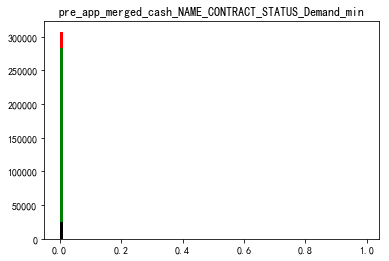

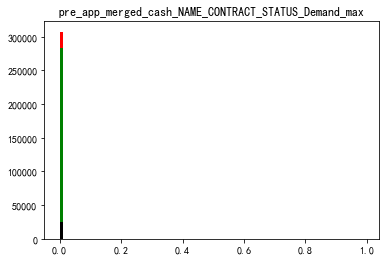

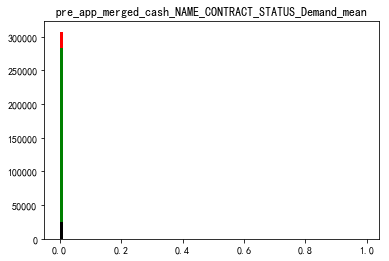

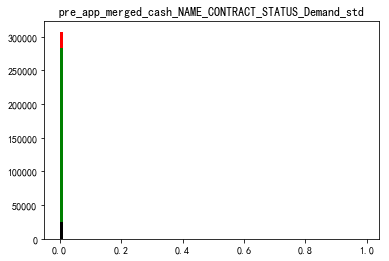

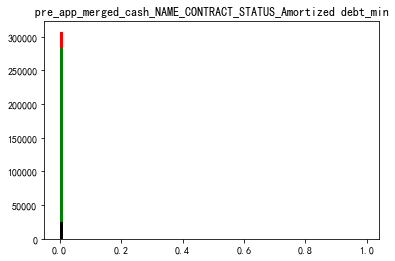

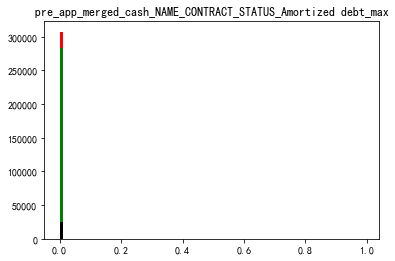

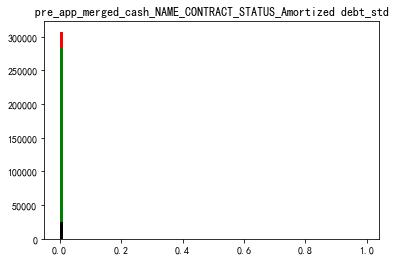

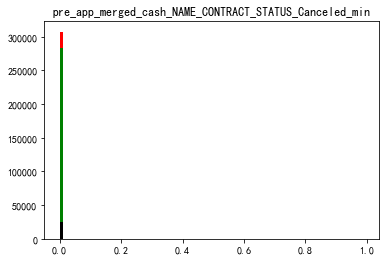

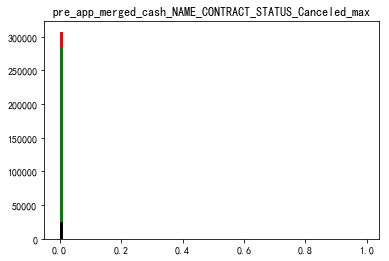

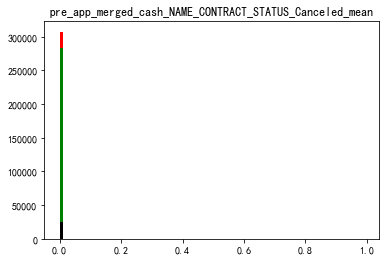

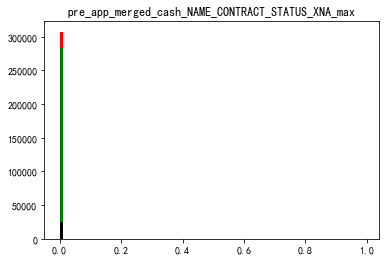

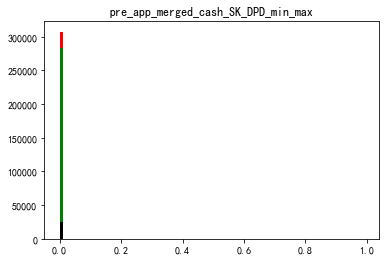

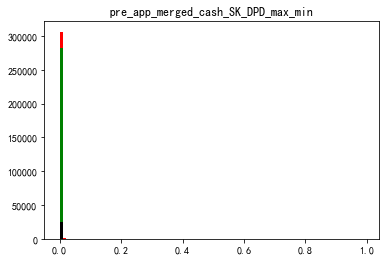

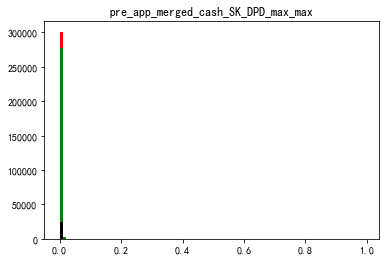

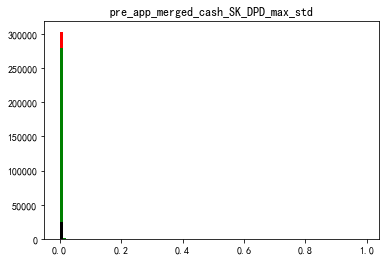

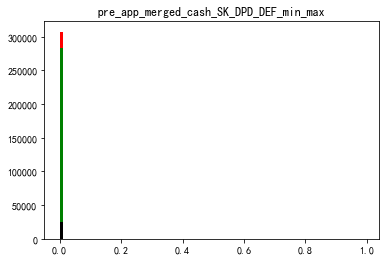

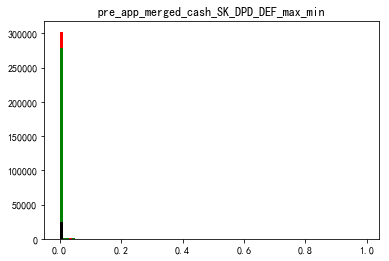

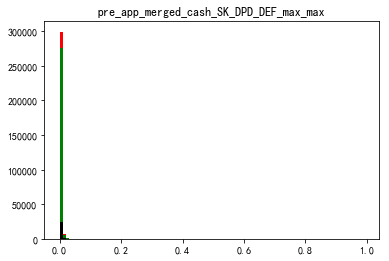

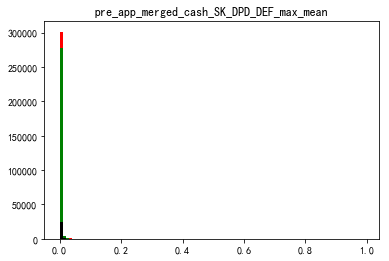

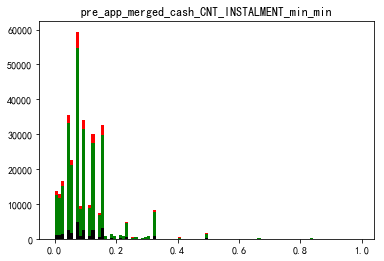

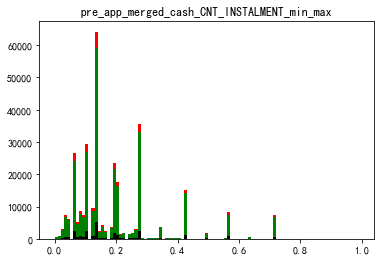

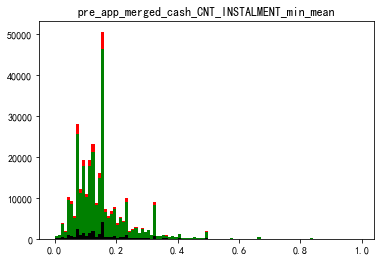

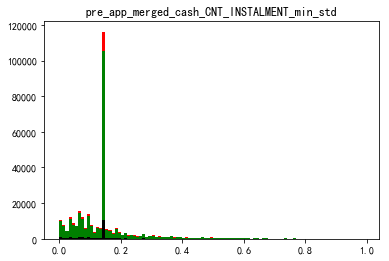

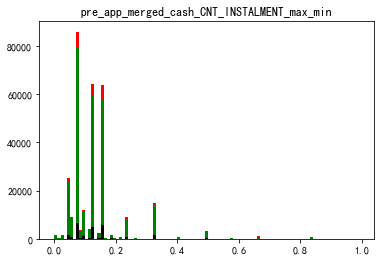

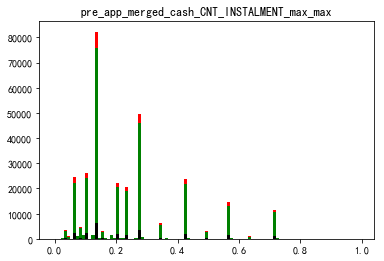

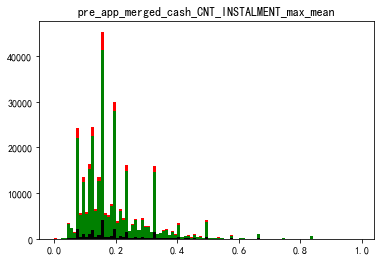

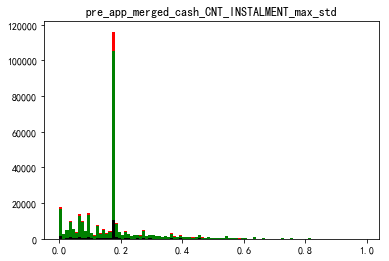

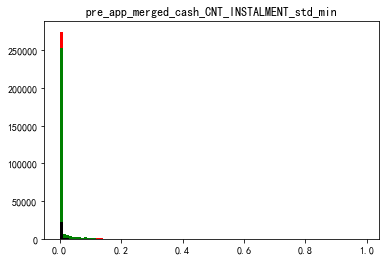

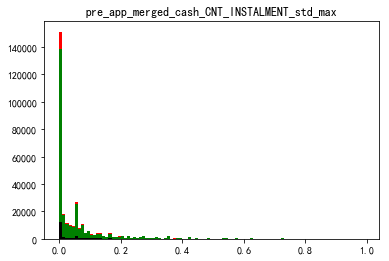

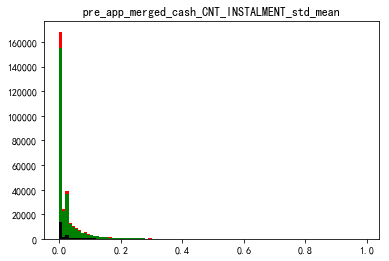

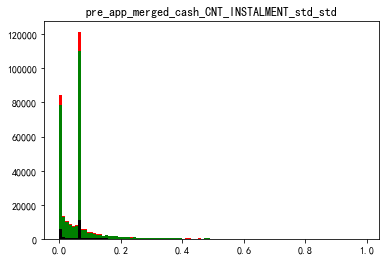

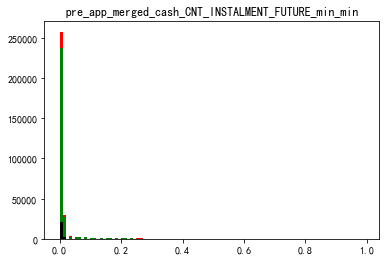

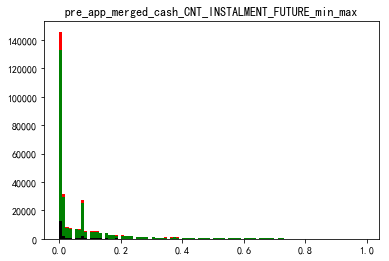

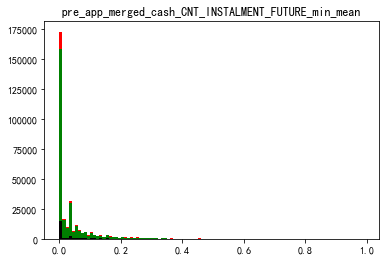

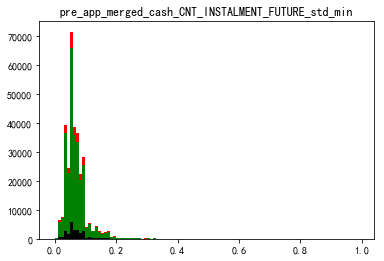

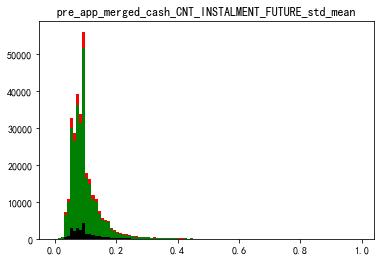

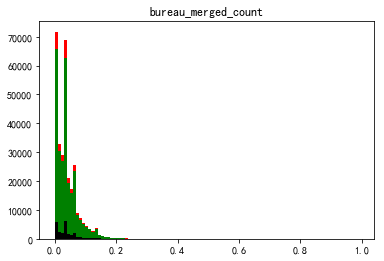

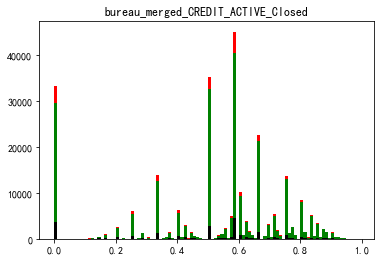

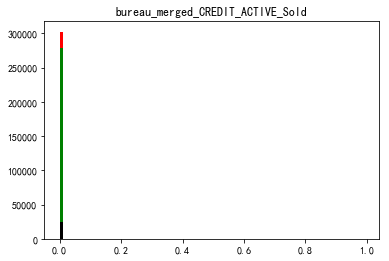

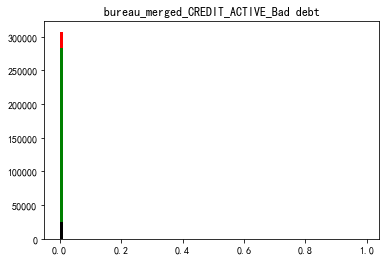

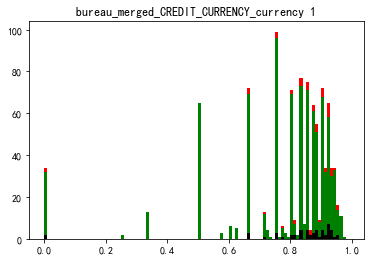

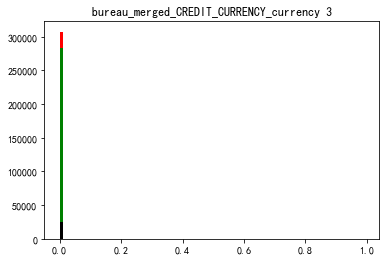

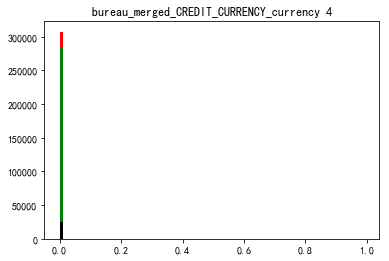

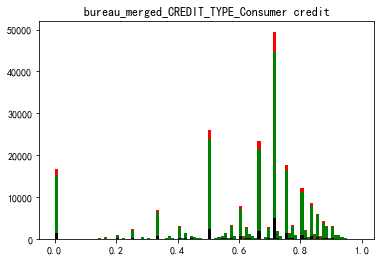

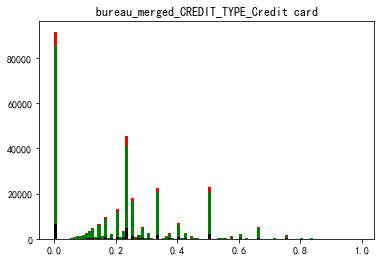

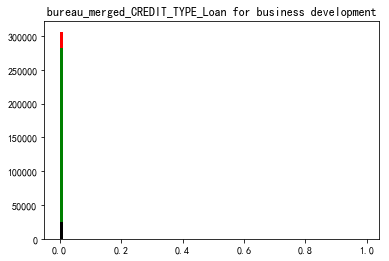

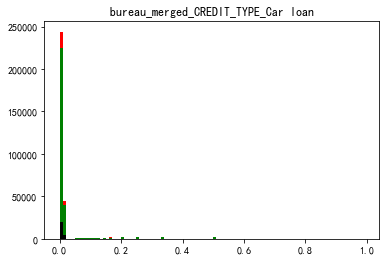

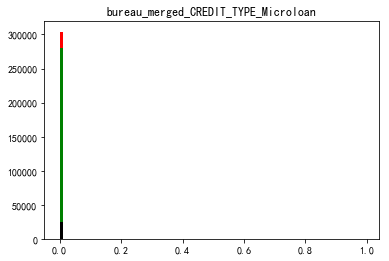

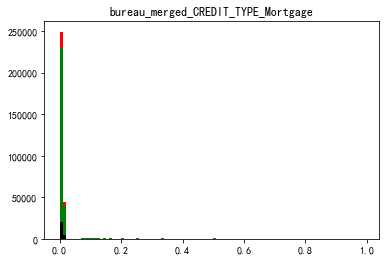

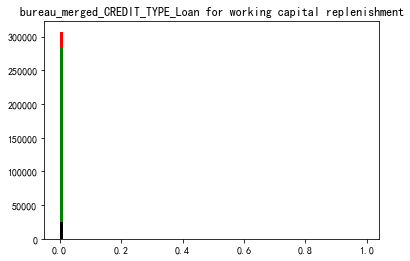

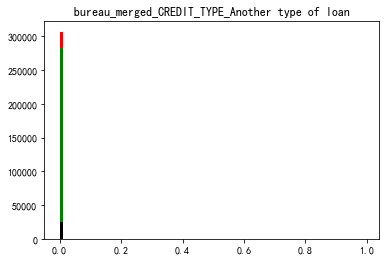

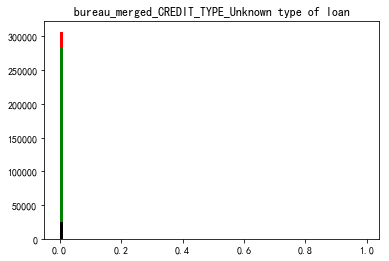

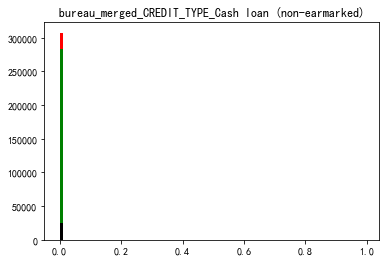

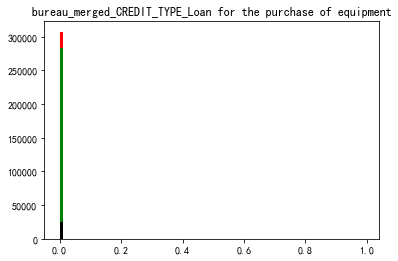

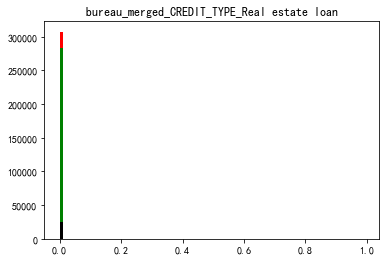

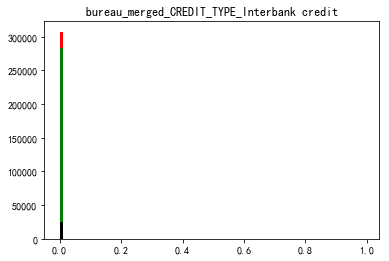

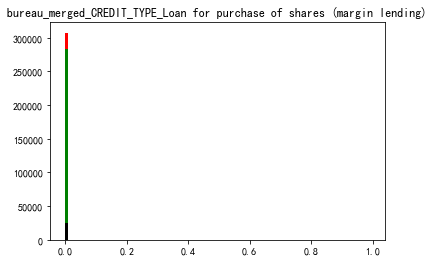

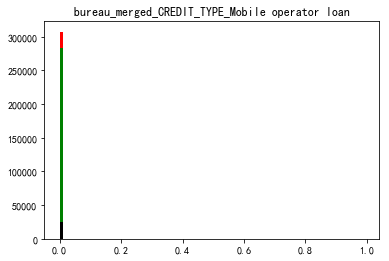

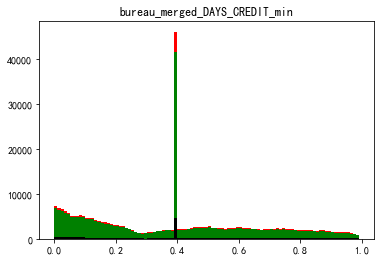

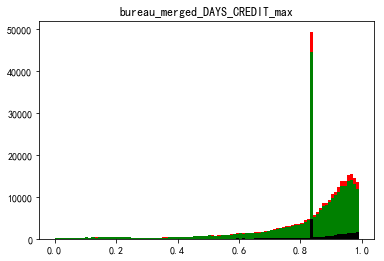

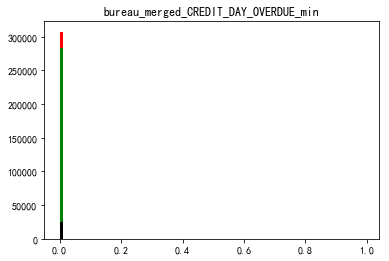

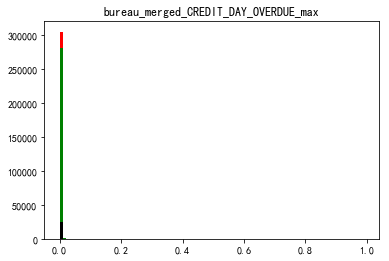

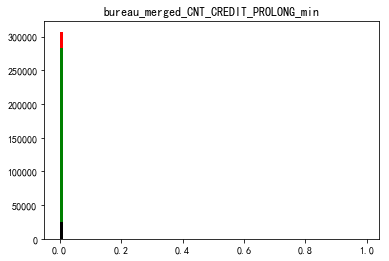

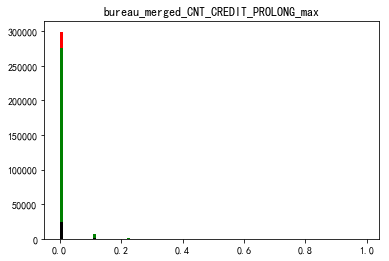

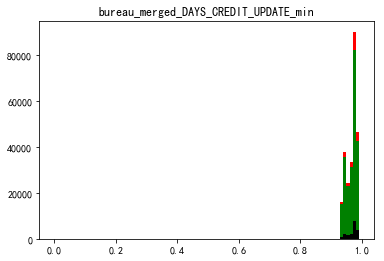

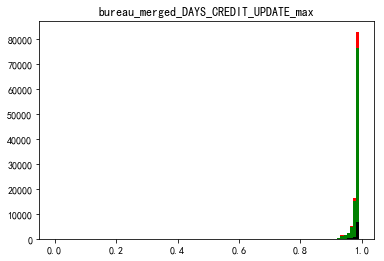

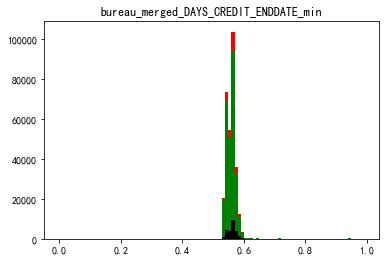

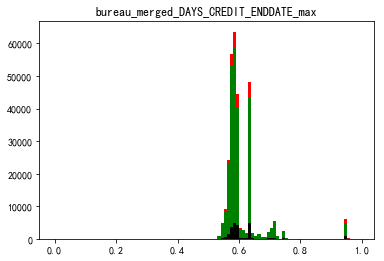

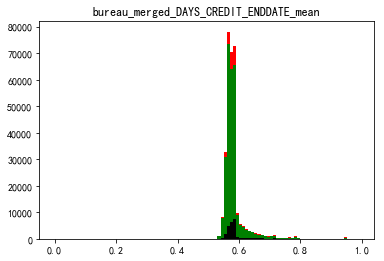

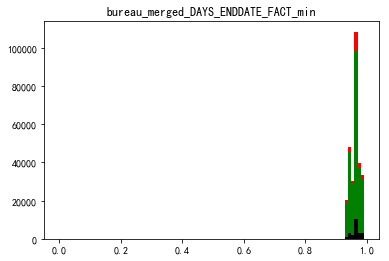

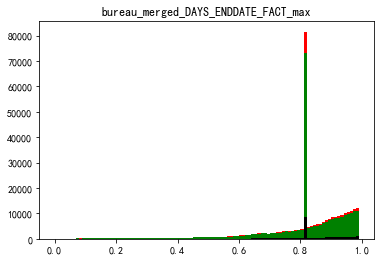

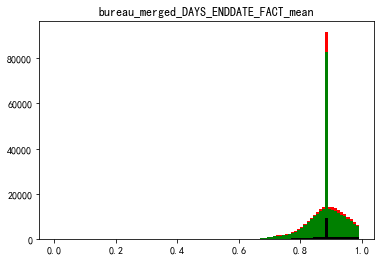

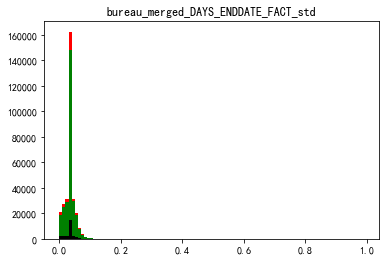

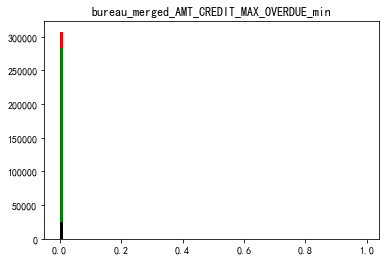

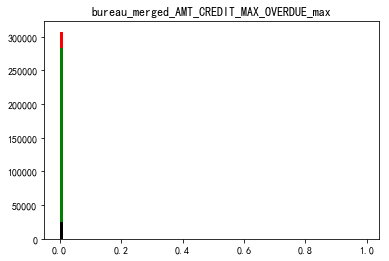

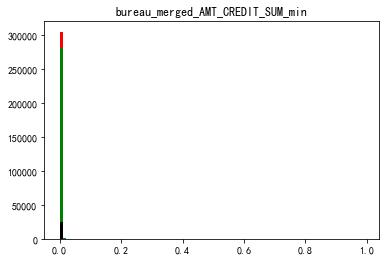

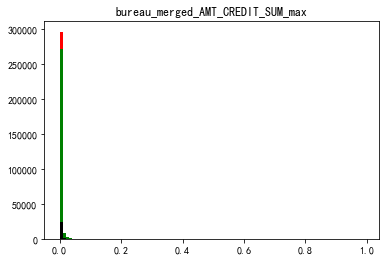

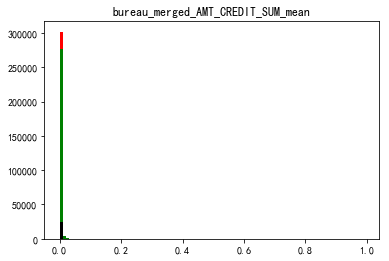

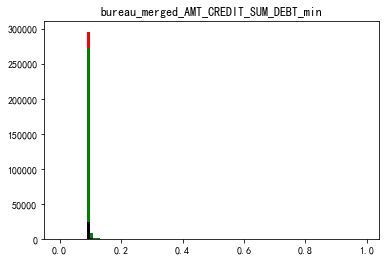

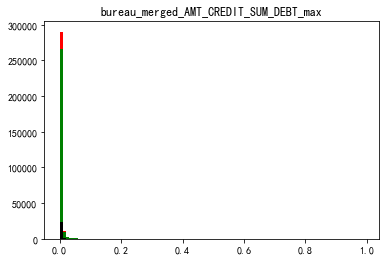

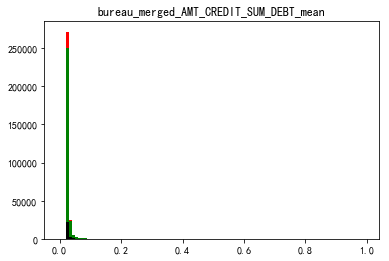

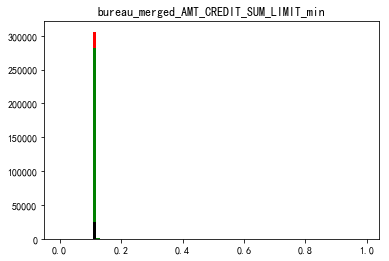

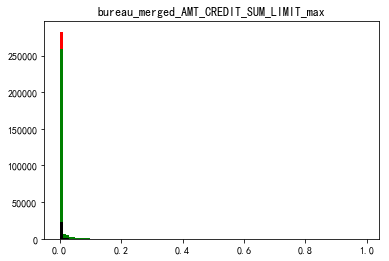

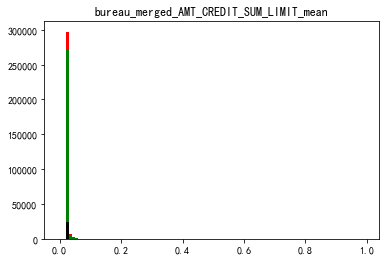

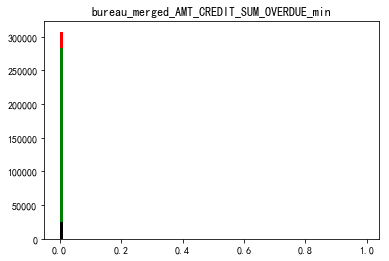

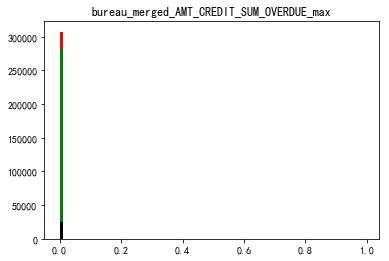

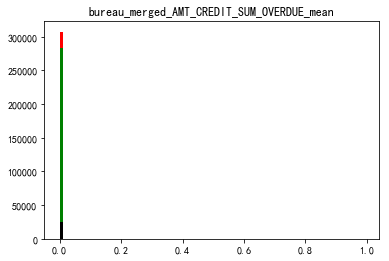

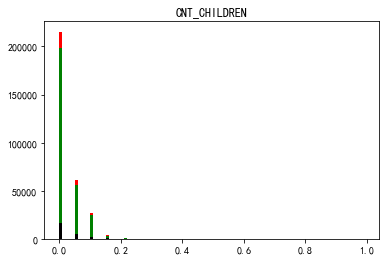

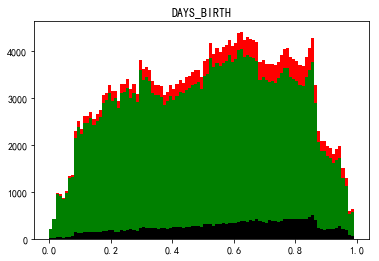

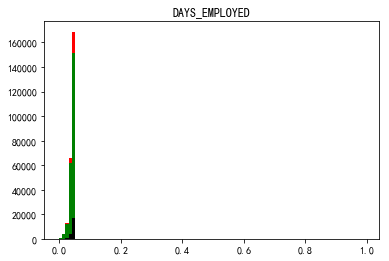

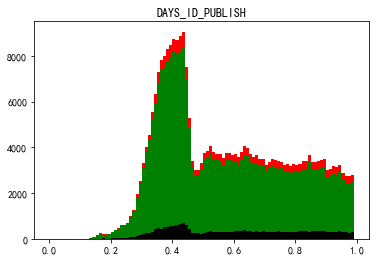

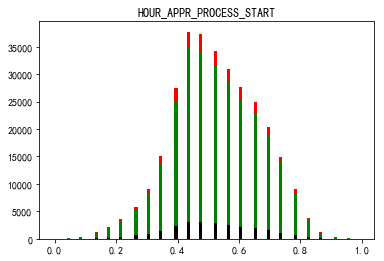

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

con_data_with_y = pd.concat([con_data, Y], axis=1)
con_data_0 = con_data_with_y[con_data_with_y['TARGET'] == 0]
con_data_1 = con_data_with_y[con_data_with_y['TARGET'] == 1]
bins = np.arange(0, 1, 0.01)
for i in range(len(con_feature)):
    plot_data = con_data.iloc[:, i]
    plt.hist(plot_data, bins=bins, color='red')
    plt.hist(con_data_0.iloc[:, i], bins=bins, color='green')
    plt.hist(con_data_1.iloc[:, i], bins=bins, color='black')
    plt.title(con_data.iloc[:, i].name)
    plt.show()

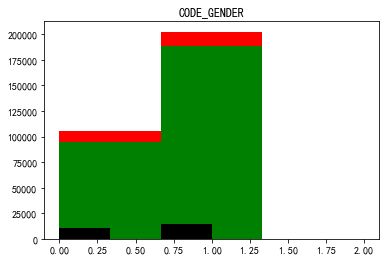

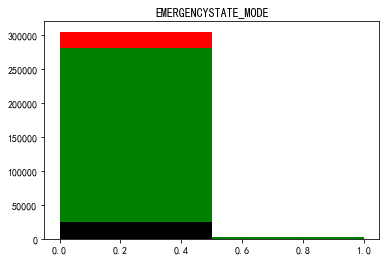

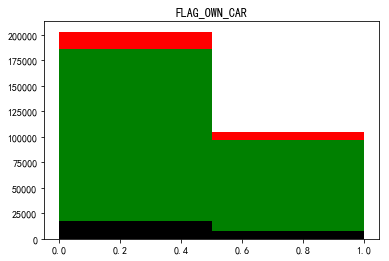

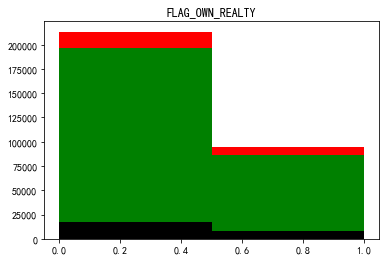

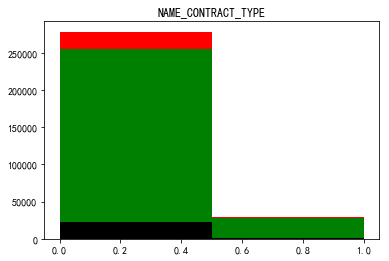

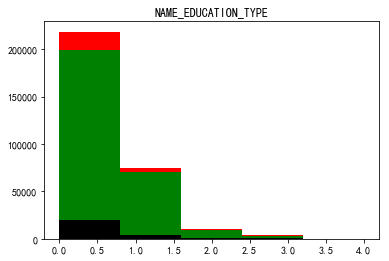

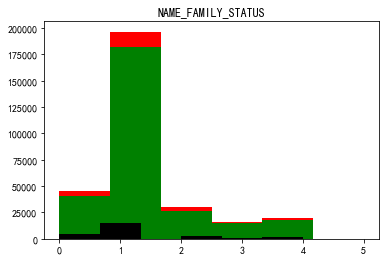

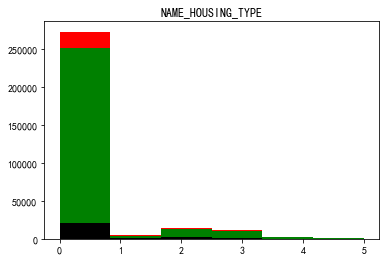

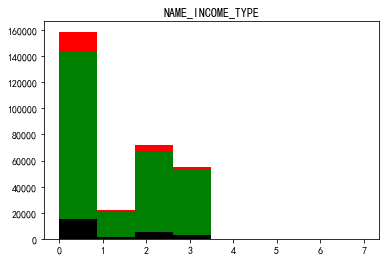

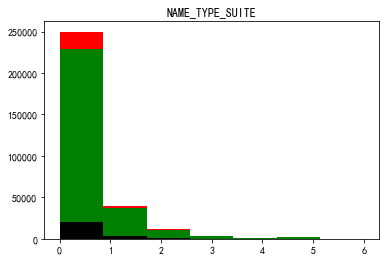

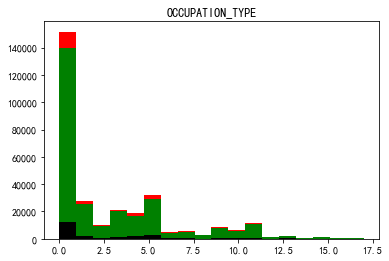

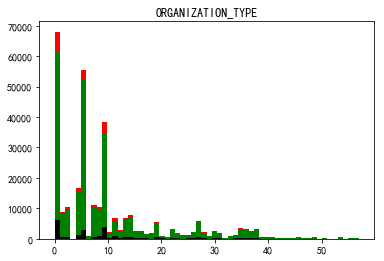

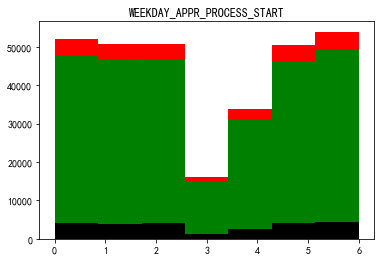

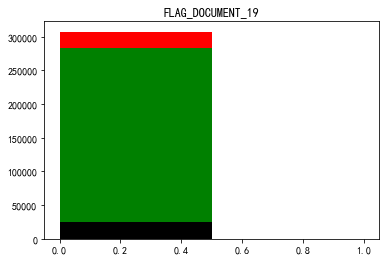

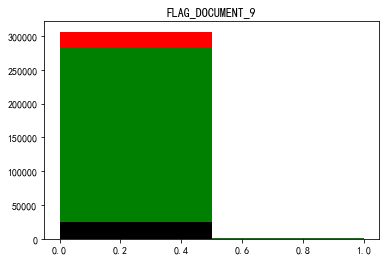

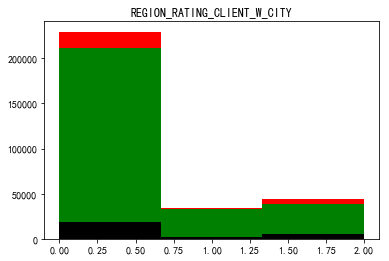

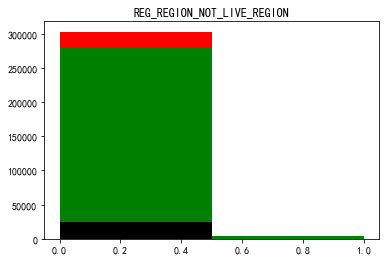

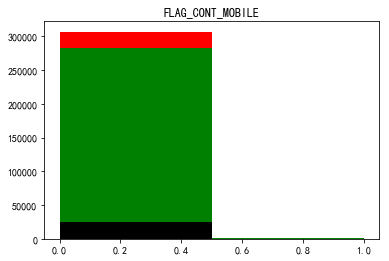

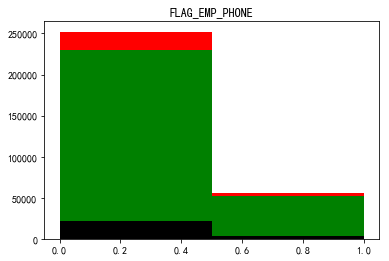

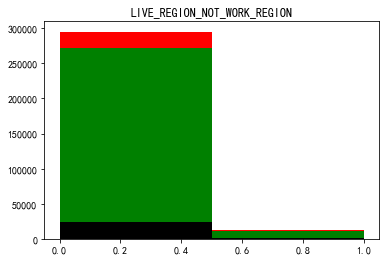

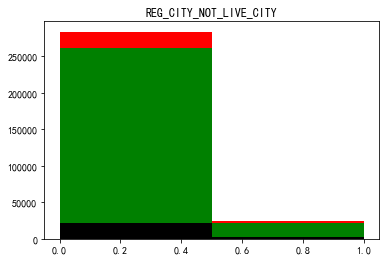

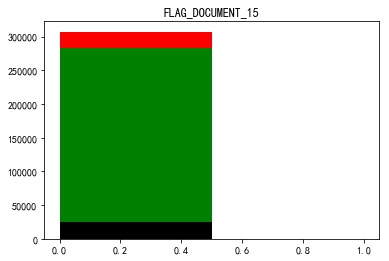

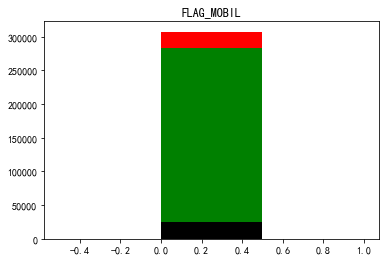

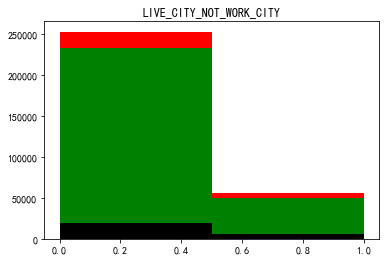

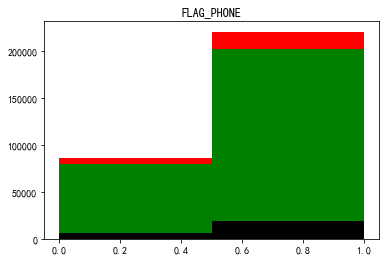

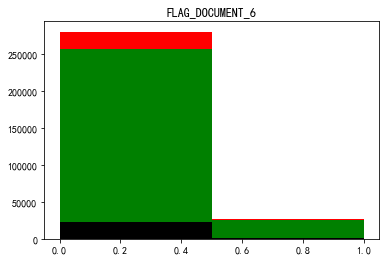

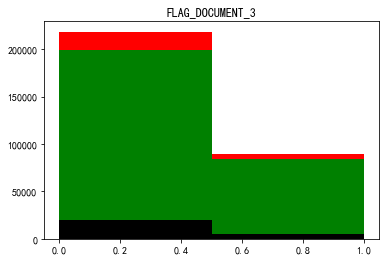

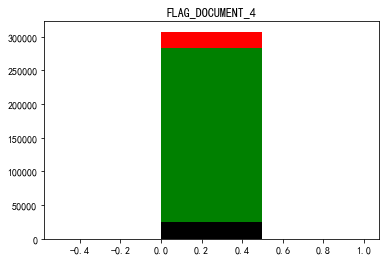

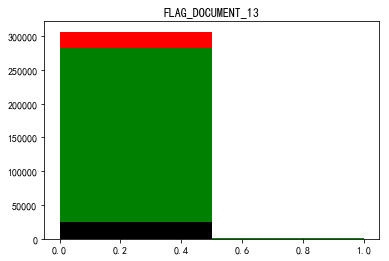

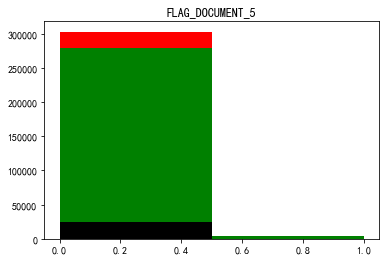

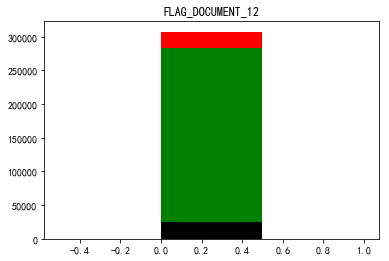

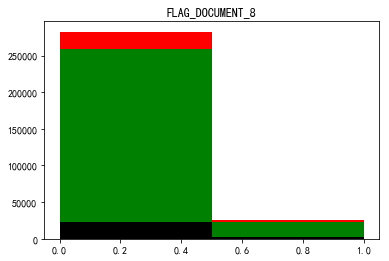

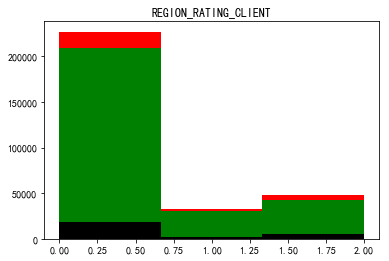

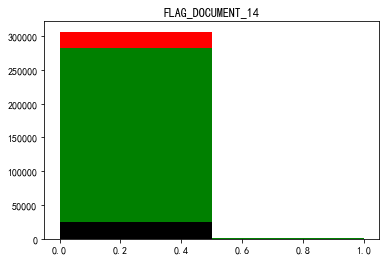

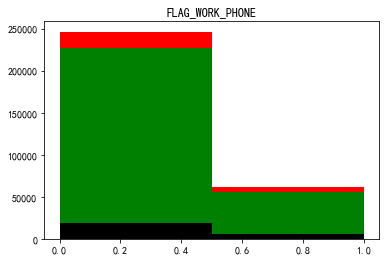

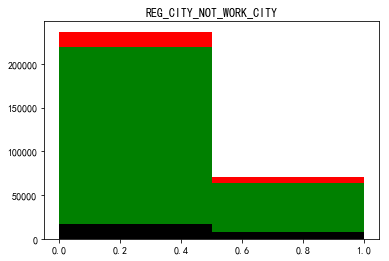

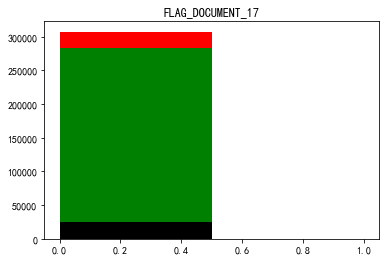

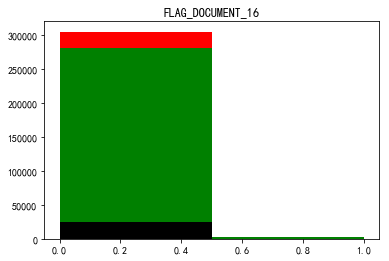

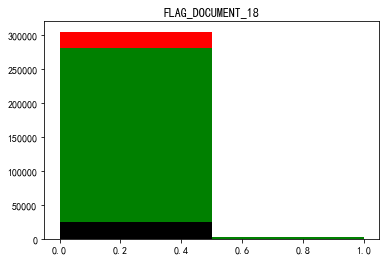

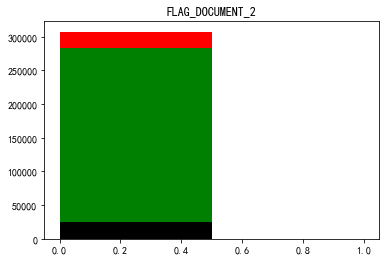

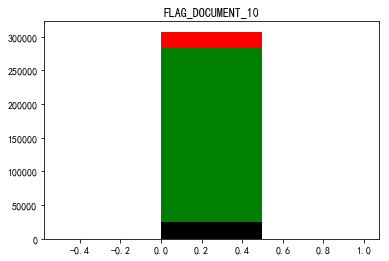

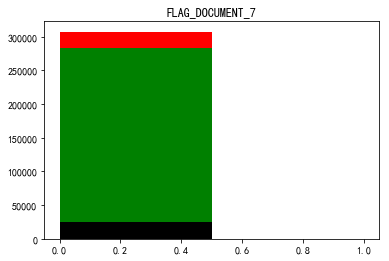

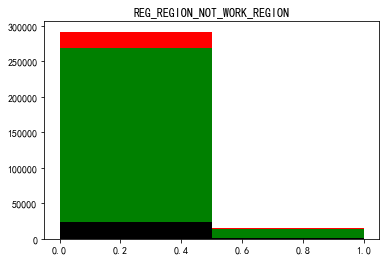

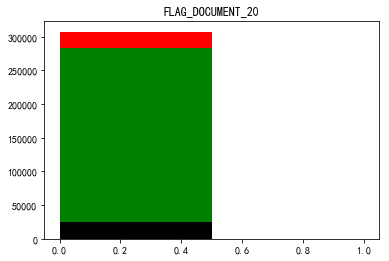

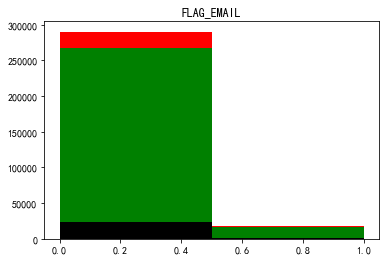

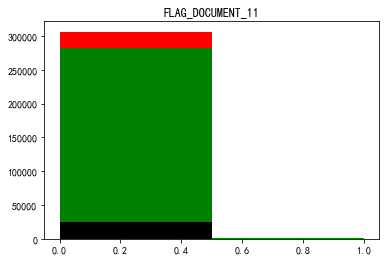

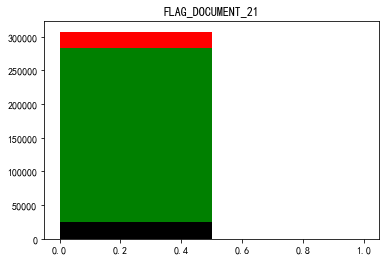

In [45]:
dis_data_with_y = pd.concat([dis_data, Y], axis=1)
dis_data_0 = dis_data_with_y[dis_data_with_y['TARGET'] == 0]
dis_data_1 = dis_data_with_y[dis_data_with_y['TARGET'] == 1]

for i in range(len(dis_feature)):
    bins = len(dis_data.iloc[:, i].unique())
    plot_data = dis_data.iloc[:, i]
    plt.hist(plot_data, bins=len(dis_data.iloc[:, i].unique()), color='red')
    plt.hist(dis_data_0.iloc[:, i], bins=bins, color='green')
    plt.hist(dis_data_1.iloc[:, i], bins=bins, color='black')
    plt.title(dis_data.iloc[:, i].name)
    plt.show()

In [46]:
# 分箱方法
class Chimerge(object):
    #X 待分箱特征，Y,目标变量，init_bins初始等距分箱个数，threshold阈值，mib_bins 最小分箱个数
    def __init__(self, X, Y, init_bins, threshold, min_bins):
        self.X = X
        self.Y = Y
        self.Y_unique = Y.unique()
        self.threshold = threshold
        self.min_bins = min_bins
        self.bins = [self.X.min()+i*((self.X.max()-self.X.min()))/init_bins for i in range(init_bins+1)]
        self.bins[0] = np.NINF
        self.bins = np.array(self.bins)
        #print(type(self.bins))
        self.x = pd.cut(self.X, self.bins)
        
    def cal_chi2(self):
        chi2_list = []
        df = pd.concat([self.X, self.Y], axis=1)
        for i in range(len(self.bins) - 2):
            chi2 = 0
            df_tmp = df[(df.iloc[:, 0] > self.bins[i]) & (df.iloc[:, 0] <= self.bins[i+2])]
            A00 = df_tmp[(df_tmp.iloc[:, 0] <= self.bins[i+1]) & (df_tmp.iloc[:, 1] == 0)].shape[0]
            A01 = df_tmp[(df_tmp.iloc[:, 0] <= self.bins[i+1]) & (df_tmp.iloc[:, 1] == 1)].shape[0]
            A10 = df_tmp[(df_tmp.iloc[:, 0] > self.bins[i+1]) & (df_tmp.iloc[:, 1] == 0)].shape[0]
            A11 = df_tmp[(df_tmp.iloc[:, 0] > self.bins[i+1]) & (df_tmp.iloc[:, 1] == 1)].shape[0]
            R0 = df_tmp[(df_tmp.iloc[:, 0] <= self.bins[i+1])].shape[0]
            R1 = df_tmp[(df_tmp.iloc[:, 0] > self.bins[i+1])].shape[0]
            C0 = df_tmp[df_tmp.iloc[:, 1] == 0].shape[0]
            C1 = df_tmp[df_tmp.iloc[:, 1] == 1].shape[0]
            N = df_tmp.shape[0]
            if N:
                E00 = R0 * C0 / N
                E01 = R0 * C1 / N
                E10 = R1 * C0 / N
                E11 = R1 * C1 / N
                if E00 and E01 and E10 and E11:
                    chi2 = (A00 - E00) ** 2 / E00 + (A01 - E01) ** 2 / E01 + (A10 - E10) ** 2 / E10 + (A11 - E11) ** 2 / E11
                else:
                    chi2 = np.inf
            else:
                chi2 = 0
            chi2_list.append(chi2)
            
        self.chi2_list = chi2_list
        
    def find_delete(self):
        self.min_chi2 = min(self.chi2_list)
        index = np.argmin(self.chi2_list)
        self.bins = np.delete(self.bins, index + 1)
        
    def main(self):
        self.cal_chi2()
        self.find_delete()
        self.x = pd.cut(self.X, self.bins)
        bins_num = len(self.x.unique())
        while bins_num > self.min_bins and self.min_chi2 < self.threshold:
            #print(bins_num, self.min_chi)
            self.cal_chi2()
            self.find_delete()
            self.x = pd.cut(self.X, self.bins)
            bins_num = len(self.x.unique())
        #输出最后分箱个数
        print(bins_num)


In [47]:
import copy

con_data_mid = copy.deepcopy(con_data)
con_data_col = con_data_mid.columns
i = 0
init_bins = 10
for col in con_data_col:
    i += 1
    print(i, '  ' , col)
    cm = Chimerge(con_data_mid[col], Y, 20, 0.455, 2)
    cm.main()
    #x = con_data_mid[col]
    #bins = [x.min()+i*((x.max() - x.min()))/ init_bins for i in range(init_bins+1)]
    #bins[0] = np.NINF
    #bins = np.array(bins)
    #x = pd.cut(x, bins)
    #con_data_mid[col] = x
    con_data_mid[col] = cm.x

1    AMT_ANNUITY
14
2    AMT_CREDIT
16
3    AMT_INCOME_TOTAL
2
4    AMT_REQ_CREDIT_BUREAU_DAY
9
5    AMT_REQ_CREDIT_BUREAU_HOUR
5
6    AMT_REQ_CREDIT_BUREAU_MON
9
7    AMT_REQ_CREDIT_BUREAU_QRT
2
8    AMT_REQ_CREDIT_BUREAU_WEEK
9
9    AMT_REQ_CREDIT_BUREAU_YEAR
15
10    CNT_FAM_MEMBERS
15
11    DAYS_LAST_PHONE_CHANGE
11
12    DAYS_REGISTRATION
14
13    DEF_30_CNT_SOCIAL_CIRCLE
3
14    DEF_60_CNT_SOCIAL_CIRCLE
4
15    EXT_SOURCE_2
18
16    EXT_SOURCE_3
17
17    FLOORSMAX_AVG
10
18    OBS_30_CNT_SOCIAL_CIRCLE
2
19    REGION_POPULATION_RELATIVE
10
20    TOTALAREA_MODE
12
21    YEARS_BEGINEXPLUATATION_AVG
6
22    pre_app_merged_count
11
23    pre_app_merged_NAME_CONTRACT_TYPE_Consumer loans
12
24    pre_app_merged_NAME_CONTRACT_TYPE_Cash loans
15
25    pre_app_merged_NAME_CONTRACT_TYPE_Revolving loans
14
26    pre_app_merged_NAME_CONTRACT_TYPE_XNA
7
27    pre_app_merged_WEEKDAY_APPR_PROCESS_START_THURSDAY
13
28    pre_app_merged_WEEKDAY_APPR_PROCESS_START_SUNDAY
12
29    pre_app_merged_WEE

13
154    pre_app_merged_HOUR_APPR_PROCESS_START_max
14
155    pre_app_merged_NFLAG_LAST_APPL_IN_DAY_min
2
156    pre_app_merged_NFLAG_LAST_APPL_IN_DAY_max
2
157    pre_app_merged_DAYS_DECISION_min
16
158    pre_app_merged_DAYS_DECISION_max
9
159    pre_app_merged_SELLERPLACE_AREA_min
2
160    pre_app_merged_SELLERPLACE_AREA_max
2
161    pre_app_merged_AMT_ANNUITY_min
11
162    pre_app_merged_AMT_ANNUITY_max
11
163    pre_app_merged_AMT_ANNUITY_mean
11
164    pre_app_merged_AMT_ANNUITY_std
12
165    pre_app_merged_AMT_APPLICATION_min
14
166    pre_app_merged_AMT_APPLICATION_max
11
167    pre_app_merged_AMT_APPLICATION_mean
14
168    pre_app_merged_AMT_DOWN_PAYMENT_min
13
169    pre_app_merged_AMT_DOWN_PAYMENT_max
13
170    pre_app_merged_AMT_DOWN_PAYMENT_mean
10
171    pre_app_merged_AMT_DOWN_PAYMENT_std
6
172    pre_app_merged_AMT_GOODS_PRICE_min
15
173    pre_app_merged_RATE_DOWN_PAYMENT_min
17
174    pre_app_merged_RATE_DOWN_PAYMENT_max
11
175    pre_app_merged_RATE_DOWN_PAYMENT_mea

5
305    bureau_merged_CREDIT_TYPE_Another type of loan
7
306    bureau_merged_CREDIT_TYPE_Unknown type of loan
6
307    bureau_merged_CREDIT_TYPE_Cash loan (non-earmarked)
11
308    bureau_merged_CREDIT_TYPE_Loan for the purchase of equipment
3
309    bureau_merged_CREDIT_TYPE_Real estate loan
7
310    bureau_merged_CREDIT_TYPE_Interbank credit
2
311    bureau_merged_CREDIT_TYPE_Loan for purchase of shares (margin lending)
4
312    bureau_merged_CREDIT_TYPE_Mobile operator loan
2
313    bureau_merged_DAYS_CREDIT_min
14
314    bureau_merged_DAYS_CREDIT_max
17
315    bureau_merged_CREDIT_DAY_OVERDUE_min
12
316    bureau_merged_CREDIT_DAY_OVERDUE_max
9
317    bureau_merged_CNT_CREDIT_PROLONG_min
7
318    bureau_merged_CNT_CREDIT_PROLONG_max
10
319    bureau_merged_DAYS_CREDIT_UPDATE_min
2
320    bureau_merged_DAYS_CREDIT_UPDATE_max
2
321    bureau_merged_DAYS_CREDIT_ENDDATE_min
8
322    bureau_merged_DAYS_CREDIT_ENDDATE_max
7
323    bureau_merged_DAYS_CREDIT_ENDDATE_mean
12
324    bureau

In [48]:
i = 0
for col in con_data_mid.columns:
    i += 1
    print(i)
    print('{0:30}'.format(col), '\n', con_data_mid[col].unique(), '\n' * 3)

1
AMT_ANNUITY                    
 [(0.05, 0.1], (0.1, 0.15], (-inf, 0.05], (0.15, 0.25], (0.25, 0.4], ..., (0.55, 0.65], (0.95, 1.0], (0.8, 0.85], (0.65, 0.7], (0.7, 0.75]]
Length: 14
Categories (14, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.25] ... (0.75, 0.8] < (0.8, 0.85] < (0.85, 0.9] < (0.95, 1.0]] 



2
AMT_CREDIT                     
 [(0.05, 0.1], (0.25, 0.35], (-inf, 0.05], (0.1, 0.15], (0.35, 0.45], ..., (0.7, 0.75], (0.95, 1.0], (0.75, 0.8], (0.85, 0.9], (0.8, 0.85]]
Length: 16
Categories (16, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.2] ... (0.75, 0.8] < (0.8, 0.85] < (0.85, 0.9] < (0.95, 1.0]] 



3
AMT_INCOME_TOTAL               
 [(-inf, 0.2], (0.95, 1.0]]
Categories (2, interval[float64]): [(-inf, 0.2] < (0.95, 1.0]] 



4
AMT_REQ_CREDIT_BUREAU_DAY      
 [(-inf, 0.1], (0.1, 0.15], (0.3, 0.35], (0.2, 0.25], (0.4, 0.45], (0.55, 0.6], (0.65, 0.7], (0.95, 1.0], (0.85, 0.9]]
Categories (9, interval[float64]): [(

pre_app_merged_NAME_CASH_LOAN_PURPOSE_Urgent needs 
 [(-inf, 0.05], (0.1, 0.15], (0.05, 0.1], (0.3, 0.35], (0.15, 0.25], ..., (0.65, 0.75], (0.4, 0.45], (0.35, 0.4], (0.5, 0.65], (0.75, 0.85]]
Length: 13
Categories (13, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.25] ... (0.5, 0.65] < (0.65, 0.75] < (0.75, 0.85] < (0.95, 1.0]] 



37
pre_app_merged_NAME_CASH_LOAN_PURPOSE_Other 
 [(-inf, 0.05], (0.45, 0.5], (0.1, 0.25], (0.25, 0.35], (0.05, 0.1], ..., (0.6, 0.65], (0.7, 0.8], (0.55, 0.6], (0.85, 0.9], (0.5, 0.55]]
Length: 13
Categories (13, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.25] < (0.25, 0.35] ... (0.65, 0.7] < (0.7, 0.8] < (0.85, 0.9] < (0.95, 1.0]] 



38
pre_app_merged_NAME_CASH_LOAN_PURPOSE_Furniture 
 [(-inf, 0.05], (0.4, 0.5], (0.05, 0.3], (0.3, 0.35], (0.95, 1.0], (0.35, 0.4], (0.6, 0.7]]
Categories (7, interval[float64]): [(-inf, 0.05] < (0.05, 0.3] < (0.3, 0.35] < (0.35, 0.4] < (0.4, 0.5] < (0.6, 0.7] < (0.95, 1.0]] 



39
pre

Categories (16, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.2] ... (0.7, 0.85] < (0.85, 0.9] < (0.9, 0.95] < (0.95, 1.0]] 



74
pre_app_merged_NAME_TYPE_SUITE_Spouse, partner 
 [(-inf, 0.05], (0.1, 0.15], (0.15, 0.25], (0.45, 0.5], (0.3, 0.4], ..., (0.65, 0.7], (0.25, 0.3], (0.55, 0.6], (0.6, 0.65], (0.5, 0.55]]
Length: 14
Categories (14, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.25] ... (0.6, 0.65] < (0.65, 0.7] < (0.7, 0.85] < (0.95, 1.0]] 



75
pre_app_merged_NAME_TYPE_SUITE_Other_B 
 [(-inf, 0.15], (0.15, 0.25], (0.25, 0.3], (0.3, 0.8], (0.95, 1.0], (0.85, 0.9]]
Categories (6, interval[float64]): [(-inf, 0.15] < (0.15, 0.25] < (0.25, 0.3] < (0.3, 0.8] < (0.85, 0.9] < (0.95, 1.0]] 



76
pre_app_merged_NAME_TYPE_SUITE_Children 
 [(-inf, 0.05], (0.15, 0.3], (0.3, 0.35], (0.5, 0.75], (0.1, 0.15], ..., (0.05, 0.1], (0.95, 1.0], (0.35, 0.4], (0.75, 0.85], (0.85, 0.9]]
Length: 11
Categories (11, interval[float64]): [(-inf, 0.0

pre_app_merged_NAME_PORTFOLIO_Cars 
 [(-inf, 0.15], (0.4, 0.5], (0.2, 0.3], (0.15, 0.2], (0.35, 0.4], (0.3, 0.35], (0.65, 0.7], (0.95, 1.0], (0.6, 0.65]]
Categories (9, interval[float64]): [(-inf, 0.15] < (0.15, 0.2] < (0.2, 0.3] < (0.3, 0.35] ... (0.4, 0.5] < (0.6, 0.65] < (0.65, 0.7] < (0.95, 1.0]] 



111
pre_app_merged_NAME_PORTFOLIO_XNA 
 [(-inf, 0.05], (0.25, 0.35], (0.15, 0.2], (0.2, 0.25], (0.1, 0.15], ..., (0.35, 0.5], (0.6, 0.8], (0.8, 0.95], (0.95, 1.0], (0.05, 0.1]]
Length: 11
Categories (11, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.2] ... (0.5, 0.6] < (0.6, 0.8] < (0.8, 0.95] < (0.95, 1.0]] 



112
pre_app_merged_NAME_PRODUCT_TYPE_XNA 
 [(0.95, 1.0], (0.65, 0.7], (0.55, 0.65], (0.3, 0.35], (0.75, 0.8], ..., (0.35, 0.45], (0.25, 0.3], (0.5, 0.55], (0.9, 0.95], (0.05, 0.15]]
Length: 17
Categories (17, interval[float64]): [(-inf, 0.05] < (0.05, 0.15] < (0.15, 0.2] < (0.2, 0.25] ... (0.8, 0.85] < (0.85, 0.9] < (0.9, 0.95] < (0.95, 1.0]] 



113


pre_app_merged_PRODUCT_COMBINATION_Cash X-Sell: low 
 [(-inf, 0.05], (0.3, 0.45], (0.2, 0.3], (0.05, 0.1], (0.1, 0.15], ..., (0.55, 0.6], (0.95, 1.0], (0.65, 0.9], (0.6, 0.65], (0.5, 0.55]]
Length: 12
Categories (12, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.2] ... (0.55, 0.6] < (0.6, 0.65] < (0.65, 0.9] < (0.95, 1.0]] 



147
pre_app_merged_PRODUCT_COMBINATION_Card X-Sell 
 [(-inf, 0.05], (0.1, 0.15], (0.15, 0.25], (0.3, 0.35], (0.45, 0.55], ..., (0.7, 0.85], (0.25, 0.3], (0.95, 1.0], (0.55, 0.6], (0.85, 0.9]]
Length: 13
Categories (13, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.25] ... (0.6, 0.7] < (0.7, 0.85] < (0.85, 0.9] < (0.95, 1.0]] 



148
pre_app_merged_PRODUCT_COMBINATION_Cash Street: low 
 [(-inf, 0.05], (0.2, 0.3], (0.95, 1.0], (0.3, 0.35], (0.05, 0.1], ..., (0.35, 0.4], (0.9, 0.95], (0.8, 0.85], (0.85, 0.9], (0.5, 0.55]]
Length: 13
Categories (13, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.2] < (0

pre_app_merged_DAYS_FIRST_DRAWING_max 
 [(0.95, 1.0], (-inf, 0.05]]
Categories (2, interval[float64]): [(-inf, 0.05] < (0.95, 1.0]] 



183
pre_app_merged_DAYS_FIRST_DRAWING_mean 
 [(0.95, 1.0], (0.6, 0.75], (0.9, 0.95], (0.75, 0.8], (0.8, 0.9], (-inf, 0.05], (0.5, 0.55], (0.3, 0.35]]
Categories (8, interval[float64]): [(-inf, 0.05] < (0.3, 0.35] < (0.5, 0.55] < (0.6, 0.75] < (0.75, 0.8] < (0.8, 0.9] < (0.9, 0.95] < (0.95, 1.0]] 



184
pre_app_merged_DAYS_FIRST_DUE_min 
 [(-inf, 0.05], (0.95, 1.0]]
Categories (2, interval[float64]): [(-inf, 0.05] < (0.95, 1.0]] 



185
pre_app_merged_DAYS_FIRST_DUE_max 
 [(-inf, 0.1], (0.95, 1.0], (0.1, 0.15]]
Categories (3, interval[float64]): [(-inf, 0.1] < (0.1, 0.15] < (0.95, 1.0]] 



186
pre_app_merged_DAYS_FIRST_DUE_mean 
 [(-inf, 0.1], (0.25, 0.3], (0.1, 0.25], (0.5, 0.55], (0.3, 0.45], (0.95, 1.0], (0.6, 0.7], (0.75, 0.8]]
Categories (8, interval[float64]): [(-inf, 0.1] < (0.1, 0.25] < (0.25, 0.3] < (0.3, 0.45] < (0.5, 0.55] < (0.6, 0.7] < (0

Categories (14, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.25] ... (0.7, 0.75] < (0.75, 0.8] < (0.8, 0.85] < (0.85, 1.0]] 



221
pre_app_merged_installments_DAYS_INSTALMENT_max_max 
 [(0.95, 1.0], (0.8, 0.85], (0.65, 0.75], (0.05, 0.4], (0.75, 0.8], (0.85, 0.9], (0.9, 0.95], (0.4, 0.6], (0.6, 0.65], (-inf, 0.05]]
Categories (10, interval[float64]): [(-inf, 0.05] < (0.05, 0.4] < (0.4, 0.6] < (0.6, 0.65] ... (0.8, 0.85] < (0.85, 0.9] < (0.9, 0.95] < (0.95, 1.0]] 



222
pre_app_merged_installments_DAYS_INSTALMENT_max_std 
 [(0.3, 0.35], (0.35, 0.4], (0.1, 0.15], (0.4, 0.5], (0.5, 0.6], ..., (0.9, 0.95], (-inf, 0.05], (0.75, 0.8], (0.8, 0.9], (0.95, 1.0]]
Length: 14
Categories (14, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.2] ... (0.75, 0.8] < (0.8, 0.9] < (0.9, 0.95] < (0.95, 1.0]] 



223
pre_app_merged_installments_AMT_INSTALMENT_min_min 
 [(-inf, 0.05], (0.05, 0.2], (0.2, 0.25], (0.5, 0.55], (0.9, 0.95], (0.25, 0.35], (0.45

pre_app_merged_cash_NAME_CONTRACT_STATUS_Demand_mean 
 [(-inf, 0.05], (0.15, 0.2], (0.05, 0.15], (0.35, 0.5], (0.85, 0.9], ..., (0.95, 1.0], (0.6, 0.65], (0.65, 0.7], (0.7, 0.75], (0.9, 0.95]]
Length: 14
Categories (14, interval[float64]): [(-inf, 0.05] < (0.05, 0.15] < (0.15, 0.2] < (0.2, 0.3] ... (0.8, 0.85] < (0.85, 0.9] < (0.9, 0.95] < (0.95, 1.0]] 



258
pre_app_merged_cash_NAME_CONTRACT_STATUS_Demand_std 
 [(-inf, 0.05], (0.05, 0.25], (0.85, 0.9], (0.75, 0.85], (0.45, 0.6], ..., (0.6, 0.65], (0.65, 0.7], (0.95, 1.0], (0.4, 0.45], (0.9, 0.95]]
Length: 13
Categories (13, interval[float64]): [(-inf, 0.05] < (0.05, 0.25] < (0.25, 0.3] < (0.3, 0.4] ... (0.75, 0.85] < (0.85, 0.9] < (0.9, 0.95] < (0.95, 1.0]] 



259
pre_app_merged_cash_NAME_CONTRACT_STATUS_Amortized debt_min 
 [(-inf, 0.05], (0.95, 1.0]]
Categories (2, interval[float64]): [(-inf, 0.05] < (0.95, 1.0]] 



260
pre_app_merged_cash_NAME_CONTRACT_STATUS_Amortized debt_max 
 [(-inf, 0.7], (0.7, 0.75], (0.95, 1.0]]
Categorie

Categories (6, interval[float64]): [(-inf, 0.05] < (0.2, 0.25] < (0.3, 0.35] < (0.45, 0.5] < (0.55, 0.8] < (0.8, 1.0]] 



296
bureau_merged_CREDIT_CURRENCY_currency 3 
 [(-inf, 0.05], (0.2, 0.35], (0.05, 0.15], (0.15, 0.2], (0.35, 0.4], (0.95, 1.0], (0.45, 0.5]]
Categories (7, interval[float64]): [(-inf, 0.05] < (0.05, 0.15] < (0.15, 0.2] < (0.2, 0.35] < (0.35, 0.4] < (0.45, 0.5] < (0.95, 1.0]] 



297
bureau_merged_CREDIT_CURRENCY_currency 4 
 [(-inf, 0.1], (0.45, 0.5], (0.1, 0.15], (0.2, 0.25], (0.25, 0.3], (0.95, 1.0]]
Categories (6, interval[float64]): [(-inf, 0.1] < (0.1, 0.15] < (0.2, 0.25] < (0.25, 0.3] < (0.45, 0.5] < (0.95, 1.0]] 



298
bureau_merged_CREDIT_TYPE_Consumer credit 
 [(0.45, 0.5], (0.95, 1.0], (0.7, 0.75], (0.8, 0.9], (0.65, 0.7], ..., (0.3, 0.35], (0.5, 0.55], (0.25, 0.3], (0.1, 0.2], (0.05, 0.1]]
Length: 16
Categories (16, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.2] < (0.2, 0.25] ... (0.75, 0.8] < (0.8, 0.9] < (0.9, 0.95] < (0.95, 1.0]] 



29

bureau_merged_AMT_CREDIT_SUM_DEBT_mean 
 [(-inf, 0.05], (0.05, 0.1], (0.15, 0.25], (0.1, 0.15], (0.4, 0.45], ..., (0.6, 0.65], (0.5, 0.55], (0.95, 1.0], (0.65, 0.7], (0.7, 0.75]]
Length: 16
Categories (16, interval[float64]): [(-inf, 0.05] < (0.05, 0.1] < (0.1, 0.15] < (0.15, 0.25] ... (0.75, 0.8] < (0.8, 0.85] < (0.85, 0.9] < (0.95, 1.0]] 



336
bureau_merged_AMT_CREDIT_SUM_LIMIT_min 
 [(0.1, 0.15], (0.15, 0.25], (-inf, 0.1], (0.25, 0.3], (0.35, 0.4], (0.3, 0.35], (0.45, 0.5], (0.5, 0.55], (0.95, 1.0]]
Categories (9, interval[float64]): [(-inf, 0.1] < (0.1, 0.15] < (0.15, 0.25] < (0.25, 0.3] ... (0.35, 0.4] < (0.45, 0.5] < (0.5, 0.55] < (0.95, 1.0]] 



337
bureau_merged_AMT_CREDIT_SUM_LIMIT_max 
 [(-inf, 0.05], (0.05, 0.5], (0.7, 0.75], (0.65, 0.7], (0.9, 0.95], (0.95, 1.0], (0.55, 0.6]]
Categories (7, interval[float64]): [(-inf, 0.05] < (0.05, 0.5] < (0.55, 0.6] < (0.65, 0.7] < (0.7, 0.75] < (0.9, 0.95] < (0.95, 1.0]] 



338
bureau_merged_AMT_CREDIT_SUM_LIMIT_mean 
 [(-inf, 0.05],

In [49]:
i = 0
for col in con_data.columns:
    i += 1
    print(i)
    con_data_mid[col] = con_data_mid[col].astype(str)
    map_dict = dict(zip(con_data_mid[col].unique(), range(len(con_data_mid[col].unique()))))
    con_data_mid[col] = con_data_mid[col].map(map_dict)
    print(col, '  ', map_dict)
    print()

1
AMT_ANNUITY    {'(0.05, 0.1]': 0, '(0.1, 0.15]': 1, '(-inf, 0.05]': 2, '(0.15, 0.25]': 3, '(0.25, 0.4]': 4, '(0.4, 0.5]': 5, '(0.5, 0.55]': 6, '(0.85, 0.9]': 7, '(0.75, 0.8]': 8, '(0.55, 0.65]': 9, '(0.95, 1.0]': 10, '(0.8, 0.85]': 11, '(0.65, 0.7]': 12, '(0.7, 0.75]': 13}

2
AMT_CREDIT    {'(0.05, 0.1]': 0, '(0.25, 0.35]': 1, '(-inf, 0.05]': 2, '(0.1, 0.15]': 3, '(0.35, 0.45]': 4, '(0.2, 0.25]': 5, '(0.15, 0.2]': 6, '(0.55, 0.65]': 7, '(0.45, 0.5]': 8, '(0.5, 0.55]': 9, '(0.65, 0.7]': 10, '(0.7, 0.75]': 11, '(0.95, 1.0]': 12, '(0.75, 0.8]': 13, '(0.85, 0.9]': 14, '(0.8, 0.85]': 15}

3
AMT_INCOME_TOTAL    {'(-inf, 0.2]': 0, '(0.95, 1.0]': 1}

4
AMT_REQ_CREDIT_BUREAU_DAY    {'(-inf, 0.1]': 0, '(0.1, 0.15]': 1, '(0.3, 0.35]': 2, '(0.2, 0.25]': 3, '(0.4, 0.45]': 4, '(0.55, 0.6]': 5, '(0.65, 0.7]': 6, '(0.95, 1.0]': 7, '(0.85, 0.9]': 8}

5
AMT_REQ_CREDIT_BUREAU_HOUR    {'(-inf, 0.2]': 0, '(0.2, 0.25]': 1, '(0.45, 0.5]': 2, '(0.7, 0.75]': 3, '(0.95, 1.0]': 4}

6
AMT_REQ_CREDIT_BUREAU_MON 

pre_app_merged_NAME_CASH_LOAN_PURPOSE_Urgent needs    {'(-inf, 0.05]': 0, '(0.1, 0.15]': 1, '(0.05, 0.1]': 2, '(0.3, 0.35]': 3, '(0.15, 0.25]': 4, '(0.45, 0.5]': 5, '(0.95, 1.0]': 6, '(0.25, 0.3]': 7, '(0.65, 0.75]': 8, '(0.4, 0.45]': 9, '(0.35, 0.4]': 10, '(0.5, 0.65]': 11, '(0.75, 0.85]': 12}

37
pre_app_merged_NAME_CASH_LOAN_PURPOSE_Other    {'(-inf, 0.05]': 0, '(0.45, 0.5]': 1, '(0.1, 0.25]': 2, '(0.25, 0.35]': 3, '(0.05, 0.1]': 4, '(0.95, 1.0]': 5, '(0.65, 0.7]': 6, '(0.35, 0.45]': 7, '(0.6, 0.65]': 8, '(0.7, 0.8]': 9, '(0.55, 0.6]': 10, '(0.85, 0.9]': 11, '(0.5, 0.55]': 12}

38
pre_app_merged_NAME_CASH_LOAN_PURPOSE_Furniture    {'(-inf, 0.05]': 0, '(0.4, 0.5]': 1, '(0.05, 0.3]': 2, '(0.3, 0.35]': 3, '(0.95, 1.0]': 4, '(0.35, 0.4]': 5, '(0.6, 0.7]': 6}

39
pre_app_merged_NAME_CASH_LOAN_PURPOSE_Repairs    {'(-inf, 0.05]': 0, '(0.95, 1.0]': 1, '(0.2, 0.35]': 2, '(0.1, 0.2]': 3, '(0.05, 0.1]': 4, '(0.45, 0.6]': 5, '(0.35, 0.4]': 6, '(0.4, 0.45]': 7, '(0.65, 0.75]': 8, '(0.85, 0.9]': 

pre_app_merged_CODE_REJECT_REASON_SYSTEM    {'(-inf, 0.05]': 0, '(0.05, 0.1]': 1, '(0.15, 0.2]': 2, '(0.1, 0.15]': 3, '(0.2, 0.25]': 4, '(0.3, 0.35]': 5, '(0.25, 0.3]': 6, '(0.4, 0.65]': 7, '(0.65, 0.7]': 8, '(0.35, 0.4]': 9, '(0.95, 1.0]': 10, '(0.7, 0.75]': 11}

72
pre_app_merged_NAME_TYPE_SUITE_Unaccompanied    {'(-inf, 0.05]': 0, '(0.3, 0.45]': 1, '(0.95, 1.0]': 2, '(0.15, 0.2]': 3, '(0.25, 0.3]': 4, '(0.45, 0.75]': 5, '(0.2, 0.25]': 6, '(0.1, 0.15]': 7, '(0.75, 0.8]': 8, '(0.05, 0.1]': 9, '(0.8, 0.9]': 10, '(0.9, 0.95]': 11}

73
pre_app_merged_NAME_TYPE_SUITE_Family    {'(-inf, 0.05]': 0, '(0.65, 0.7]': 1, '(0.1, 0.15]': 2, '(0.3, 0.45]': 3, '(0.25, 0.3]': 4, '(0.95, 1.0]': 5, '(0.2, 0.25]': 6, '(0.7, 0.85]': 7, '(0.45, 0.5]': 8, '(0.15, 0.2]': 9, '(0.05, 0.1]': 10, '(0.55, 0.6]': 11, '(0.5, 0.55]': 12, '(0.6, 0.65]': 13, '(0.85, 0.9]': 14, '(0.9, 0.95]': 15}

74
pre_app_merged_NAME_TYPE_SUITE_Spouse, partner    {'(-inf, 0.05]': 0, '(0.1, 0.15]': 1, '(0.15, 0.25]': 2, '(0.45, 0.5]

pre_app_merged_NAME_GOODS_CATEGORY_Medicine    {'(-inf, 0.1]': 0, '(0.95, 1.0]': 1, '(0.15, 0.2]': 2, '(0.2, 0.35]': 3, '(0.1, 0.15]': 4, '(0.35, 0.5]': 5, '(0.65, 0.7]': 6, '(0.8, 0.85]': 7, '(0.55, 0.6]': 8, '(0.7, 0.75]': 9, '(0.75, 0.8]': 10}

105
pre_app_merged_NAME_GOODS_CATEGORY_Fitness    {'(-inf, 0.1]': 0, '(0.45, 0.5]': 1, '(0.95, 1.0]': 2, '(0.1, 0.2]': 3, '(0.2, 0.25]': 4, '(0.25, 0.4]': 5, '(0.55, 0.6]': 6, '(0.65, 0.7]': 7}

106
pre_app_merged_NAME_GOODS_CATEGORY_Additional Service    {'(-inf, 0.2]': 0, '(0.3, 0.35]': 1, '(0.2, 0.25]': 2, '(0.45, 0.5]': 3, '(0.95, 1.0]': 4, '(0.35, 0.4]': 5, '(0.55, 0.6]': 6}

107
pre_app_merged_NAME_GOODS_CATEGORY_Insurance    {'(-inf, 0.1]': 0, '(0.15, 0.35]': 1, '(0.95, 1.0]': 2, '(0.1, 0.15]': 3, '(0.45, 0.5]': 4}

108
pre_app_merged_NAME_GOODS_CATEGORY_Animals    {'(-inf, 0.05]': 0, '(0.95, 1.0]': 1}

109
pre_app_merged_NAME_PORTFOLIO_Cash    {'(-inf, 0.05]': 0, '(0.25, 0.35]': 1, '(0.65, 0.7]': 2, '(0.15, 0.2]': 3, '(0.2, 0.25]': 4,

pre_app_merged_PRODUCT_COMBINATION_POS industry with interest    {'(-inf, 0.05]': 0, '(0.25, 0.45]': 1, '(0.05, 0.25]': 2, '(0.95, 1.0]': 3, '(0.45, 0.5]': 4, '(0.55, 0.6]': 5, '(0.65, 0.7]': 6, '(0.7, 0.8]': 7, '(0.8, 0.9]': 8, '(0.6, 0.65]': 9, '(0.5, 0.55]': 10, '(0.9, 0.95]': 11}

137
pre_app_merged_PRODUCT_COMBINATION_POS household with interest    {'(-inf, 0.05]': 0, '(0.25, 0.35]': 1, '(0.1, 0.15]': 2, '(0.15, 0.2]': 3, '(0.35, 0.4]': 4, '(0.65, 0.85]': 5, '(0.2, 0.25]': 6, '(0.45, 0.55]': 7, '(0.95, 1.0]': 8, '(0.05, 0.1]': 9, '(0.4, 0.45]': 10, '(0.55, 0.6]': 11, '(0.6, 0.65]': 12, '(0.85, 0.9]': 13, '(0.9, 0.95]': 14}

138
pre_app_merged_PRODUCT_COMBINATION_POS household without interest    {'(-inf, 0.05]': 0, '(0.1, 0.15]': 1, '(0.45, 0.6]': 2, '(0.15, 0.25]': 3, '(0.05, 0.1]': 4, '(0.3, 0.35]': 5, '(0.95, 1.0]': 6, '(0.25, 0.3]': 7, '(0.65, 0.75]': 8, '(0.35, 0.45]': 9, '(0.75, 0.9]': 10, '(0.6, 0.65]': 11}

139
pre_app_merged_PRODUCT_COMBINATION_POS mobile with interest   

pre_app_merged_AMT_DOWN_PAYMENT_max    {'(-inf, 0.05]': 0, '(0.1, 0.3]': 1, '(0.05, 0.1]': 2, '(0.35, 0.4]': 3, '(0.4, 0.45]': 4, '(0.3, 0.35]': 5, '(0.7, 0.75]': 6, '(0.65, 0.7]': 7, '(0.95, 1.0]': 8, '(0.5, 0.6]': 9, '(0.6, 0.65]': 10, '(0.45, 0.5]': 11, '(0.8, 0.85]': 12}

170
pre_app_merged_AMT_DOWN_PAYMENT_mean    {'(-inf, 0.05]': 0, '(0.05, 0.25]': 1, '(0.25, 0.3]': 2, '(0.35, 0.4]': 3, '(0.4, 0.45]': 4, '(0.45, 0.6]': 5, '(0.3, 0.35]': 6, '(0.95, 1.0]': 7, '(0.75, 0.8]': 8, '(0.85, 0.9]': 9}

171
pre_app_merged_AMT_DOWN_PAYMENT_std    {'(-inf, 0.1]': 0, '(0.15, 0.45]': 1, '(0.1, 0.15]': 2, '(0.7, 0.75]': 3, '(0.95, 1.0]': 4, '(0.45, 0.55]': 5}

172
pre_app_merged_AMT_GOODS_PRICE_min    {'(-inf, 0.05]': 0, '(0.05, 0.1]': 1, '(0.15, 0.2]': 2, '(0.25, 0.3]': 3, '(0.2, 0.25]': 4, '(0.1, 0.15]': 5, '(0.3, 0.35]': 6, '(0.35, 0.45]': 7, '(0.55, 0.6]': 8, '(0.75, 0.8]': 9, '(0.45, 0.5]': 10, '(0.7, 0.75]': 11, '(0.65, 0.7]': 12, '(0.95, 1.0]': 13, '(0.5, 0.55]': 14}

173
pre_app_merged_

pre_app_merged_installments_NUM_INSTALMENT_NUMBER_max_std    {'(0.05, 0.1]': 0, '(-inf, 0.05]': 1, '(0.2, 0.35]': 2, '(0.1, 0.15]': 3, '(0.15, 0.2]': 4, '(0.35, 0.45]': 5, '(0.45, 0.5]': 6, '(0.55, 0.65]': 7, '(0.5, 0.55]': 8, '(0.65, 0.7]': 9, '(0.7, 0.8]': 10, '(0.8, 0.9]': 11, '(0.9, 0.95]': 12, '(0.95, 1.0]': 13}

208
pre_app_merged_installments_NUM_INSTALMENT_VERSION_min_max    {'(-inf, 0.15]': 0, '(0.15, 0.25]': 1, '(0.35, 0.4]': 2, '(0.5, 0.55]': 3, '(0.95, 1.0]': 4}

209
pre_app_merged_installments_NUM_INSTALMENT_VERSION_min_mean    {'(-inf, 0.3]': 0, '(0.95, 1.0]': 1}

210
pre_app_merged_installments_NUM_INSTALMENT_VERSION_min_std    {'(-inf, 0.05]': 0, '(0.05, 0.15]': 1, '(0.15, 0.2]': 2, '(0.7, 0.75]': 3, '(0.95, 1.0]': 4, '(0.2, 0.3]': 5}

211
pre_app_merged_installments_NUM_INSTALMENT_VERSION_max_min    {'(-inf, 0.05]': 0, '(0.05, 0.2]': 1, '(0.25, 0.3]': 2, '(0.2, 0.25]': 3, '(0.35, 0.5]': 4, '(0.3, 0.35]': 5, '(0.5, 0.8]': 6, '(0.95, 1.0]': 7, '(0.85, 0.9]': 8}

212
pre_

pre_app_merged_cash_NAME_CONTRACT_STATUS_Completed_std    {'(0.05, 0.1]': 0, '(0.1, 0.15]': 1, '(0.2, 0.25]': 2, '(-inf, 0.05]': 3, '(0.15, 0.2]': 4, '(0.4, 0.5]': 5, '(0.25, 0.3]': 6, '(0.3, 0.35]': 7, '(0.35, 0.4]': 8, '(0.7, 0.75]': 9, '(0.75, 0.95]': 10, '(0.5, 0.65]': 11, '(0.65, 0.7]': 12, '(0.95, 1.0]': 13}

242
pre_app_merged_cash_NAME_CONTRACT_STATUS_Active_min    {'(0.95, 1.0]': 0, '(0.85, 0.95]': 1, '(0.7, 0.75]': 2, '(0.65, 0.7]': 3, '(0.8, 0.85]': 4, '(0.75, 0.8]': 5, '(0.45, 0.5]': 6, '(0.35, 0.4]': 7, '(-inf, 0.1]': 8, '(0.1, 0.15]': 9, '(0.15, 0.35]': 10, '(0.5, 0.6]': 11, '(0.6, 0.65]': 12, '(0.4, 0.45]': 13}

243
pre_app_merged_cash_NAME_CONTRACT_STATUS_Active_max    {'(0.95, 1.0]': 0, '(0.65, 0.8]': 1, '(0.9, 0.95]': 2, '(0.85, 0.9]': 3, '(0.8, 0.85]': 4, '(0.2, 0.45]': 5, '(0.45, 0.5]': 6, '(0.5, 0.6]': 7, '(0.6, 0.65]': 8, '(-inf, 0.05]': 9, '(0.15, 0.2]': 10, '(0.05, 0.1]': 11, '(0.1, 0.15]': 12}

244
pre_app_merged_cash_NAME_CONTRACT_STATUS_Active_mean    {'(0.95

pre_app_merged_cash_CNT_INSTALMENT_max_max    {'(0.2, 0.3]': 0, '(0.1, 0.15]': 1, '(-inf, 0.05]': 2, '(0.55, 0.6]': 3, '(0.3, 0.35]': 4, '(0.05, 0.1]': 5, '(0.4, 0.45]': 6, '(0.45, 0.55]': 7, '(0.7, 0.8]': 8, '(0.6, 0.7]': 9, '(0.15, 0.2]': 10, '(0.85, 0.9]': 11, '(0.35, 0.4]': 12, '(0.95, 1.0]': 13, '(0.9, 0.95]': 14}

280
pre_app_merged_cash_CNT_INSTALMENT_max_mean    {'(0.3, 0.35]': 0, '(0.1, 0.15]': 1, '(-inf, 0.05]': 2, '(0.15, 0.3]': 3, '(0.05, 0.1]': 4, '(0.4, 0.65]': 5, '(0.35, 0.4]': 6, '(0.65, 0.75]': 7, '(0.8, 0.85]': 8, '(0.95, 1.0]': 9, '(0.75, 0.8]': 10, '(0.9, 0.95]': 11}

281
pre_app_merged_cash_CNT_INSTALMENT_max_std    {'(0.15, 0.2]': 0, '(0.05, 0.15]': 1, '(0.4, 0.45]': 2, '(0.2, 0.25]': 3, '(0.25, 0.35]': 4, '(-inf, 0.05]': 5, '(0.45, 0.55]': 6, '(0.55, 0.65]': 7, '(0.35, 0.4]': 8, '(0.75, 0.85]': 9, '(0.65, 0.7]': 10, '(0.7, 0.75]': 11, '(0.85, 0.95]': 12, '(0.95, 1.0]': 13}

282
pre_app_merged_cash_CNT_INSTALMENT_std_min    {'(-inf, 0.05]': 0, '(0.2, 0.35]': 1, '(

bureau_merged_CREDIT_DAY_OVERDUE_min    {'(-inf, 0.05]': 0, '(0.05, 0.2]': 1, '(0.7, 0.75]': 2, '(0.9, 1.0]': 3, '(0.5, 0.55]': 4, '(0.3, 0.35]': 5, '(0.75, 0.8]': 6, '(0.55, 0.6]': 7, '(0.25, 0.3]': 8, '(0.6, 0.65]': 9, '(0.2, 0.25]': 10, '(0.35, 0.4]': 11}

316
bureau_merged_CREDIT_DAY_OVERDUE_max    {'(-inf, 0.05]': 0, '(0.45, 0.85]': 1, '(0.05, 0.1]': 2, '(0.2, 0.3]': 3, '(0.15, 0.2]': 4, '(0.3, 0.45]': 5, '(0.85, 0.95]': 6, '(0.1, 0.15]': 7, '(0.95, 1.0]': 8}

317
bureau_merged_CNT_CREDIT_PROLONG_min    {'(-inf, 0.15]': 0, '(0.15, 0.2]': 1, '(0.3, 0.35]': 2, '(0.45, 0.5]': 3, '(0.65, 0.7]': 4, '(0.8, 0.85]': 5, '(0.95, 1.0]': 6}

318
bureau_merged_CNT_CREDIT_PROLONG_max    {'(-inf, 0.1]': 0, '(0.1, 0.15]': 1, '(0.2, 0.25]': 2, '(0.3, 0.35]': 3, '(0.55, 0.6]': 4, '(0.4, 0.45]': 5, '(0.85, 0.9]': 6, '(0.95, 1.0]': 7, '(0.75, 0.8]': 8, '(0.65, 0.7]': 9}

319
bureau_merged_DAYS_CREDIT_UPDATE_min    {'(0.9, 1.0]': 0, '(-inf, 0.05]': 1}

320
bureau_merged_DAYS_CREDIT_UPDATE_max    {'(0.

In [50]:
# 计算各特征的iv值
import math
#col_list为列名列表
col_list = []
#iv_list为iv值组成的列表
iv_list = []
i = 0
#Y为目标变量
num_0 = Y[Y == 0].shape[0]
num_1 = Y[Y == 1].shape[0]
#con_data_mid 的连续数据离散化后的数据， dis_data为离散数据
#X_mid为由所有特征组成的数据
X_mid = pd.concat([con_data_mid, dis_data], axis = 1)
for col in X_mid.columns:
    df = pd.concat([X_mid[col], Y], axis=1)
    col_list.append(col)
    iv = 0
    for val in X_mid[col].unique():
        df_mid = df[df.iloc[:, 0] == val]
        ra_0 = df_mid[df_mid.iloc[:, 1] == 0].shape[0] / num_0 
        ra_1 = df_mid[df_mid.iloc[:, 1] == 1].shape[0] / num_1
        if ra_0 > 0  and ra_1 > 0:
            iv += (ra_1 - ra_0) * math.log(ra_1 / ra_0)
        else:
            iv += 0

    iv_list.append(iv)

iv_list

[0.02571015530047493,
 0.046652825273901494,
 1.6226700969634332e-09,
 0.0002716606051883385,
 2.0570893147576545e-05,
 0.003746830552175601,
 1.2513885211240205e-11,
 0.00013060635593157657,
 0.012936266508049491,
 0.005889271967014431,
 0.04673258276006592,
 0.02767520426471193,
 0.005194228988616021,
 0.004204234738101252,
 0.3224072280502462,
 0.33009030089161395,
 0.03692784294089369,
 1.2513885211240205e-11,
 0.03425640053722995,
 0.02837944969329173,
 0.00017506122563189938,
 0.007447282911321181,
 0.02347032251502213,
 0.006754799331911118,
 0.0214581804258258,
 0.0016898983205092001,
 0.004173249712700927,
 0.006304387582193782,
 0.003776713788734615,
 0.0031118768101514893,
 0.0063964587813859965,
 0.004528154580423154,
 0.004884642709556062,
 0.0016573266931537154,
 0.00019625667652693526,
 0.009476330582393073,
 0.008420216219515182,
 0.0011725841671681538,
 0.014022642304867487,
 0.0007700635684524278,
 0.0009578928579829935,
 0.0007514864753337904,
 0.00244379885894952,
 

In [51]:
#将列名和iv转化为数据框格式
df_iv = pd.DataFrame({'col':col_list, 'iv':iv_list})
df_iv = df_iv.sort_values(by = 'iv')
df_iv

,col,iv
368,FLAG_MOBIL,1.251389e-11
311,bureau_merged_CREDIT_TYPE_Mobile operator loan,1.251389e-11
319,bureau_merged_DAYS_CREDIT_UPDATE_max,1.251389e-11
309,bureau_merged_CREDIT_TYPE_Interbank credit,1.251389e-11
6,AMT_REQ_CREDIT_BUREAU_QRT,1.251389e-11
107,pre_app_merged_NAME_GOODS_CATEGORY_Animals,1.251389e-11
323,bureau_merged_DAYS_ENDDATE_FACT_min,1.251389e-11
17,OBS_30_CNT_SOCIAL_CIRCLE,1.251389e-11
269,pre_app_merged_cash_SK_DPD_DEF_min_max,1.251389e-11
265,pre_app_merged_cash_SK_DPD_min_max,5.005563e-11


In [52]:
df_iv.to_csv('../Data/df_iv.csv', index = False, encoding = 'utf-8_sig')

In [53]:
#选择iv值高于0.02的特征，并查看个数
sel_feature = df_iv[df_iv['iv'] > 0.02]['col'].values
len(sel_feature)

65

In [54]:
#统计iv值为正无穷的特征个数
df_tmp = df_iv[df_iv['iv'] == np.inf]
df_tmp['iv'].shape[0]

0

In [55]:
df_iv_mid = df_iv[df_iv['iv'] > 0.02]
df_iv_mid

,col,iv
191,pre_app_merged_DAYS_LAST_DUE_mean,0.021019
24,pre_app_merged_NAME_CONTRACT_TYPE_Revolving loans,0.021458
132,pre_app_merged_NAME_YIELD_GROUP_low_action,0.021515
133,pre_app_merged_NAME_YIELD_GROUP_high,0.021528
178,pre_app_merged_CNT_PAYMENT_mean,0.021666
352,NAME_FAMILY_STATUS,0.021698
141,pre_app_merged_PRODUCT_COMBINATION_Card Street,0.022218
366,REG_CITY_NOT_LIVE_CITY,0.022299
280,pre_app_merged_cash_CNT_INSTALMENT_max_std,0.022308
66,pre_app_merged_CODE_REJECT_REASON_LIMIT,0.023024


In [56]:
con_feature = list(set(sel_feature).intersection(set(con_feature)))
dis_feature = list(set(sel_feature).intersection(set(dis_feature)))

In [57]:
print(con_feature, len(con_feature))
print()
print(dis_feature, len(dis_feature))

['pre_app_merged_NAME_PAYMENT_TYPE_Cash through the bank', 'bureau_merged_DAYS_ENDDATE_FACT_max', 'pre_app_merged_NAME_CONTRACT_STATUS_Approved', 'bureau_merged_DAYS_ENDDATE_FACT_mean', 'pre_app_merged_CODE_REJECT_REASON_SCOFR', 'AMT_ANNUITY', 'pre_app_merged_DAYS_LAST_DUE_1ST_VERSION_std', 'pre_app_merged_installments_DAYS_INSTALMENT_min_std', 'TOTALAREA_MODE', 'EXT_SOURCE_3', 'pre_app_merged_DAYS_LAST_DUE_mean', 'DAYS_ID_PUBLISH', 'pre_app_merged_PRODUCT_COMBINATION_Cash X-Sell: low', 'pre_app_merged_PRODUCT_COMBINATION_POS industry with interest', 'EXT_SOURCE_2', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'pre_app_merged_NAME_CLIENT_TYPE_New', 'pre_app_merged_NAME_CONTRACT_TYPE_Consumer loans', 'pre_app_merged_CNT_PAYMENT_min', 'pre_app_merged_PRODUCT_COMBINATION_Card Street', 'pre_app_merged_DAYS_FIRST_DRAWING_min', 'pre_app_merged_NAME_CONTRACT_TYPE_Revolving loans', 'pre_app_merged_NAME_YIELD_GROUP_low_normal', 'DAYS_REGISTRATION', 'pre_app_merged_CODE_REJECT_REASON_LIMIT', 'bur

In [58]:
con_data = con_data[con_feature]
dis_data = dis_data[dis_feature]
X = pd.concat([con_data, dis_data], axis=1)
result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_iv_selected.csv', encoding='utf-8_sig', index=False)

In [59]:
con_data_mid = con_data_mid[con_feature]
dis_data = dis_data[dis_feature]
X_mid = pd.concat([con_data_mid, dis_data], axis=1)
result = pd.concat([X_mid, Y], axis=1)
result.to_csv('../Data/result_iv_selected_dis.csv', encoding='utf-8_sig', index=False)

import pandas as pd 

data = pd.read_csv('../Data/result_1_merged.csv')
data.shape

X = data.drop(columns=['TARGET'])
Y = data.TARGET

tmp = X.dtypes.to_frame().reset_index()
tmp.columns = ['col_name', 'type']
con_feature = tmp[tmp['type'] == 'float64']['col_name'].values
dis_feature = tmp[tmp['type'] == 'int64']['col_name'].values

con_data = X[con_feature]
dis_data = X[dis_feature]

con_same_list = []
for col in con_feature:
    con_same_list.append(con_data[col].std())

con_std_df = pd.DataFrame({"feature":con_feature,"same_rate":con_same_list})
con_std_df = con_std_df.sort_values(['same_rate'])
con_std_df
#连续型数据归一化后的标准差

import matplotlib.pyplot as plt
%matplotlib inline
#连续数据标准差直方图
plt.hist(con_same_list, bins=20)
plt.show()

con_std_df[con_std_df['same_rate'] > 0.01].shape[0]

tmp_list = con_std_df[con_std_df['same_rate'] > 0.01]['feature'].values
print(len(tmp_list))
print(tmp_list)
con_data = con_data[tmp_list]
con_feature = con_data.columns
X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_3_merged.csv', encoding='utf-8_sig', index=False)
print(X.shape)
X.head()

import pandas as pd 

data = pd.read_csv('../Data/result_3_merged.csv')
data.shape

X = data.drop(columns=['TARGET'])
Y = data.TARGET

tmp = X.dtypes.to_frame().reset_index()
tmp.columns = ['col_name', 'type']
con_feature = tmp[tmp['type'] == 'float64']['col_name'].values
dis_feature = tmp[tmp['type'] == 'int64']['col_name'].values

con_data = X[con_feature]
dis_data = X[dis_feature]

instance_number = dis_data.shape[0]
dis_same_list = []
for col in dis_feature:
    dis_same_list.append(dis_data[col].value_counts().to_frame().reset_index()[col][0]/instance_number)
    
dis_same_rate_df = pd.DataFrame({"feature":dis_feature,"same_rate":dis_same_list})
dis_same_rate_df = dis_same_rate_df.sort_values(['same_rate'])
dis_same_rate_df
#离散特征同值比

tmp_list = dis_same_rate_df[dis_same_rate_df['same_rate'] < 0.999]['feature'].values
print(len(tmp_list))
print(tmp_list)
dis_data = dis_data[tmp_list]
dis_feature = dis_data.columns
X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_4_merged.csv', encoding='utf-8_sig', index=False)
print(X.shape)
X.head()

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier

#n_estimators: 决策树的数量，max_depth: 树的最大深度, criterion: 选择分裂特征的标准 可选'entropy','gini'
rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=0, verbose=1, criterion='gini')
rf.fit(x_train,y_train)

importance = pd.DataFrame({'features':x_train.columns.values,'importance':rf.feature_importances_})
importance_result_sim = importance.sort_values(by='importance',ascending=True).style.bar()

importance_result_sim

selected_feature = importance[importance['importance'] > 0.00]['features'].values

con_feature = list(set(con_feature).intersection(set(selected_feature)))
dis_feature = list(set(dis_feature).intersection(set(selected_feature)))

con_data = con_data[con_feature]
dis_data = dis_data[dis_feature]
X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_5_merged.csv', encoding='utf-8_sig', index=False)

print(con_feature, len(con_feature))
print()
print(dis_feature, len(dis_feature))

p_list = []
for col in dis_feature:
    dis_chi2 = Dis_chi2(dis_data[col], Y)
    p_list.append(dis_chi2.p)

chi2 = pd.DataFrame({'feature':dis_feature, 'p':p_list})
chi2

chi2.sort_values('p')

selected_feature = chi2[chi2['p'] < 0.05]['feature'].values
dis_feature = list(set(dis_feature).intersection(set(selected_feature)))

dis_data = dis_data[dis_feature]
X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_6.csv', encoding='utf-8_sig', index=False)
len(dis_feature)

X.shape

X.dtypes.value_counts()

# 计算各特征的iv值
import math
col_list = []
iv_list = []
i = 0
num_0 = Y[Y == 0].shape[0]
num_1 = Y[Y == 1].shape[0]
for col in dis_data.columns:
    df = pd.concat([dis_data[col], Y], axis=1)
    col_list.append(col)
    iv = 0
    for val in dis_data[col].unique():
        df_mid = df[df.iloc[:, 0] == val]
        ra_0 = df_mid[df_mid.iloc[:, 1] == 0].shape[0] / num_0 
        ra_1 = df_mid[df_mid.iloc[:, 1] == 1].shape[0] / num_1
        if ra_0 > 0  and ra_1 > 0:
            iv += (ra_1 - ra_0) * math.log(ra_1 / ra_0)
        else:
            iv = np.inf
            break
    iv_list.append(iv)

iv_list

df_iv = pd.DataFrame({'col':col_list, 'iv':iv_list})
df_iv = df_iv.sort_values(by = 'iv')
df_iv

dis_feature = df_iv[df_iv['iv'] > 0.02]['col'].values
dis_feature

dis_data = dis_data[dis_feature]

X = pd.concat([con_data, dis_data], axis=1)

result = pd.concat([X, Y], axis=1)
result.to_csv('../Data/result_7_merged.csv', encoding='utf-8_sig', index=False)
X.shape

X.dtypes.value_counts()

In [64]:
list(df_iv_mid.col)

['pre_app_merged_DAYS_LAST_DUE_mean',
 'pre_app_merged_NAME_CONTRACT_TYPE_Revolving loans',
 'pre_app_merged_NAME_YIELD_GROUP_low_action',
 'pre_app_merged_NAME_YIELD_GROUP_high',
 'pre_app_merged_CNT_PAYMENT_mean',
 'NAME_FAMILY_STATUS',
 'pre_app_merged_PRODUCT_COMBINATION_Card Street',
 'REG_CITY_NOT_LIVE_CITY',
 'pre_app_merged_cash_CNT_INSTALMENT_max_std',
 'pre_app_merged_CODE_REJECT_REASON_LIMIT',
 'bureau_merged_CREDIT_TYPE_Credit card',
 'pre_app_merged_NAME_CONTRACT_TYPE_Consumer loans',
 'pre_app_merged_PRODUCT_COMBINATION_POS industry with interest',
 'pre_app_merged_DAYS_LAST_DUE_1ST_VERSION_std',
 'pre_app_merged_NAME_PAYMENT_TYPE_Cash through the bank',
 'pre_app_merged_CNT_PAYMENT_max',
 'pre_app_merged_NAME_CLIENT_TYPE_Refreshed',
 'AMT_ANNUITY',
 'pre_app_merged_CNT_PAYMENT_min',
 'pre_app_merged_PRODUCT_COMBINATION_Cash X-Sell: low',
 'pre_app_merged_CNT_PAYMENT_std',
 'bureau_merged_DAYS_ENDDATE_FACT_max',
 'pre_app_merged_cash_CNT_INSTALMENT_std_std',
 'DAYS_REGIST